In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
%matplotlib inline
#load data from the csv file into a dataframe
df = pd.read_csv("xcData.csv")

In [148]:
print(df)
print(df.dtypes)

           date           athlete                time gender
0    2021-08-21    Anna Mehendale 1900-01-01 00:19:56   girl
1    2021-08-21        Mari Pizem 1900-01-01 00:20:38   girl
2    2021-08-21       Carly Jones 1900-01-01 00:21:51   girl
3    2021-08-21     Kendall Brown 1900-01-01 00:21:57   girl
4    2021-08-21       Kate Butler 1900-01-01 00:22:29   girl
...         ...               ...                 ...    ...
4304 2011-11-05       Rob Scanlon 1900-01-01 00:16:06    boy
4305 2011-11-05      David Ryland 1900-01-01 00:16:11    boy
4306 2011-11-13       Rob Scanlon 1900-01-01 00:16:38    boy
4307 2011-11-13      David Ryland 1900-01-01 00:17:11    boy
4308 2011-11-13  Matthew Dietrich 1900-01-01 00:17:16    boy

[4309 rows x 4 columns]
date       datetime64[ns]
athlete            object
time       datetime64[ns]
gender             object
dtype: object


In [141]:
#convert the dates to datetime objects
def changedate(date):
    newDate = date.replace(" ", "/")
    newDate = newDate.replace(",", "")

    if "Aug" in newDate:
        newDate = newDate.replace("Aug", "8")
    elif "Sep" in newDate:
        newDate = newDate.replace("Sep", "9")
    elif "Oct" in newDate:
        newDate = newDate.replace("Oct", "10")
    elif "Nov" in newDate:
        newDate = newDate.replace("Nov", "11")
    return newDate
df["date"] = df["date"].apply(changedate)
df['date']= pd.to_datetime(df['date'])

In [142]:
#convert the times to datetime objects
def changeTime(time):
    newTime = time[0:5]
    return newTime

df['time'] = df['time'].apply(changeTime)
df['time'] = pd.to_datetime(df['time'],format= '%M:%S' )

In [16]:
unique_athletes = []
for i in df["athlete"]:
    if i not in unique_athletes:
        unique_athletes.append(i)
unique_athletes.sort()

C:\Users\natha\AppData\Local\Temp/ipykernel_15132/757552751.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


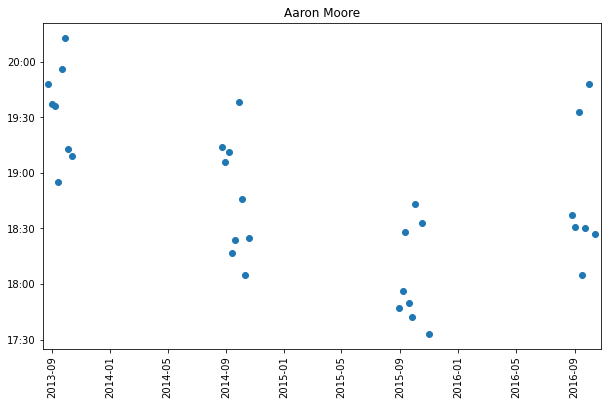

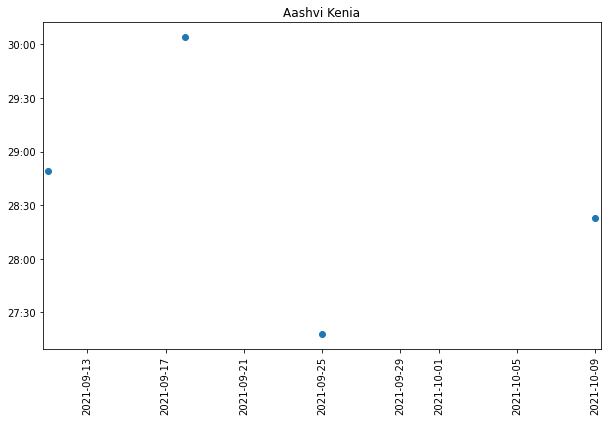

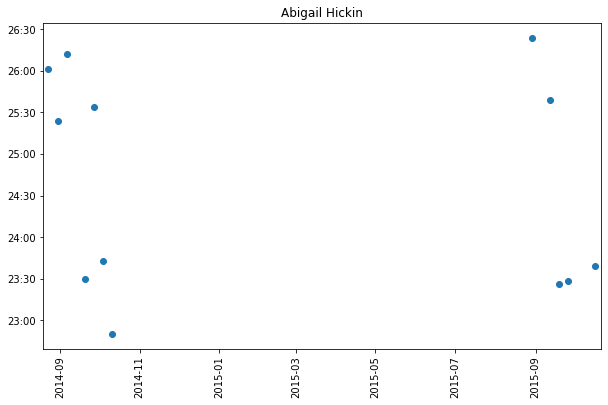

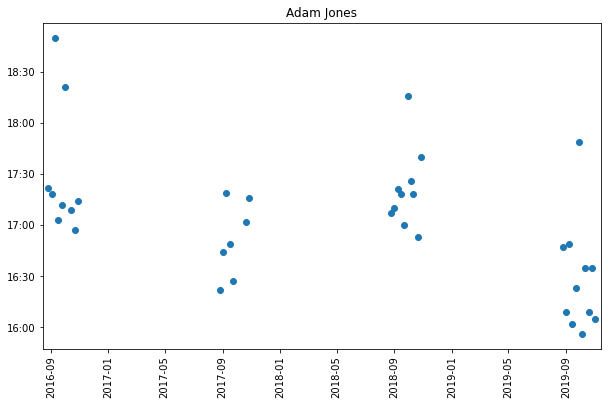

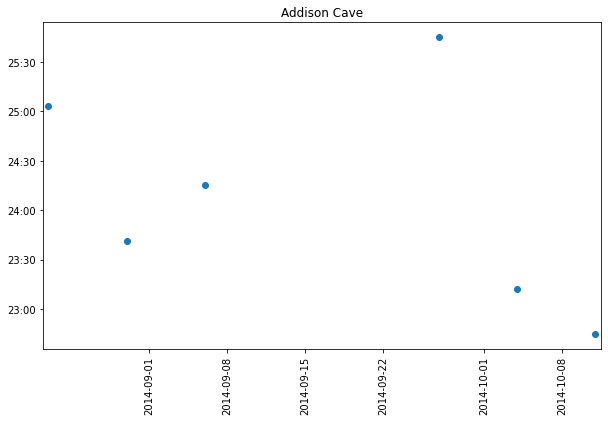

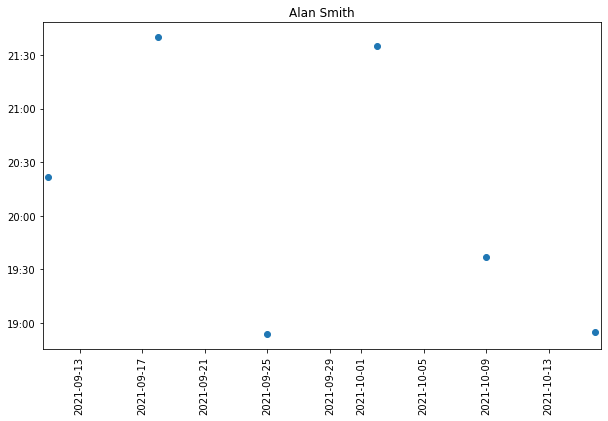

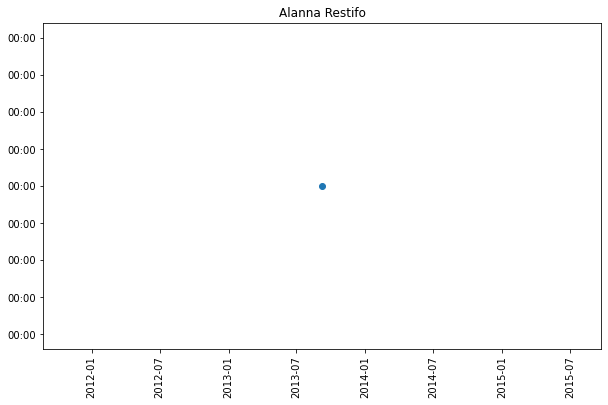

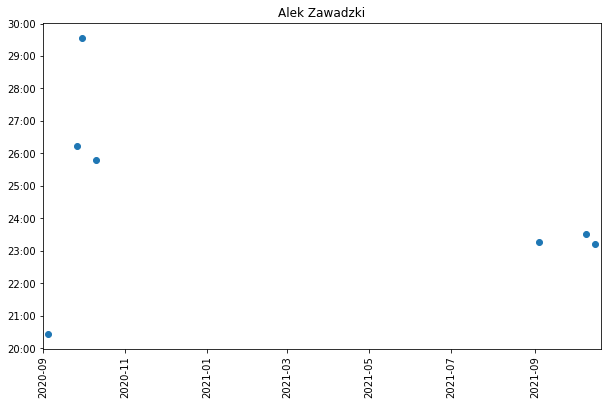

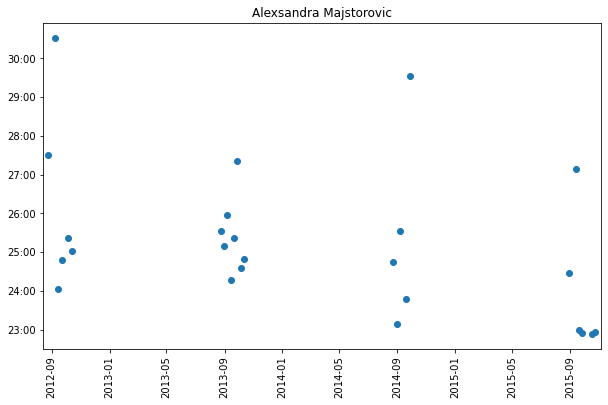

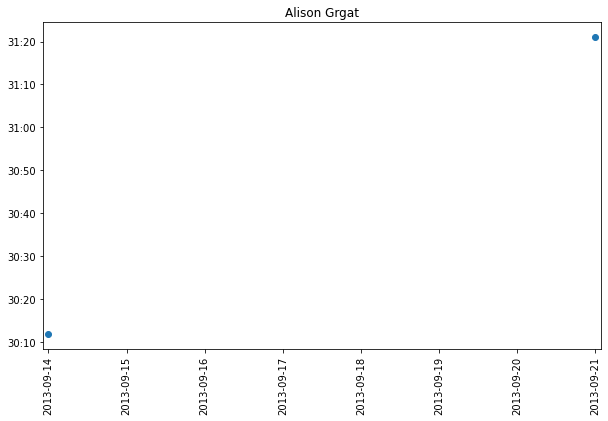

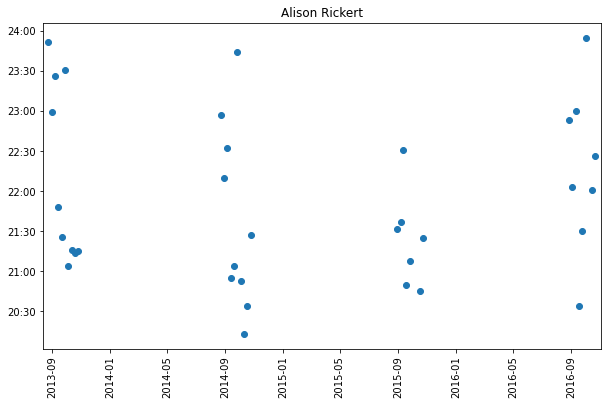

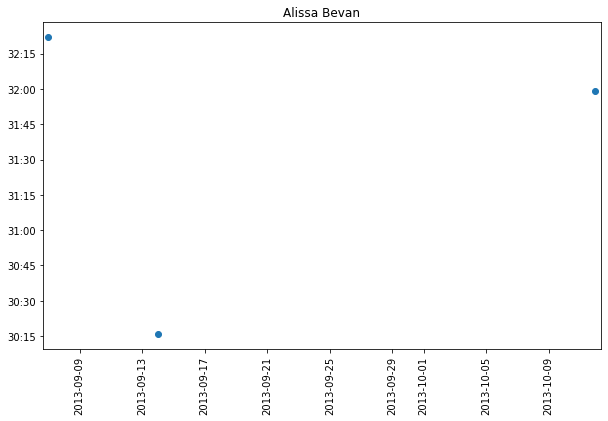

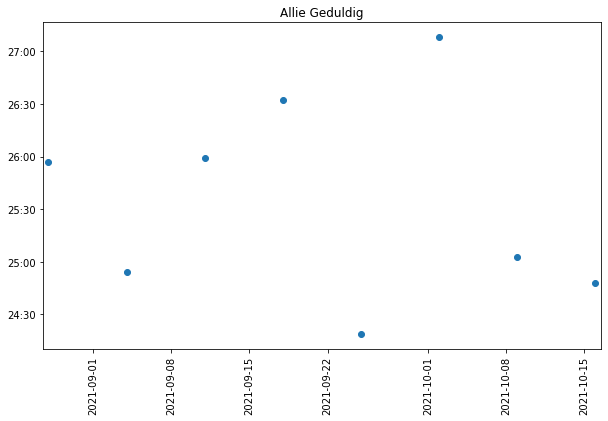

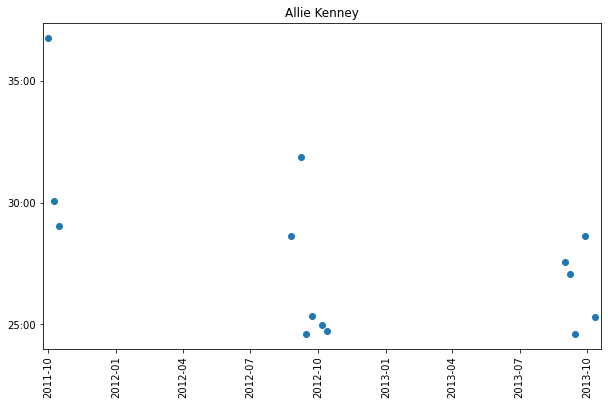

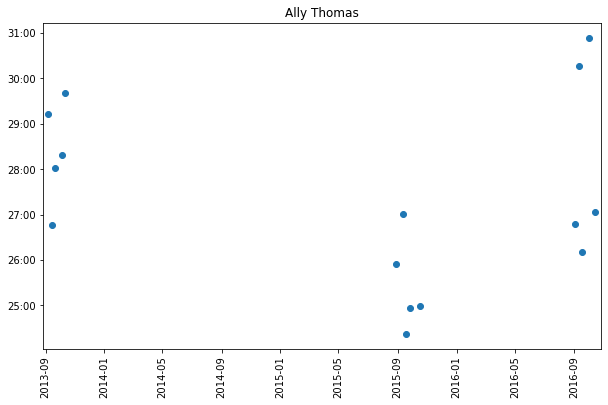

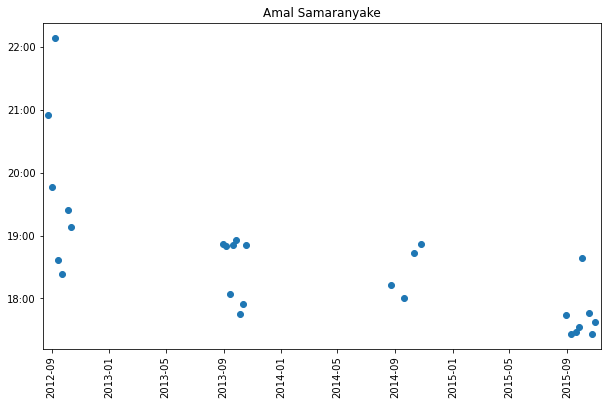

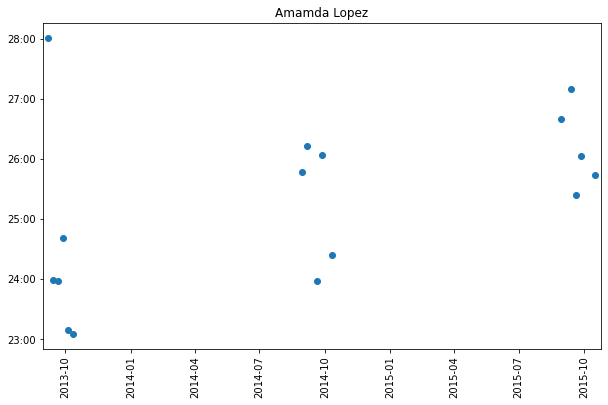

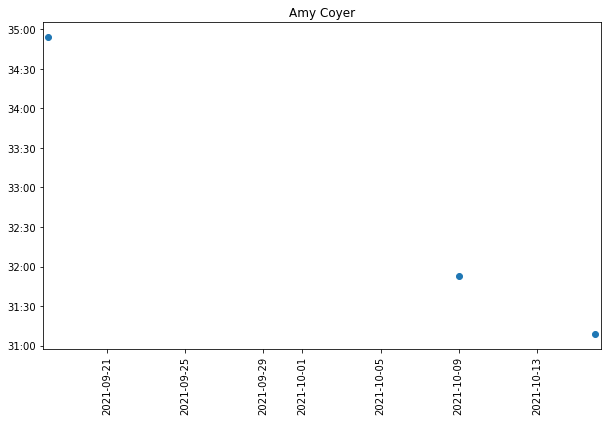

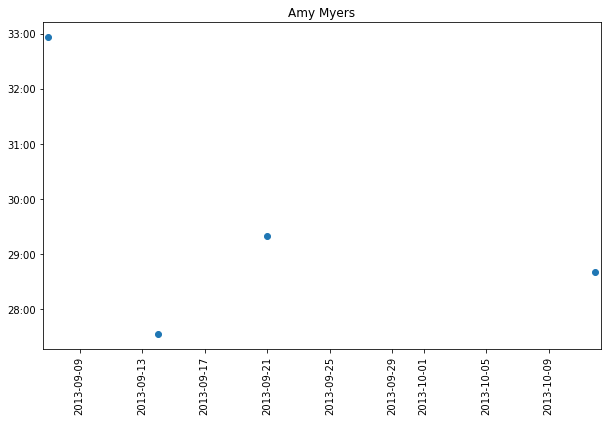

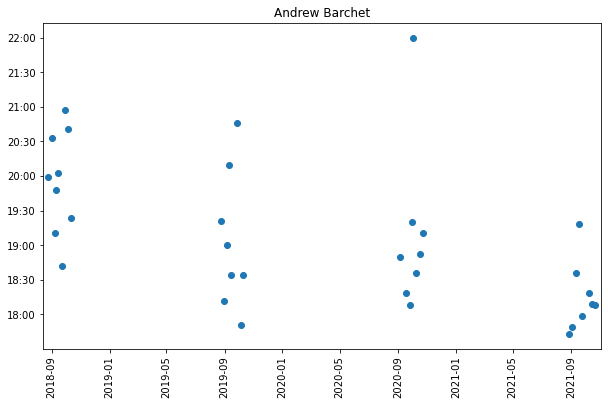

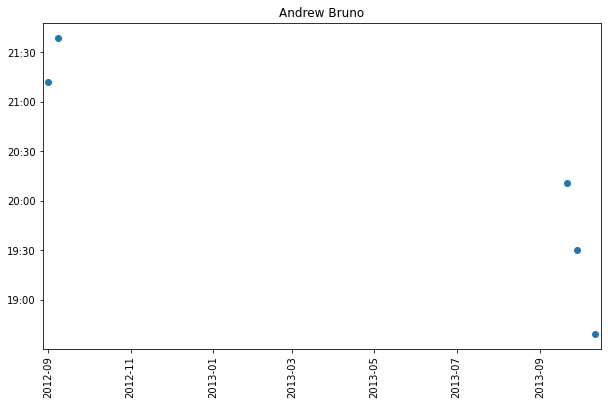

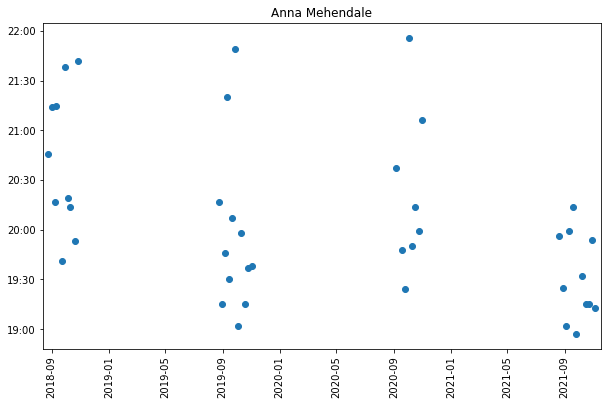

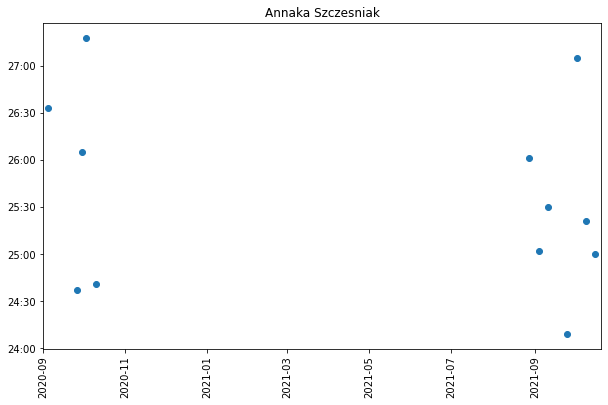

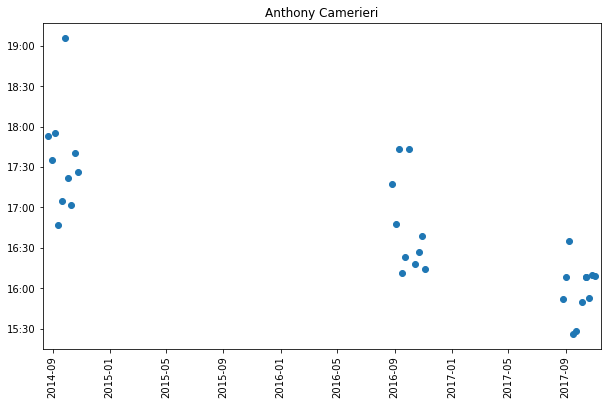

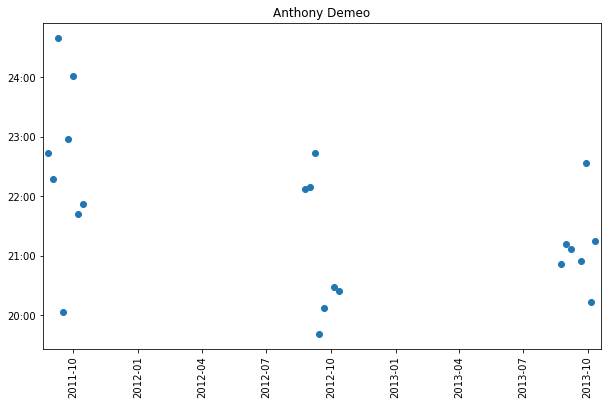

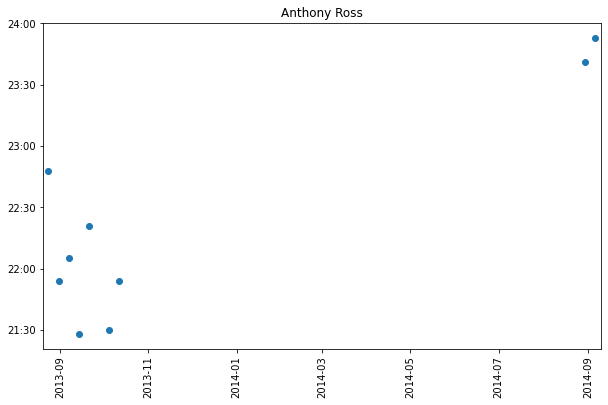

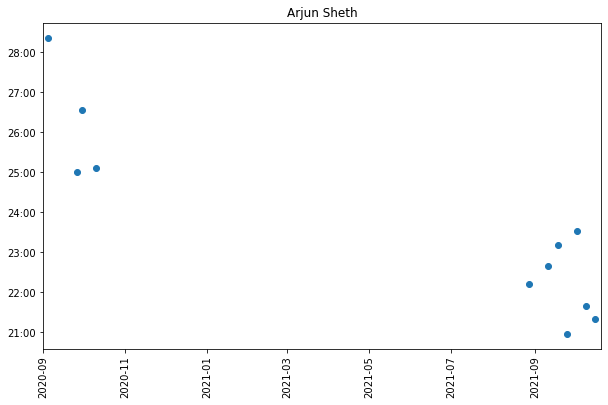

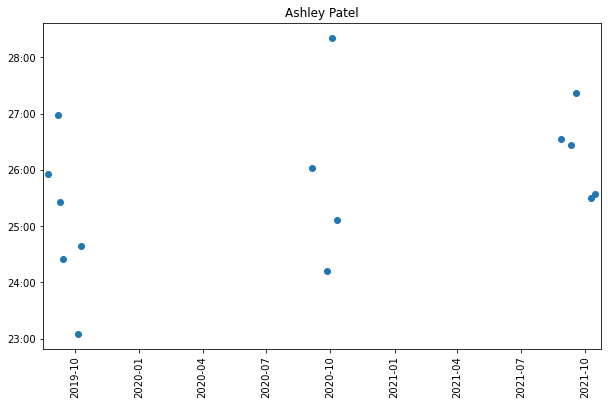

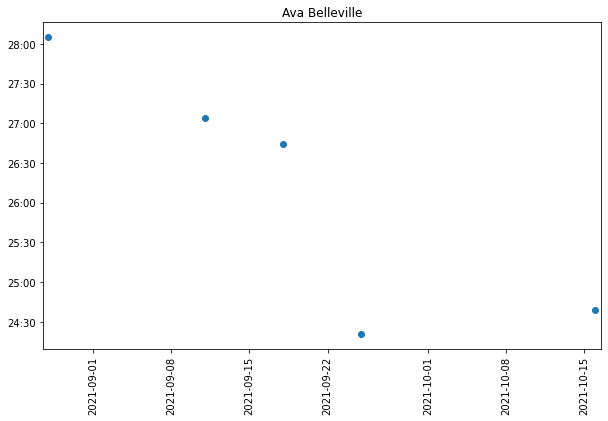

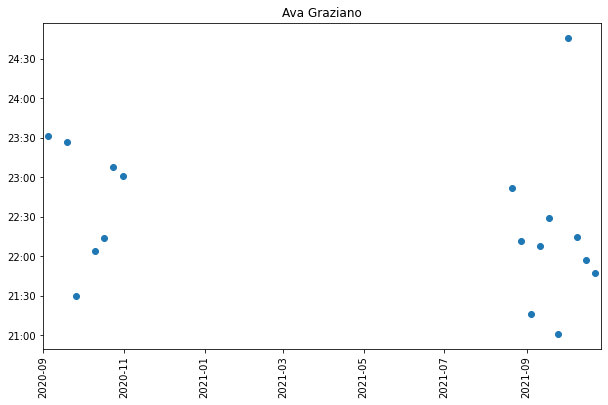

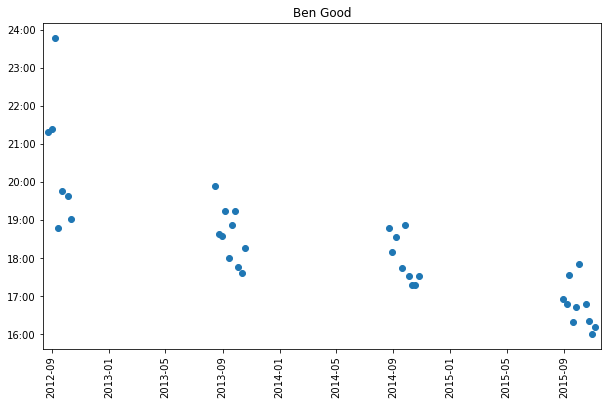

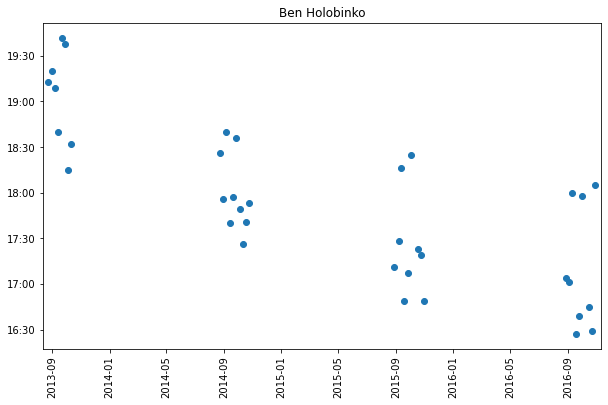

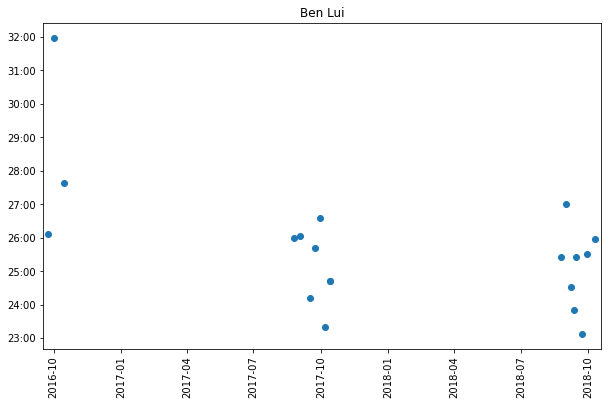

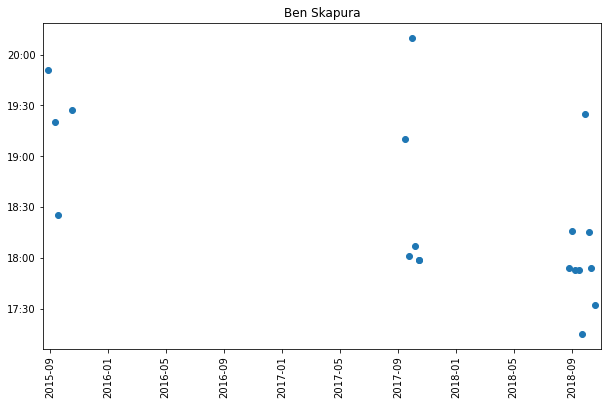

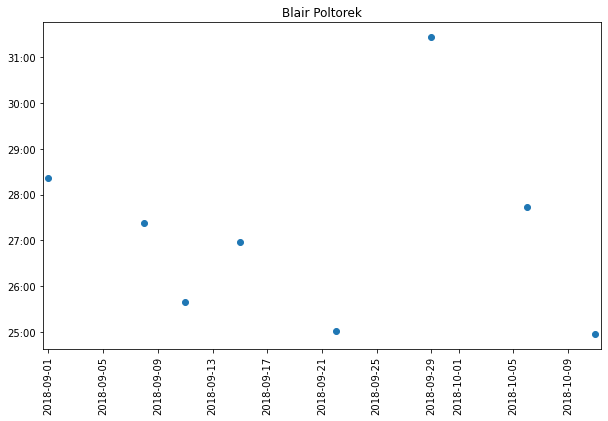

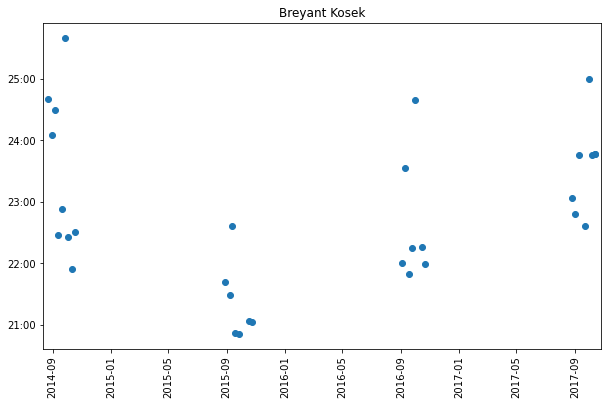

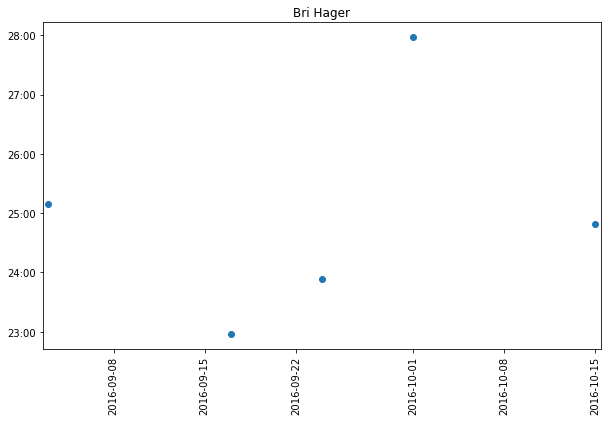

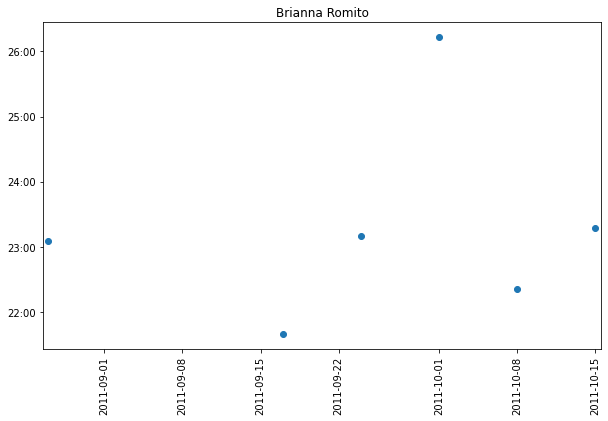

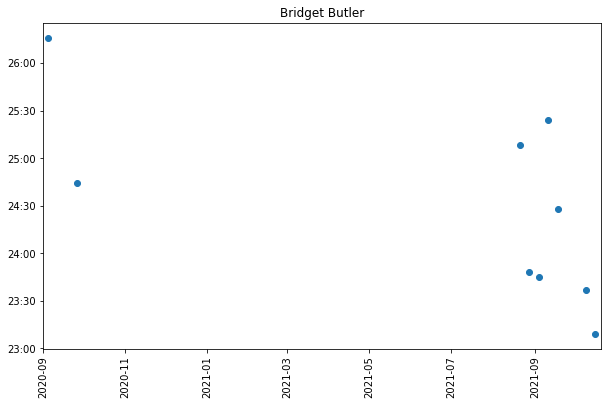

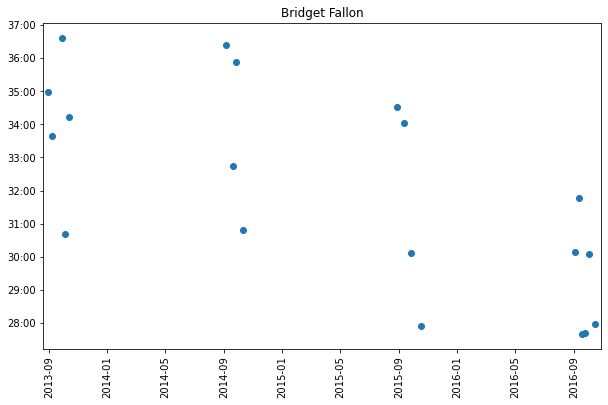

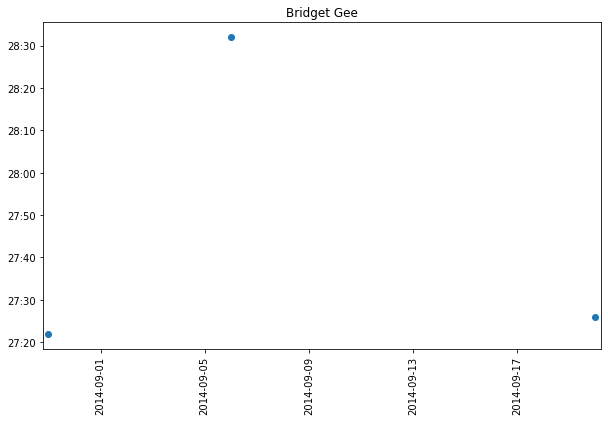

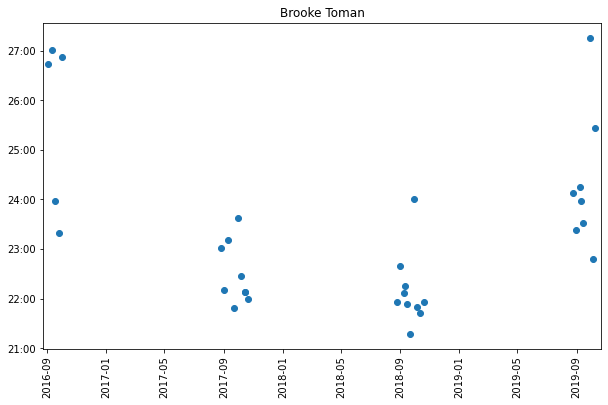

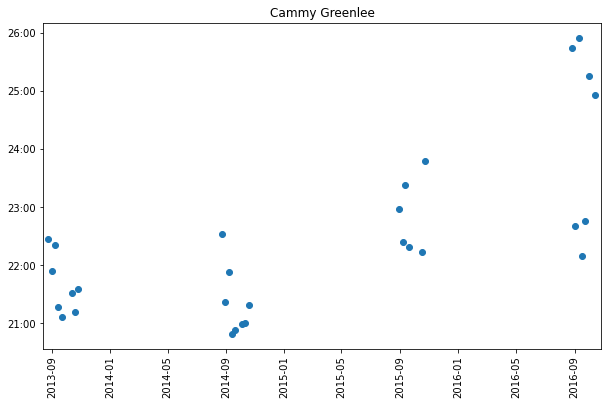

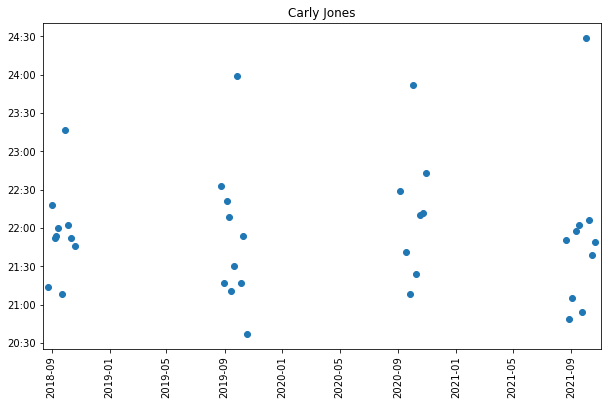

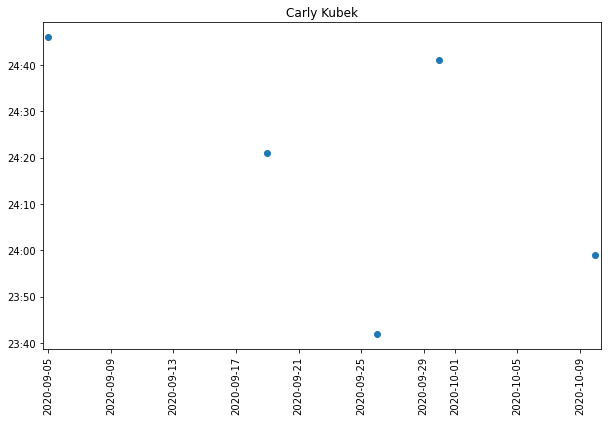

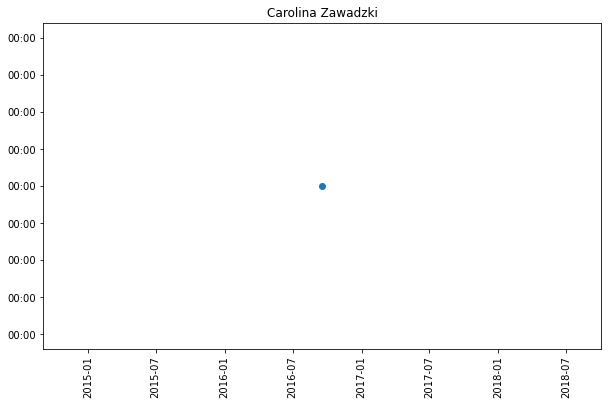

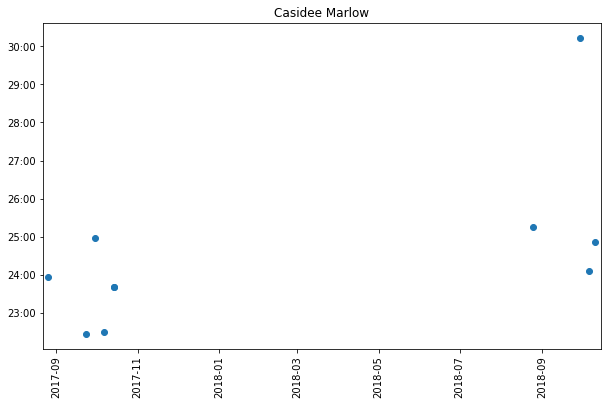

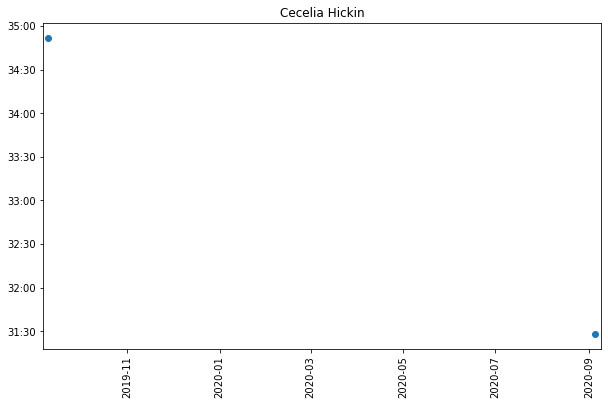

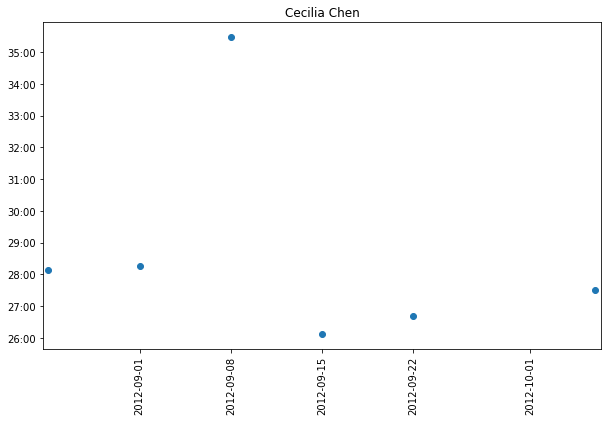

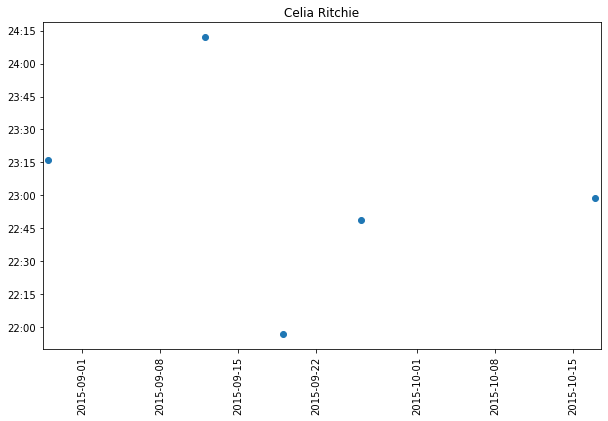

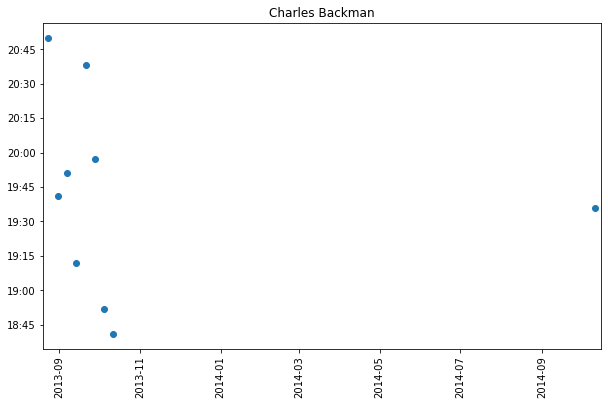

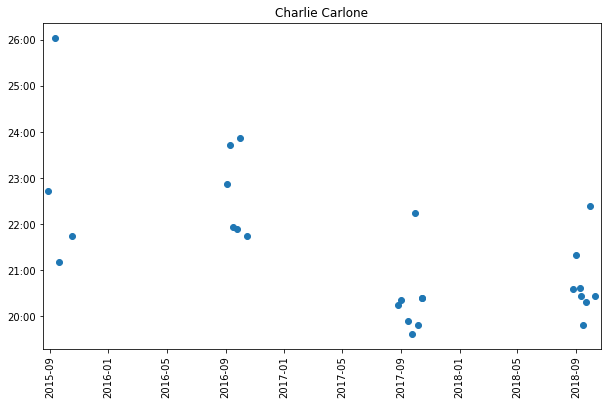

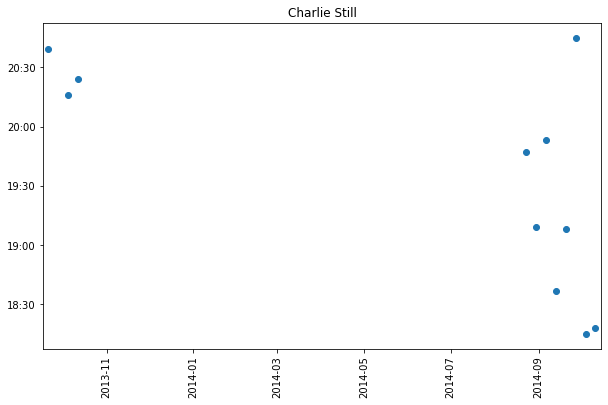

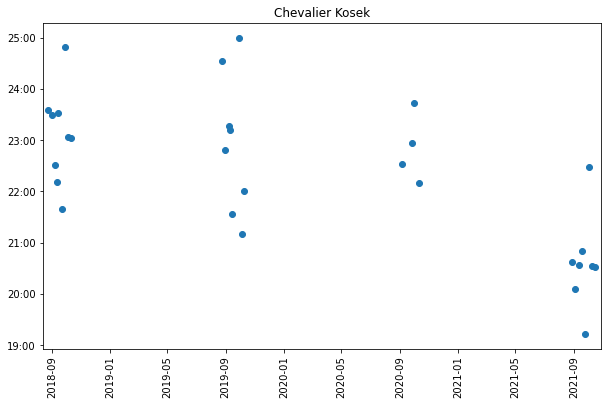

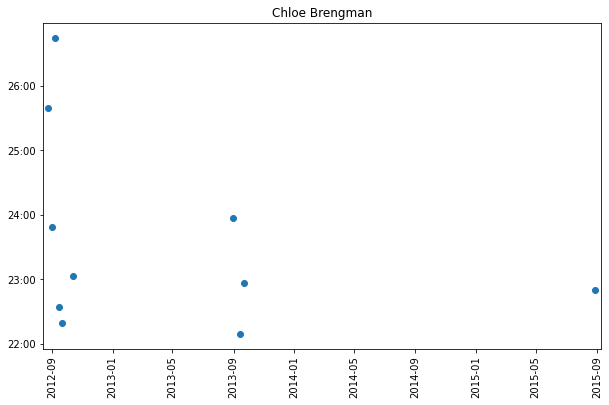

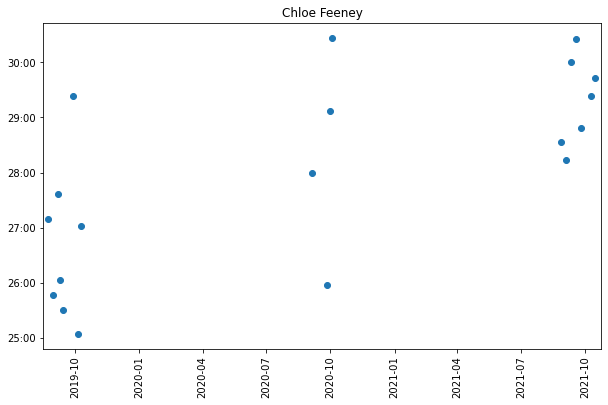

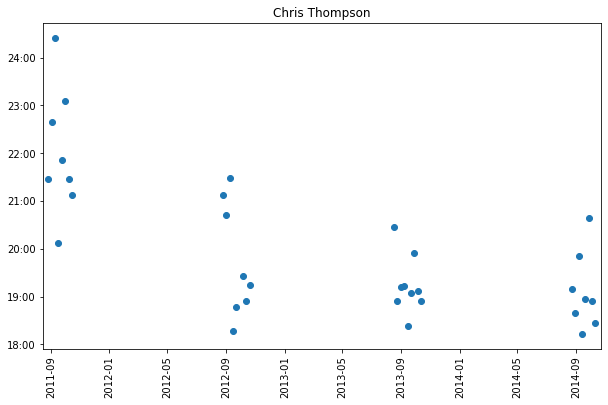

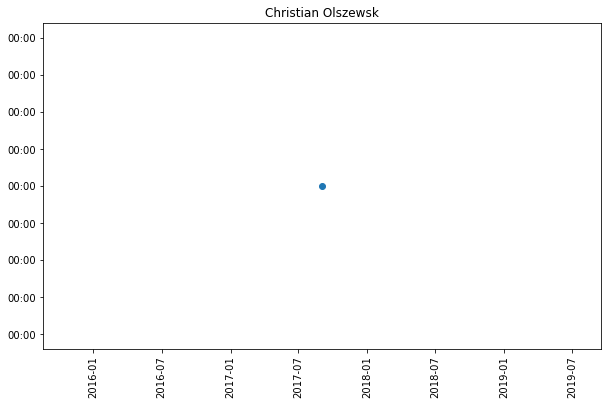

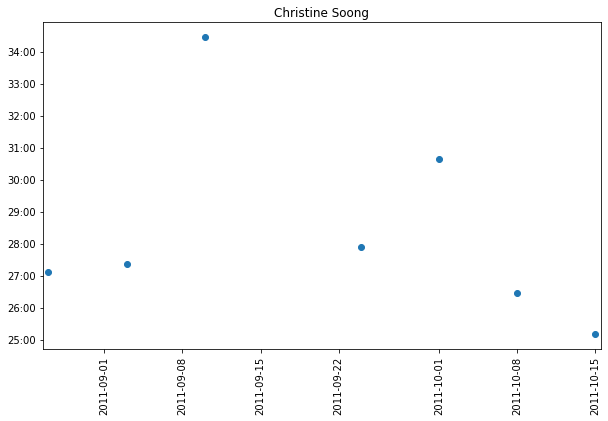

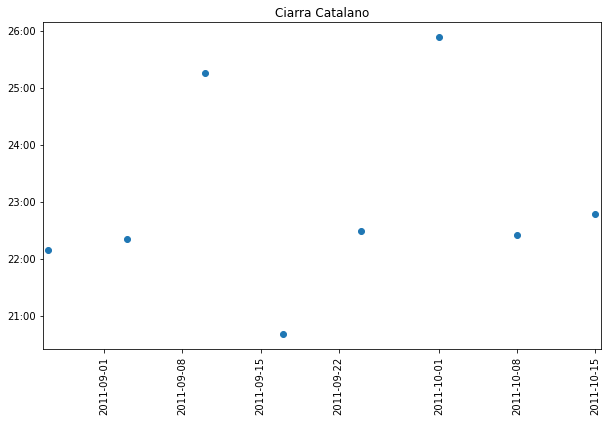

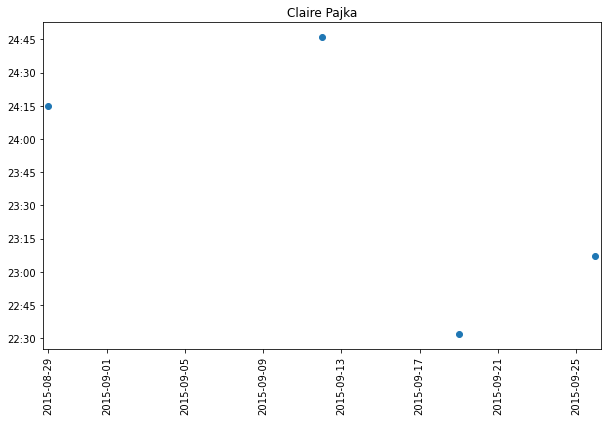

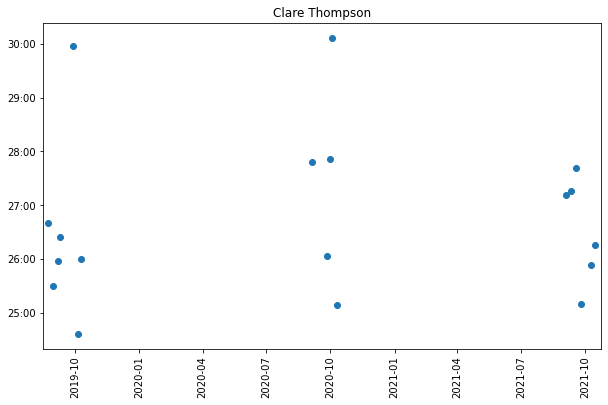

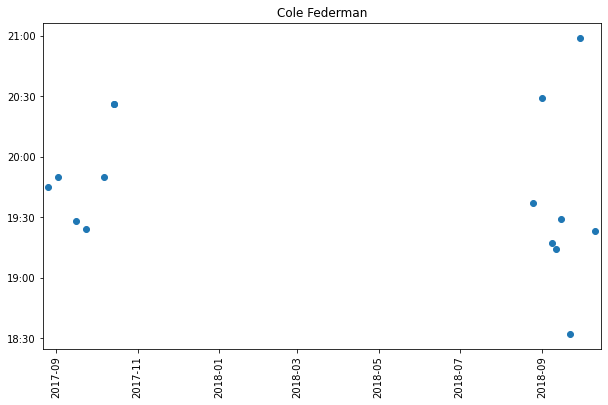

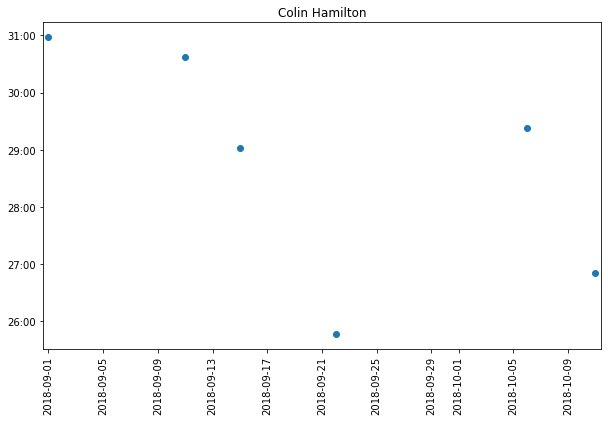

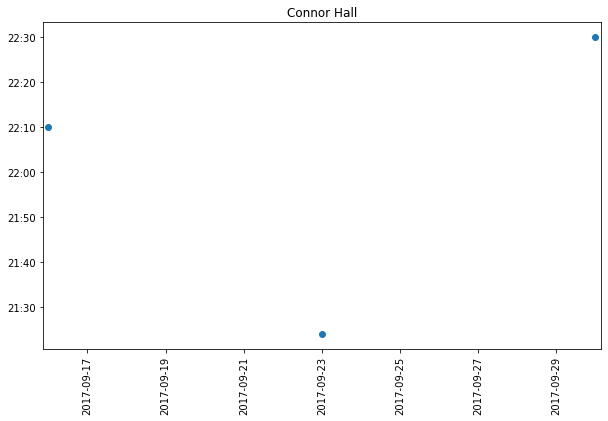

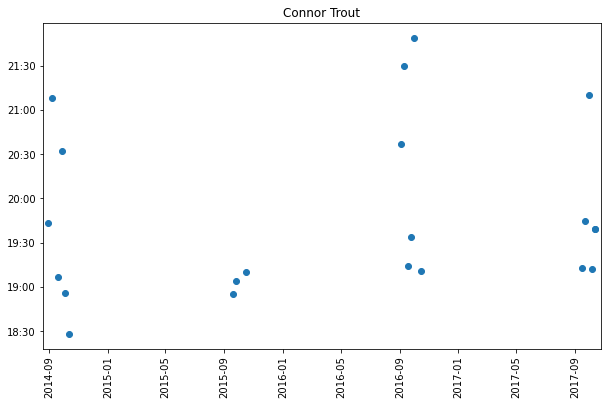

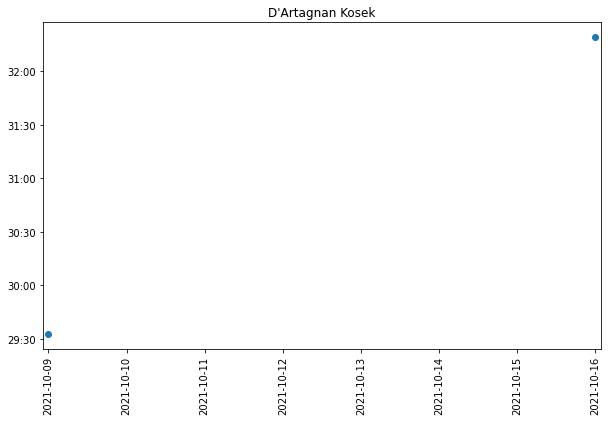

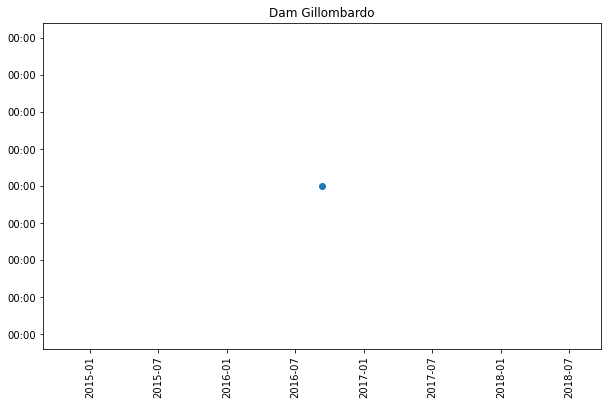

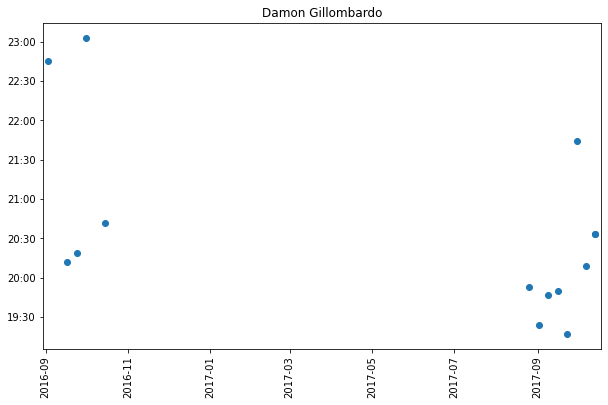

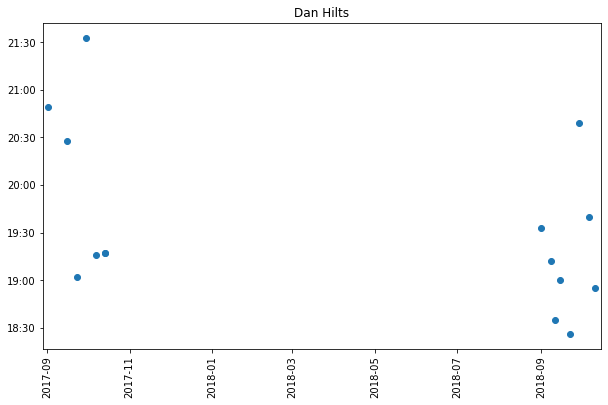

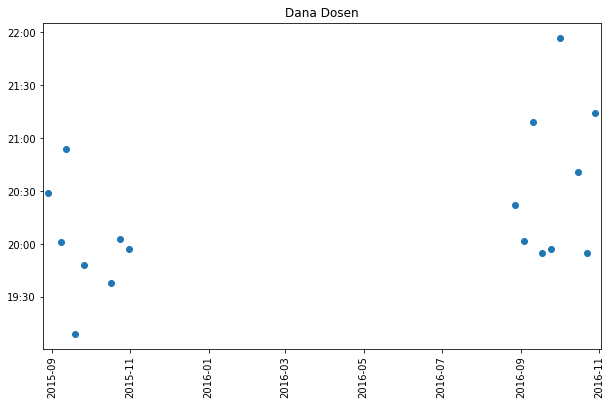

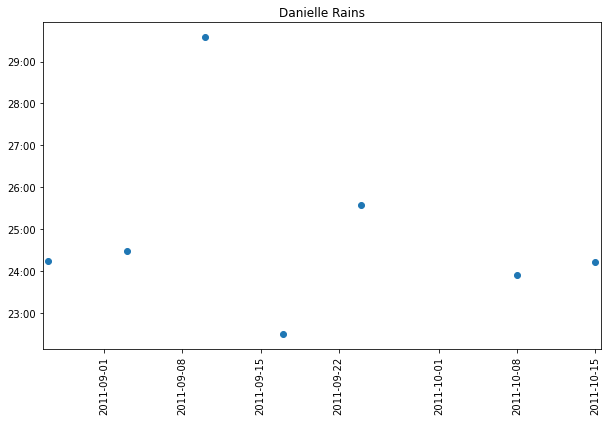

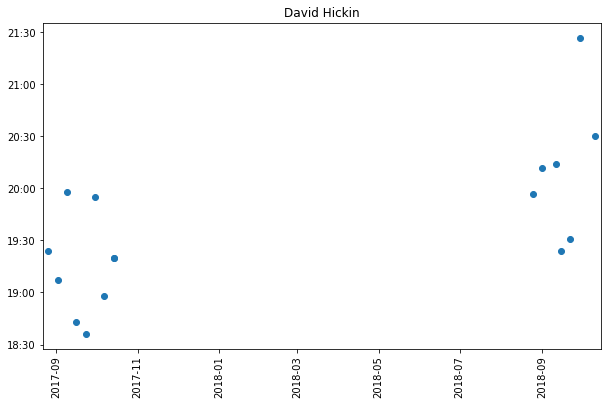

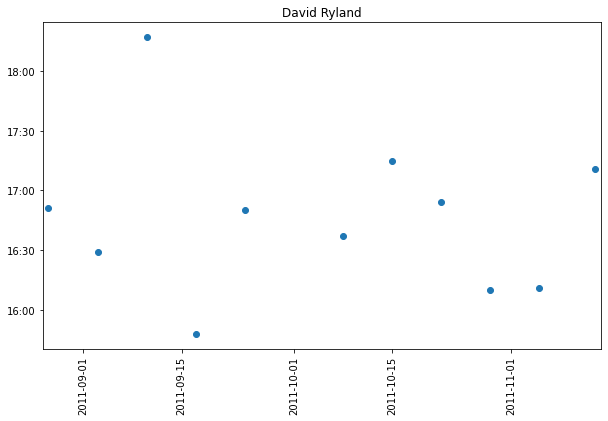

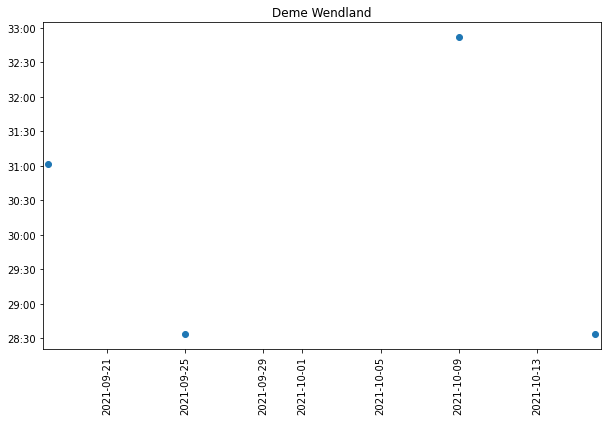

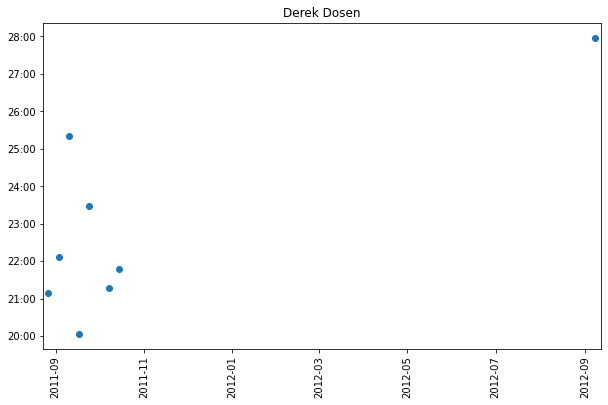

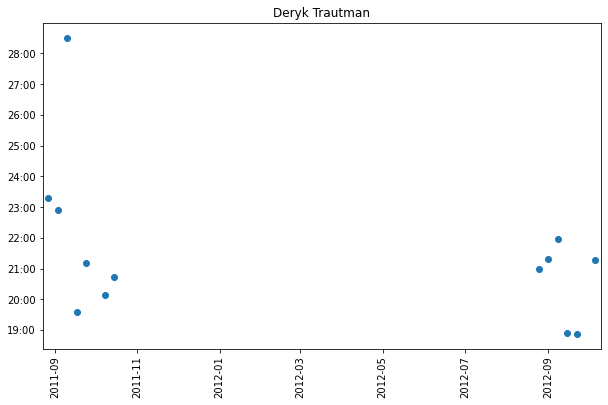

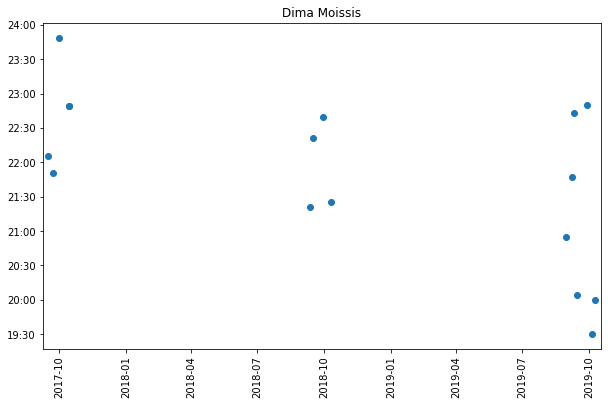

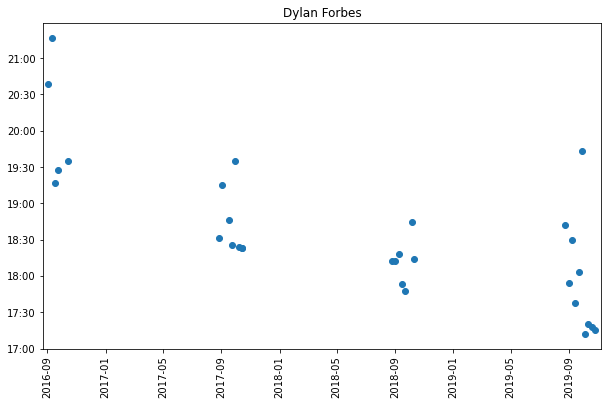

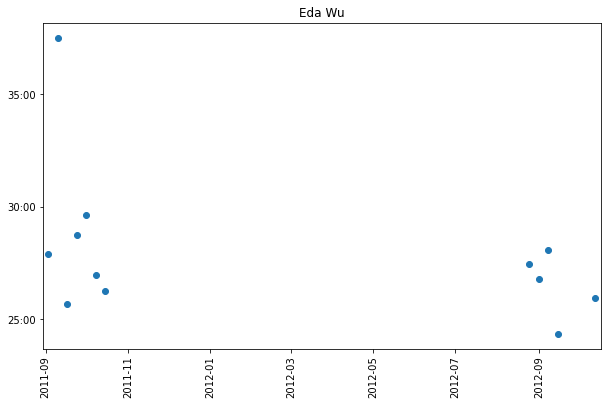

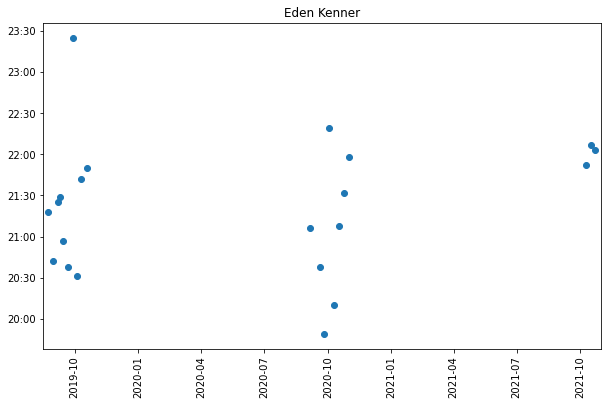

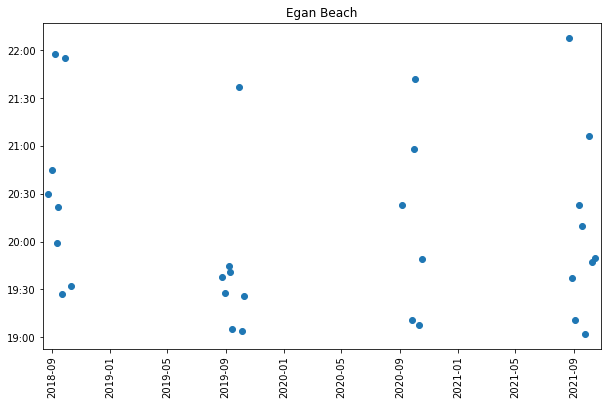

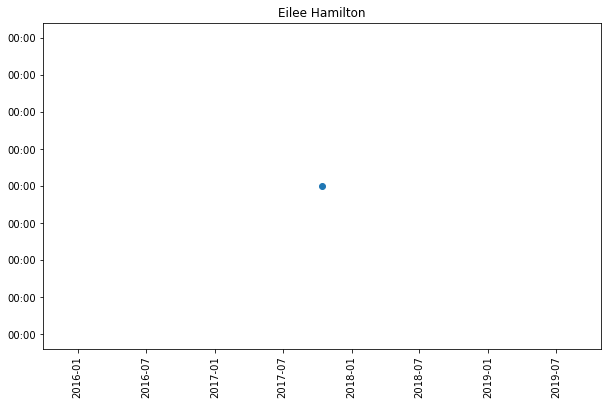

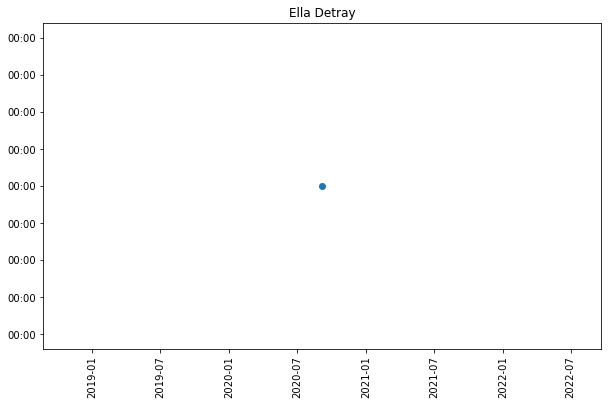

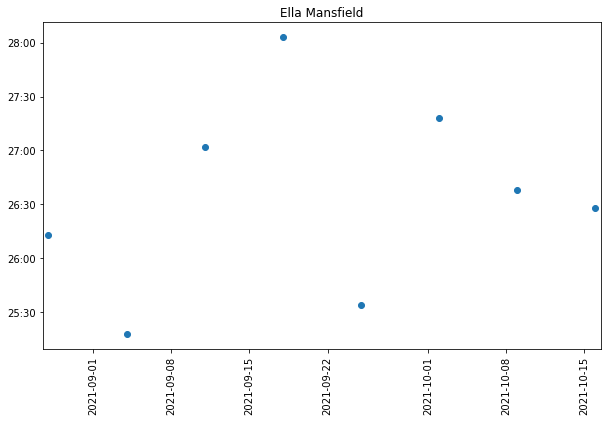

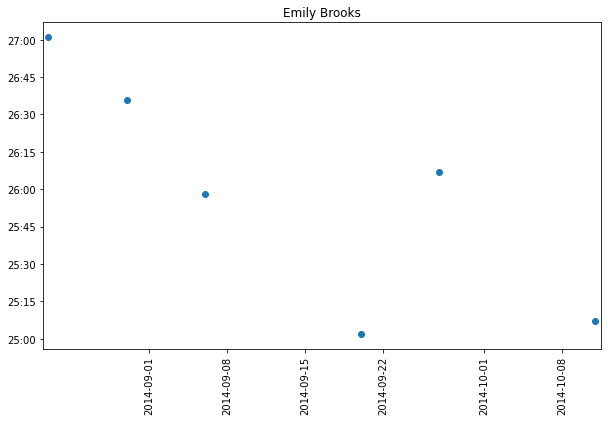

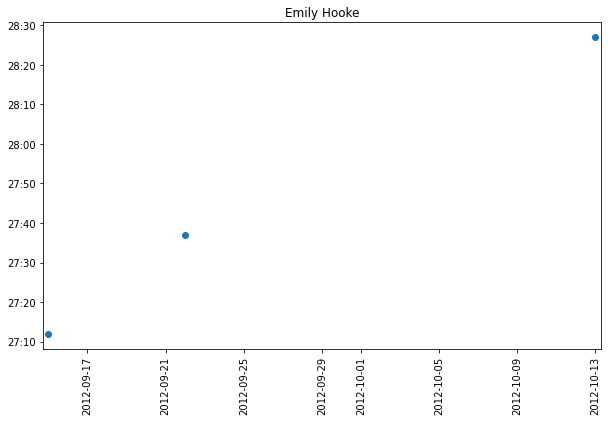

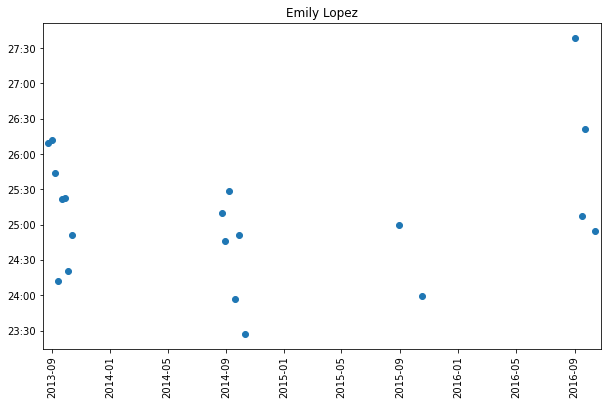

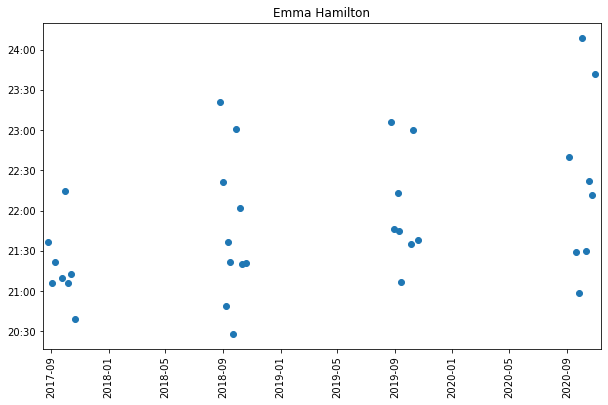

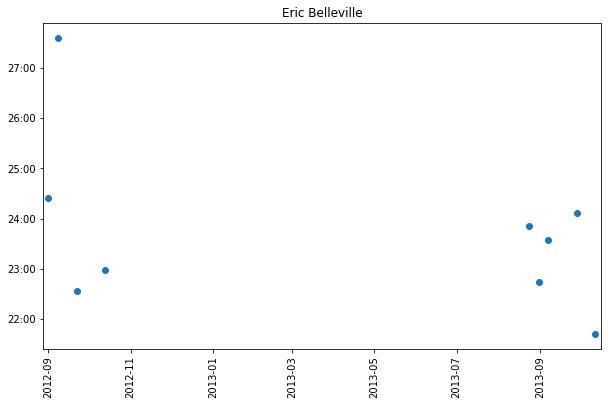

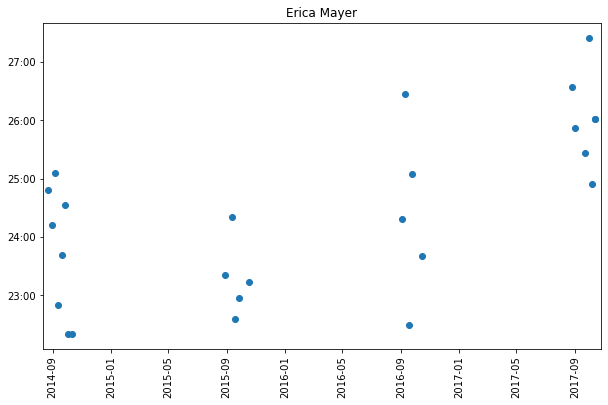

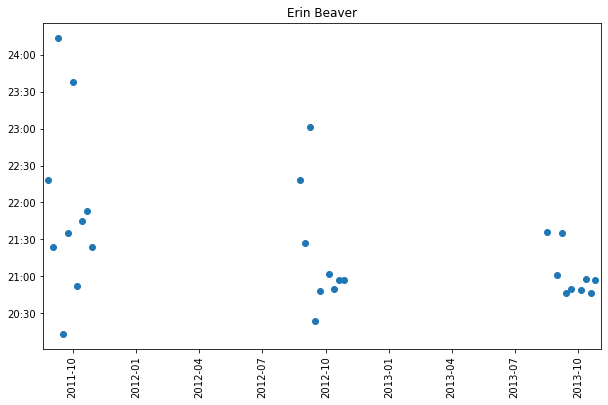

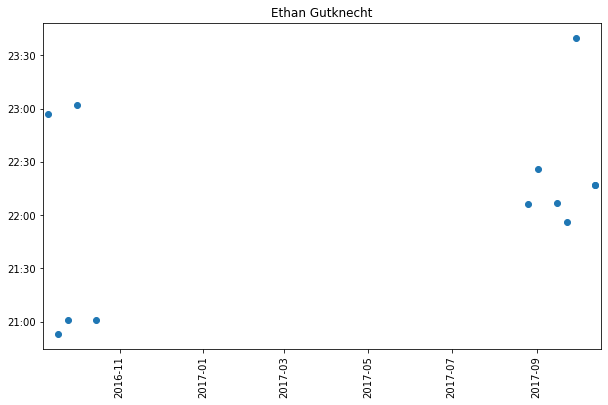

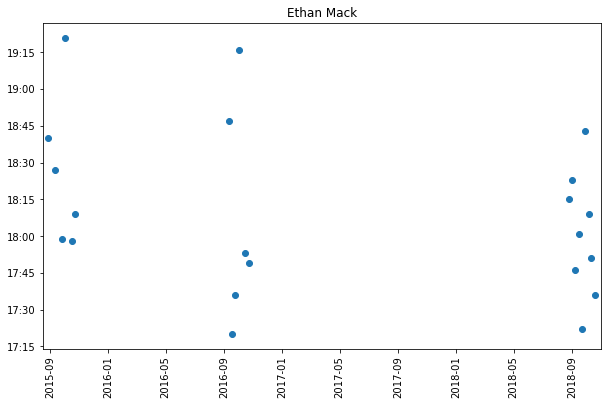

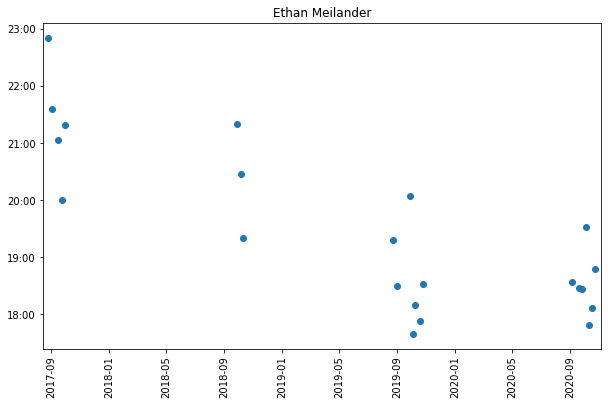

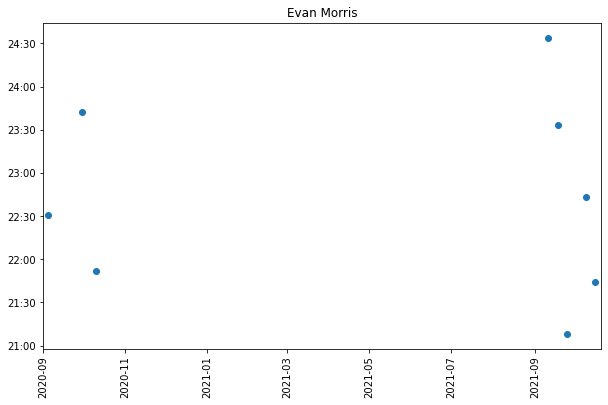

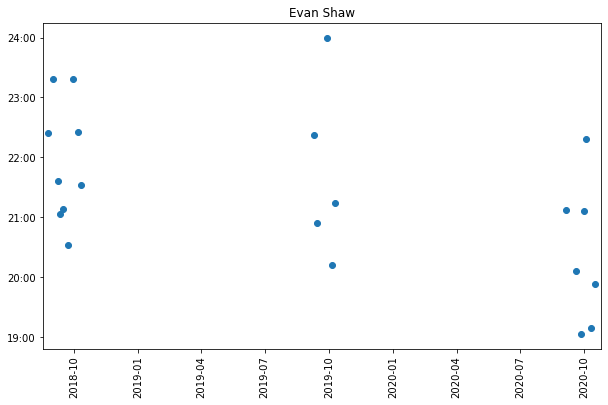

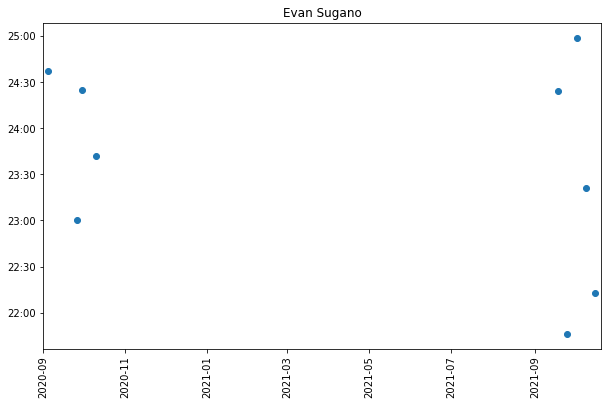

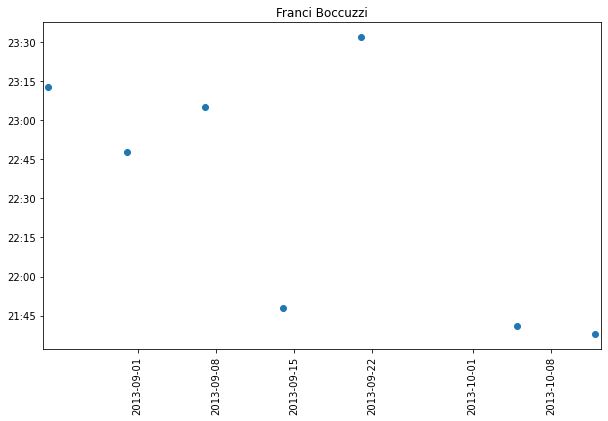

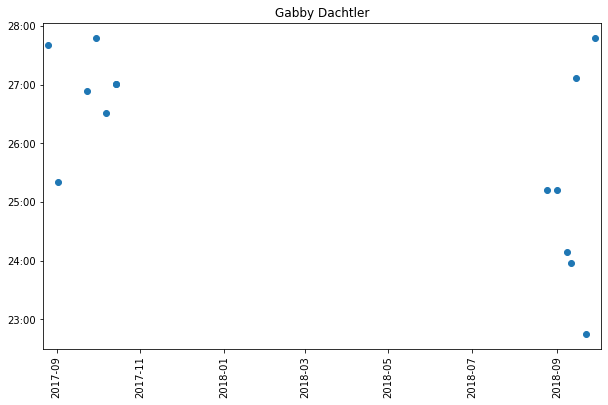

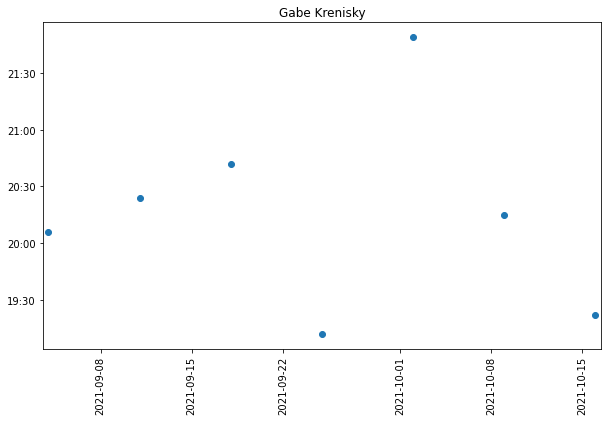

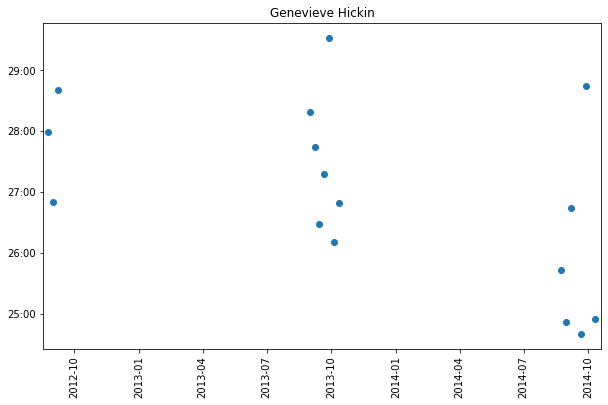

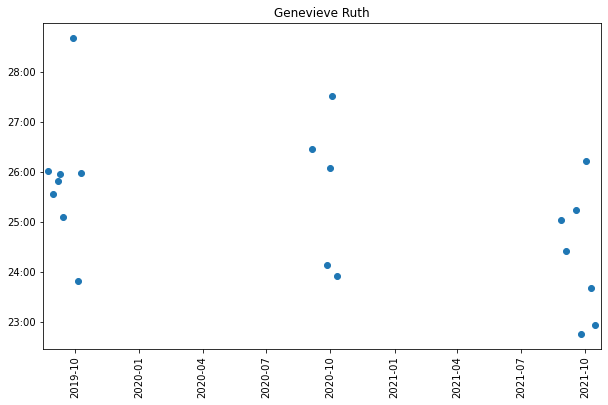

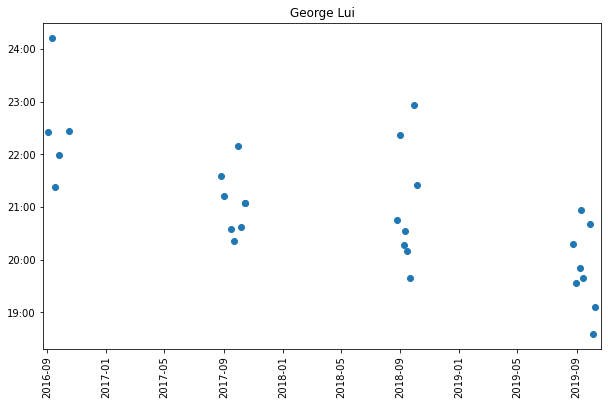

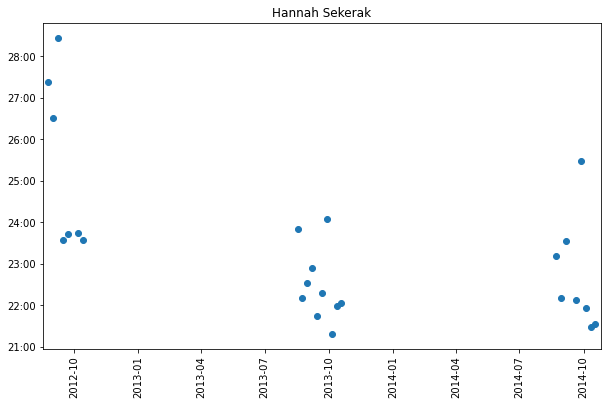

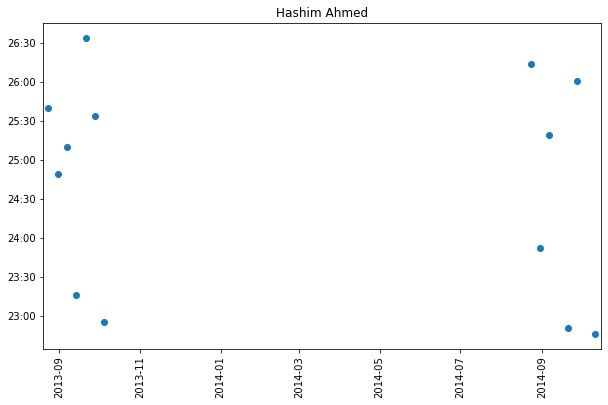

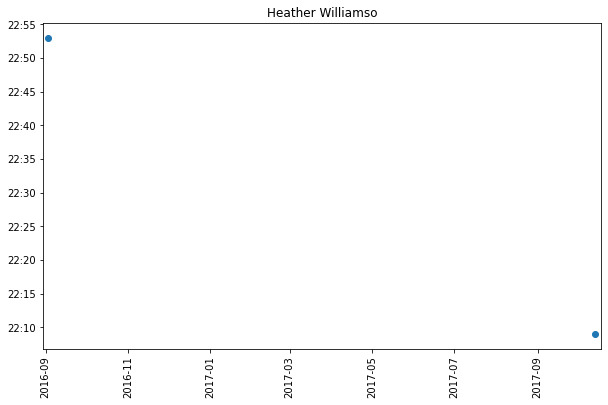

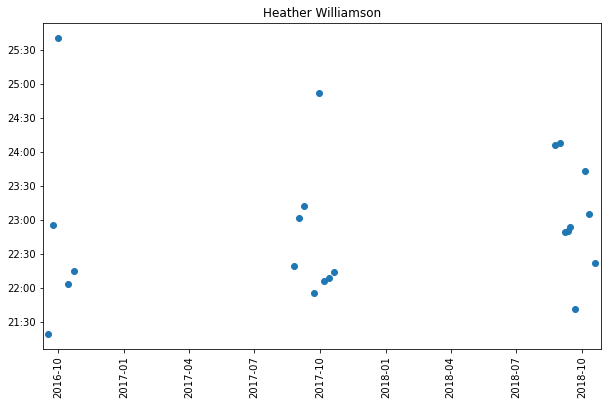

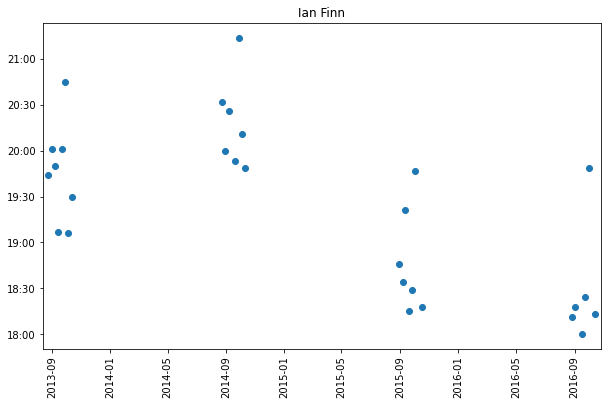

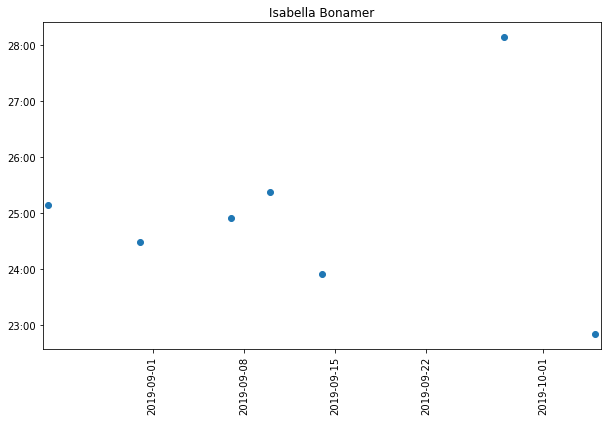

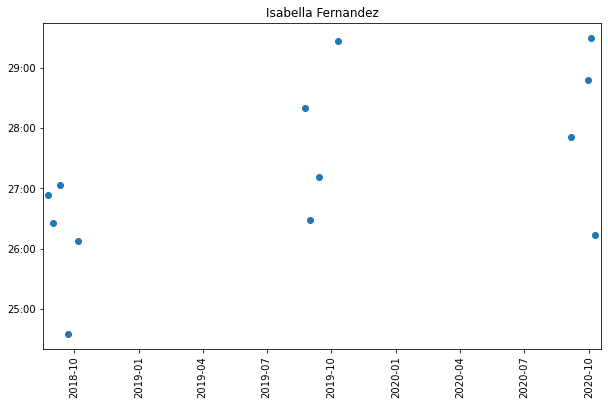

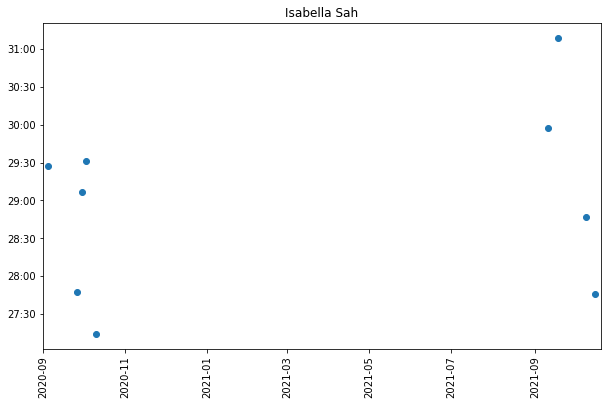

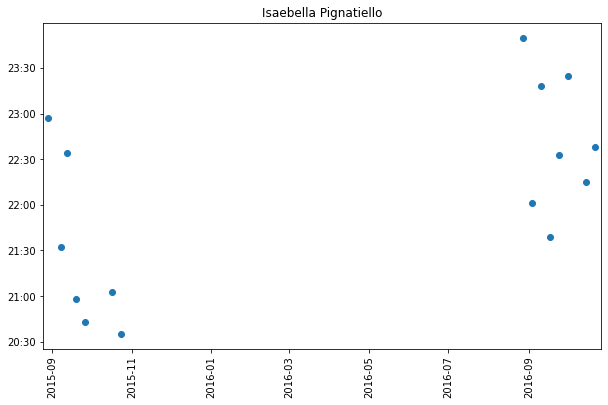

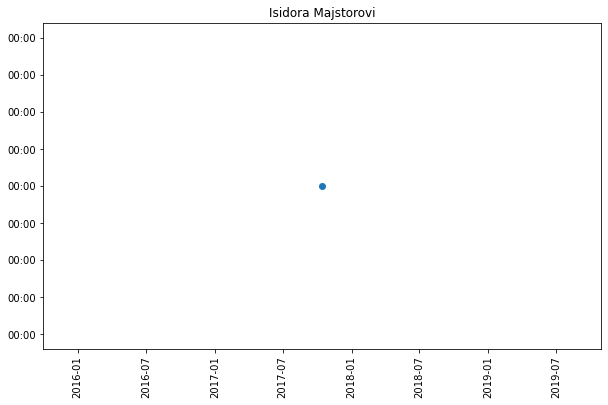

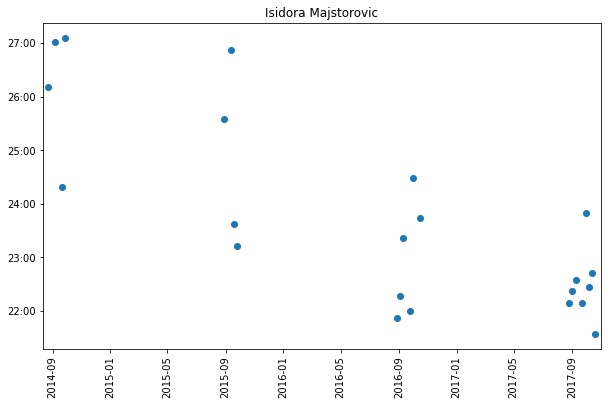

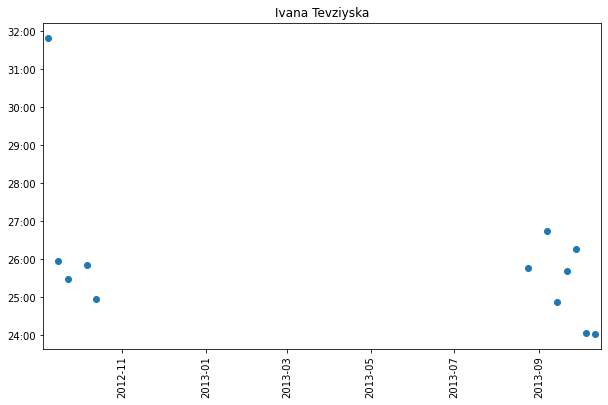

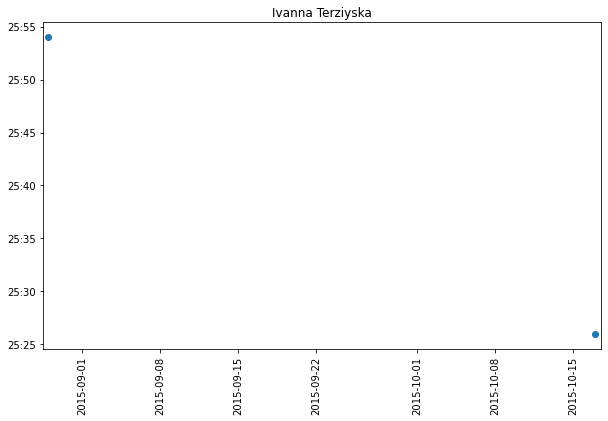

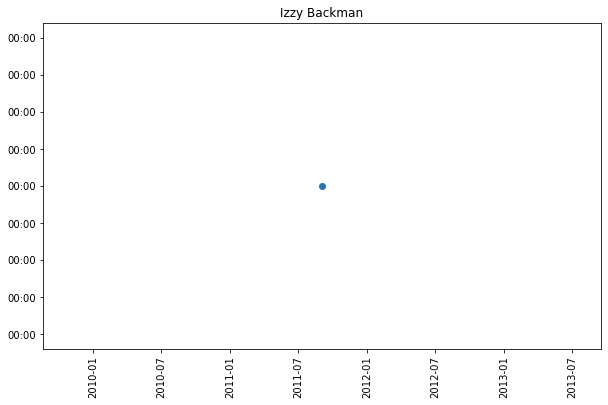

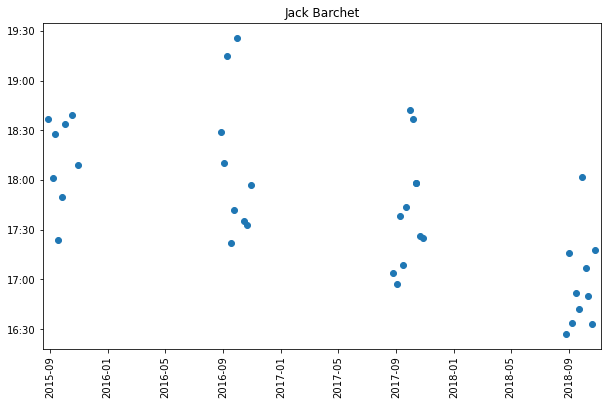

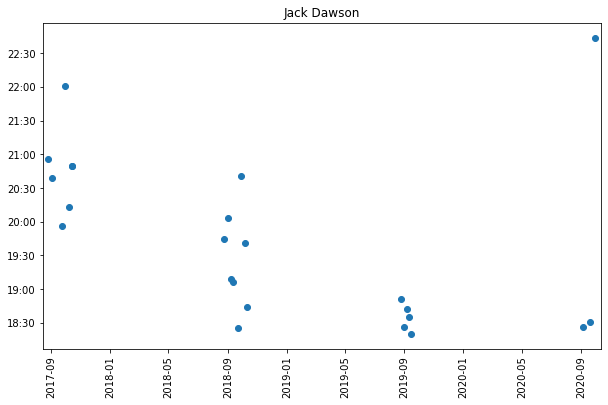

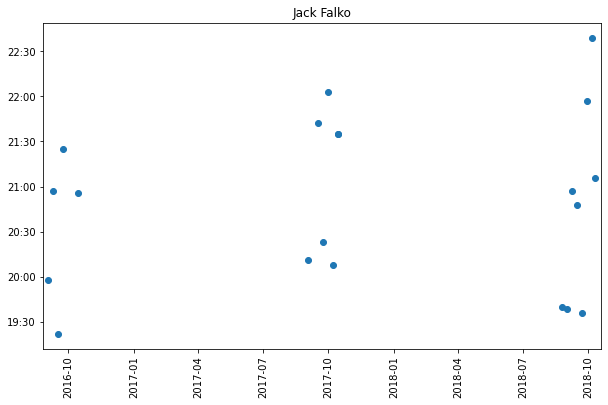

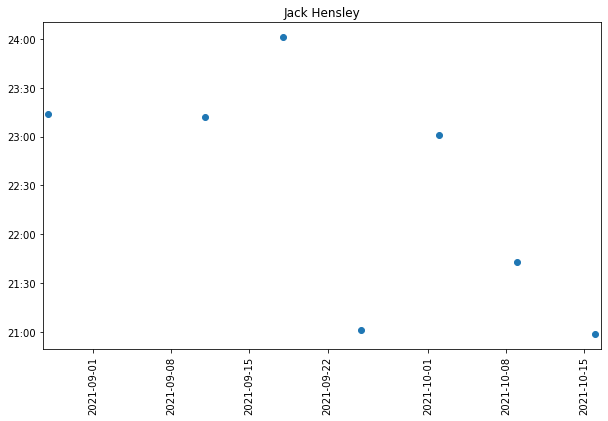

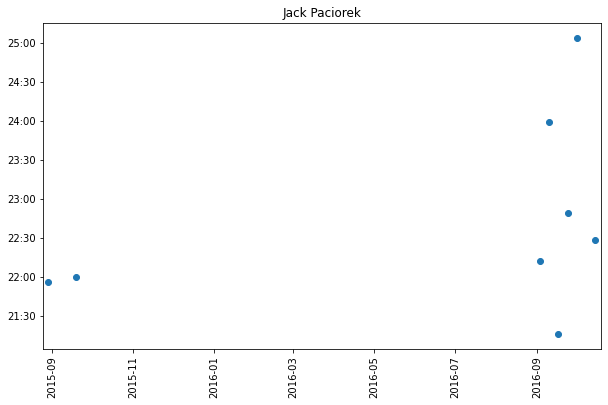

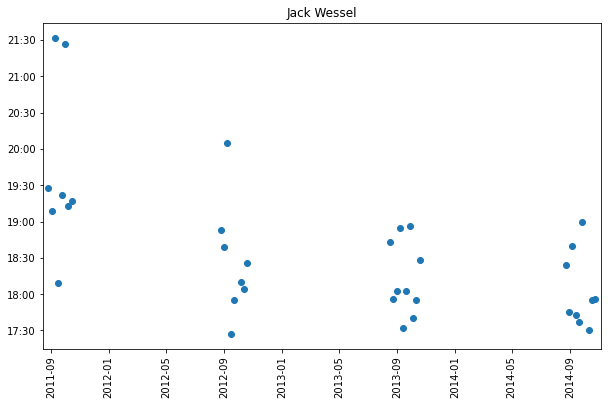

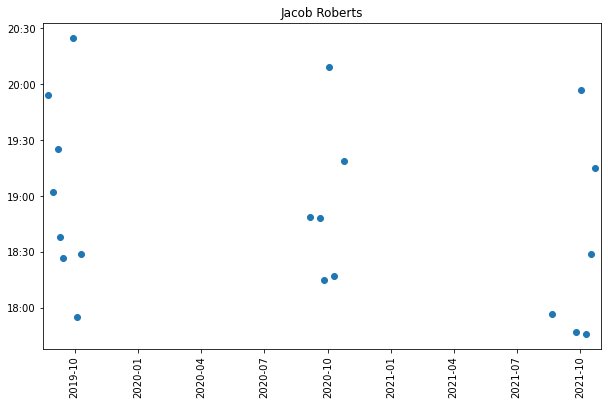

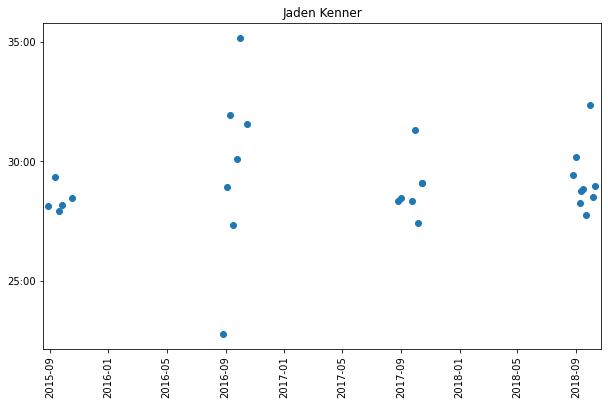

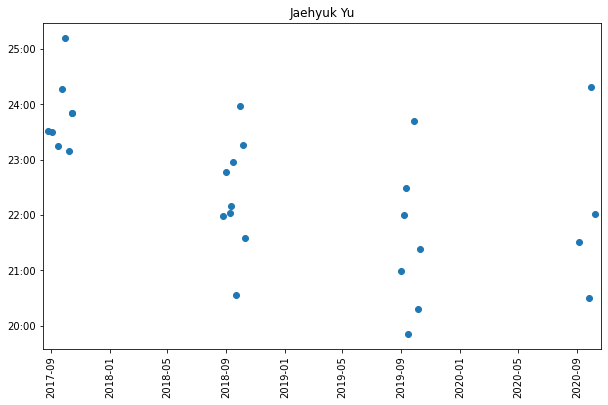

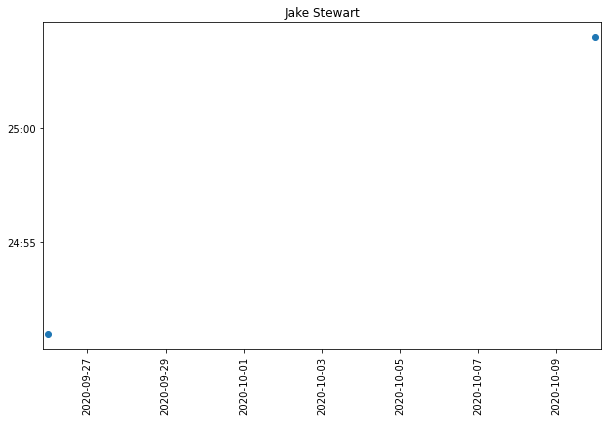

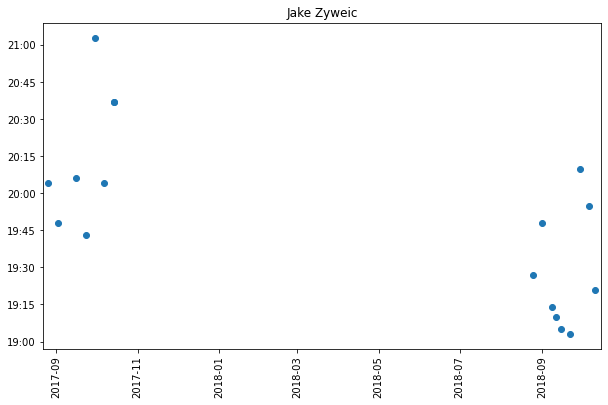

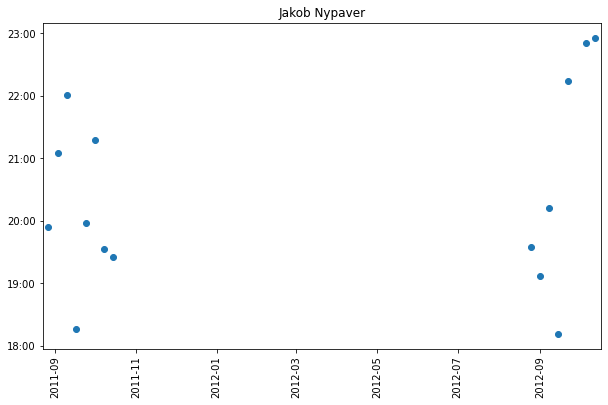

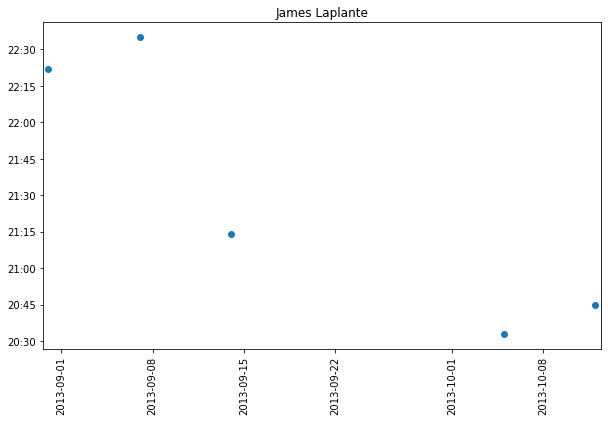

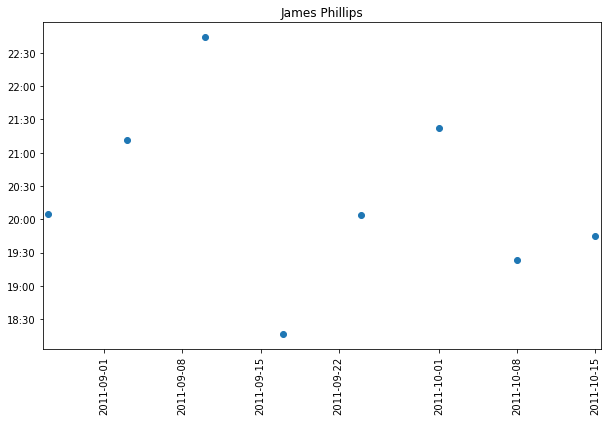

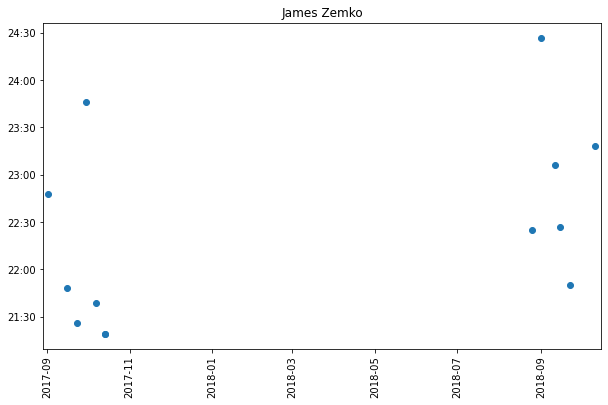

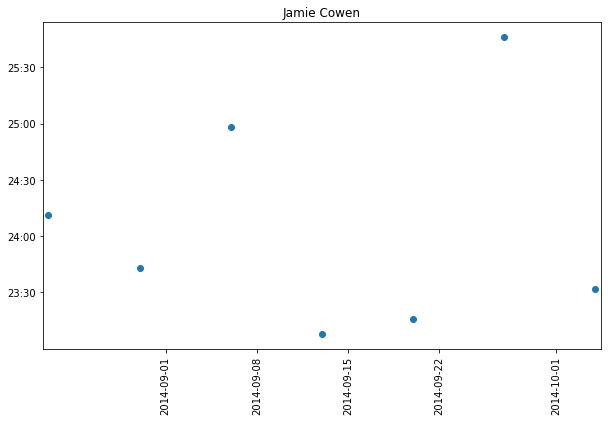

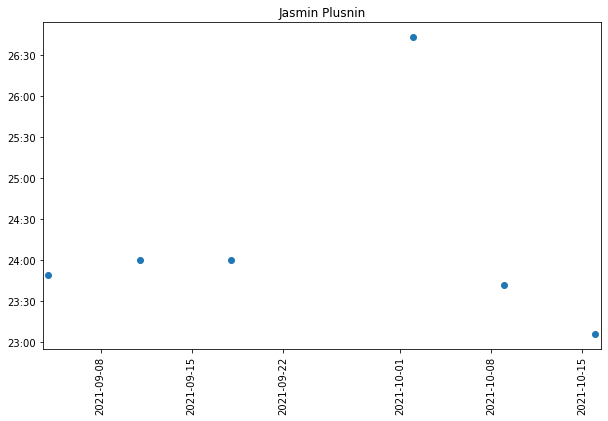

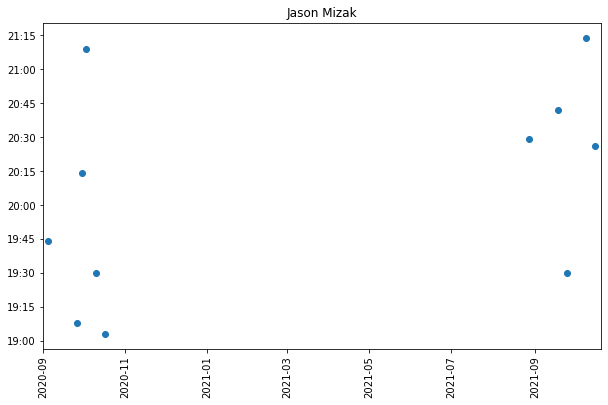

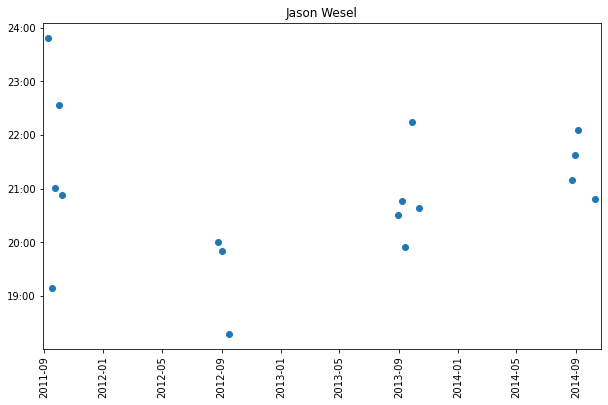

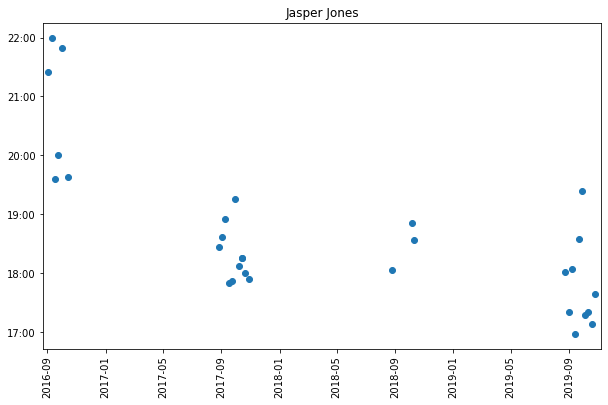

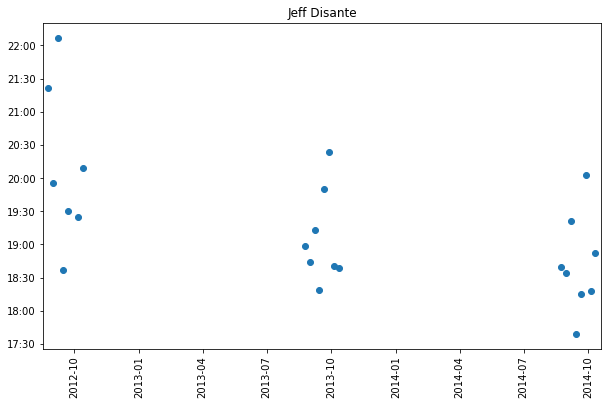

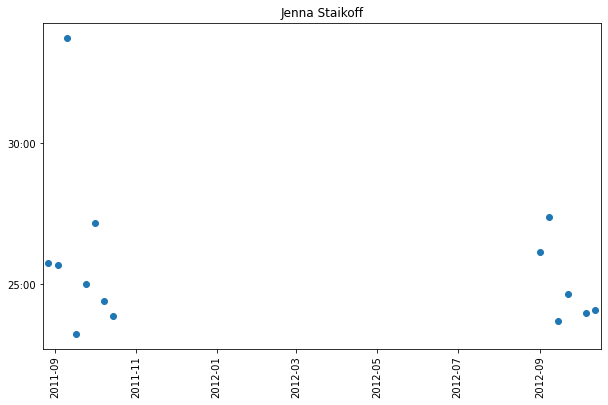

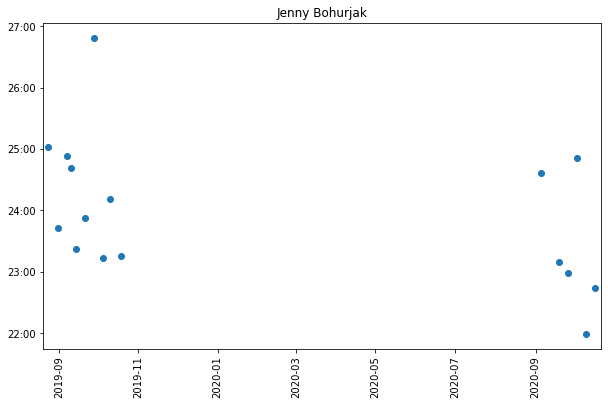

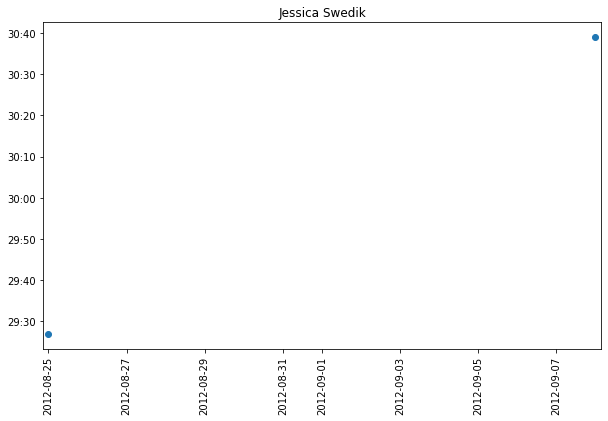

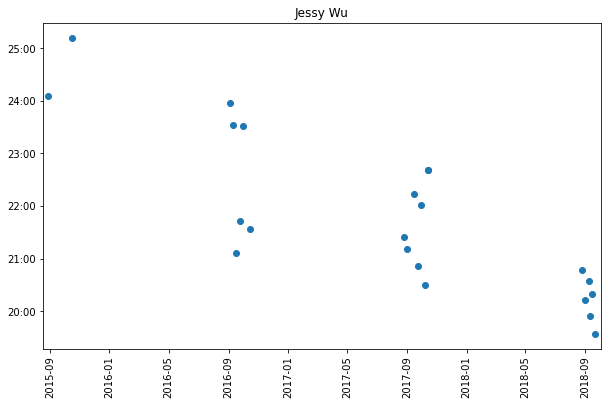

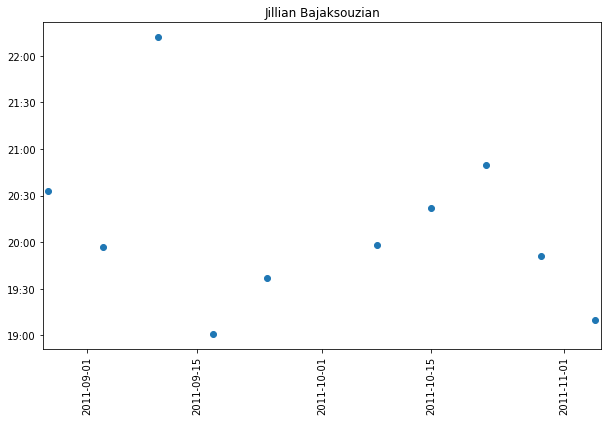

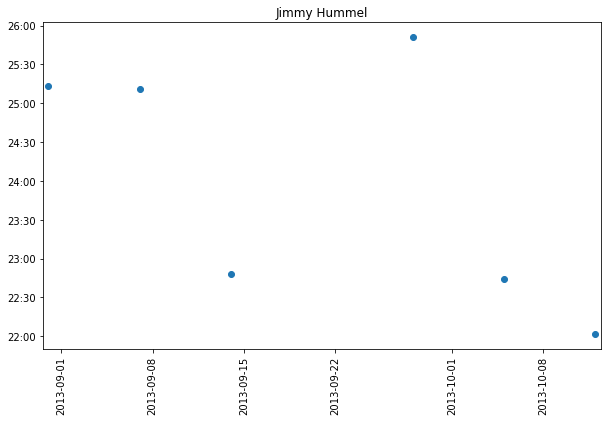

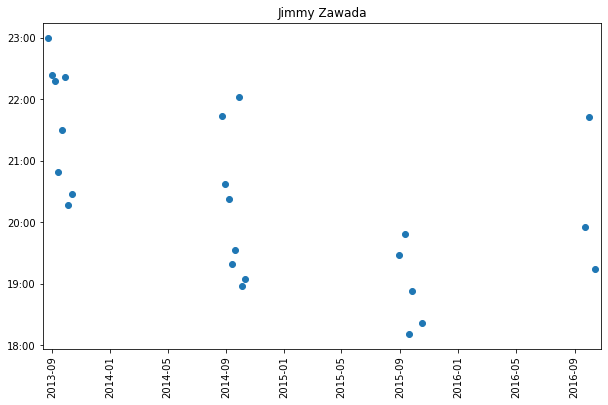

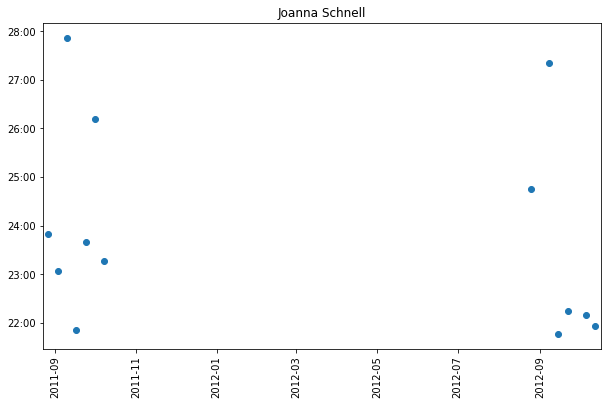

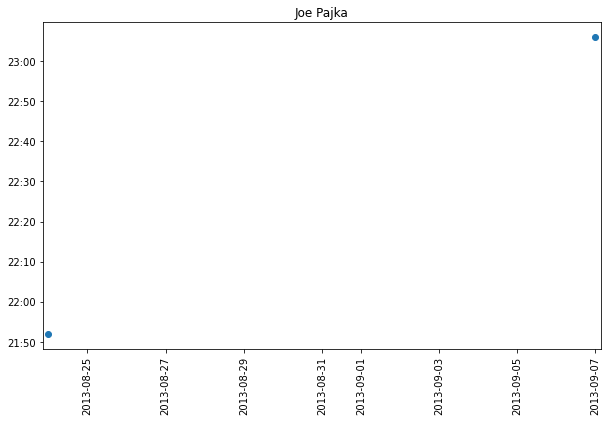

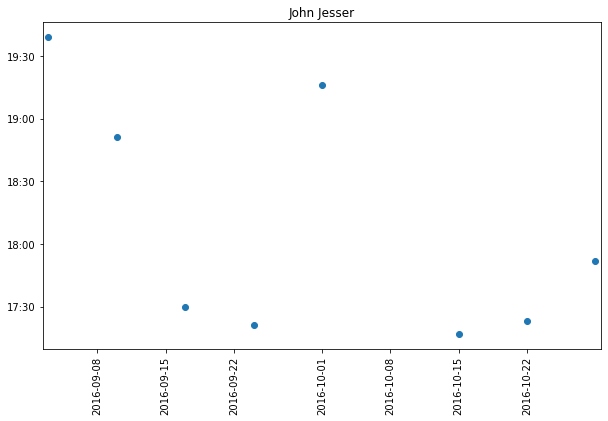

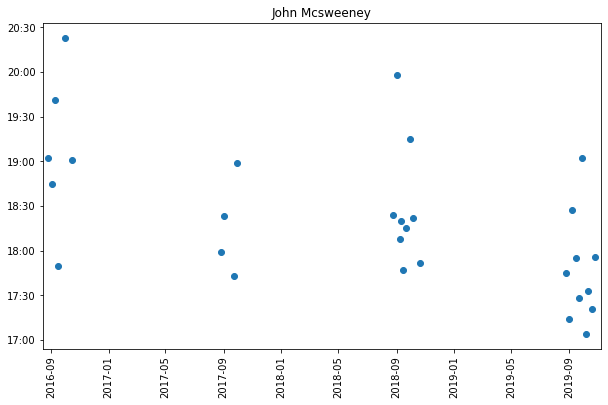

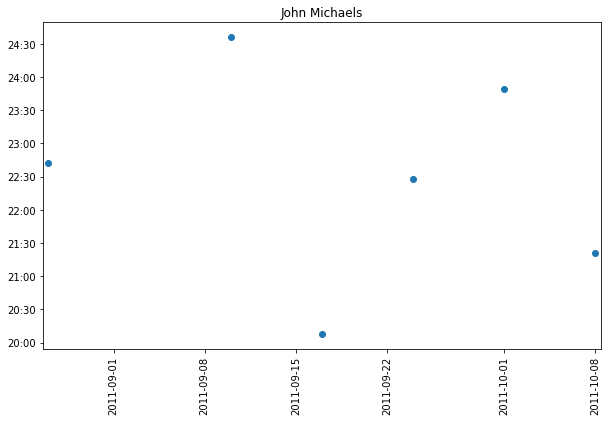

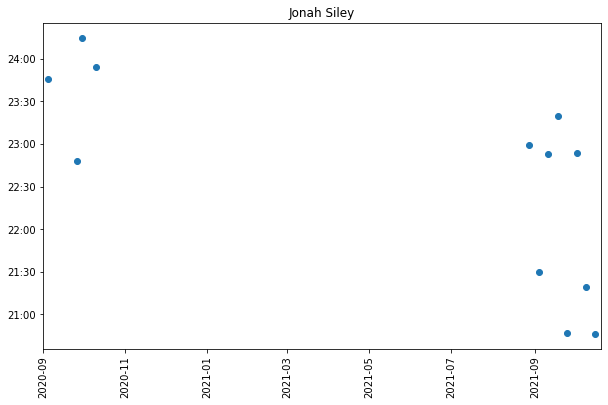

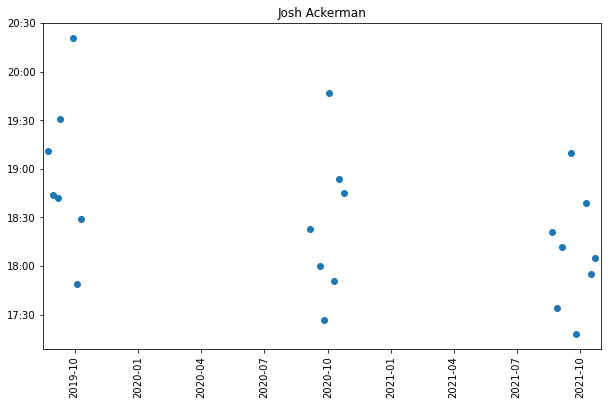

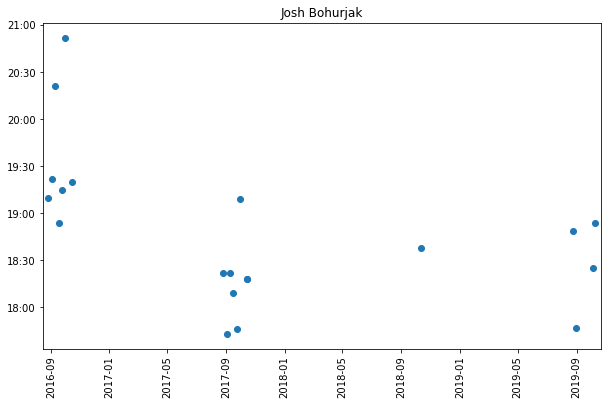

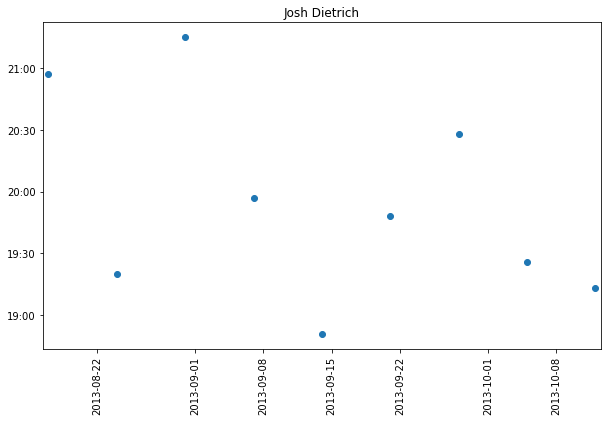

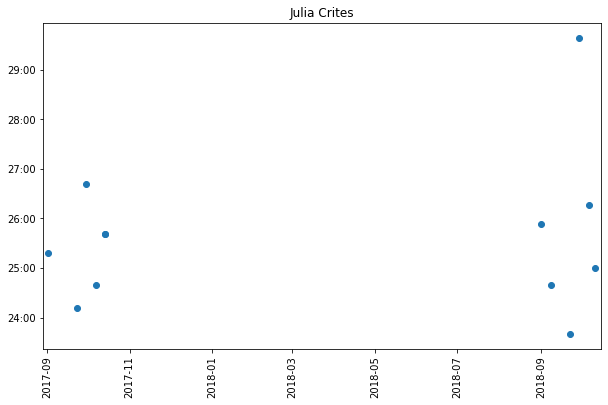

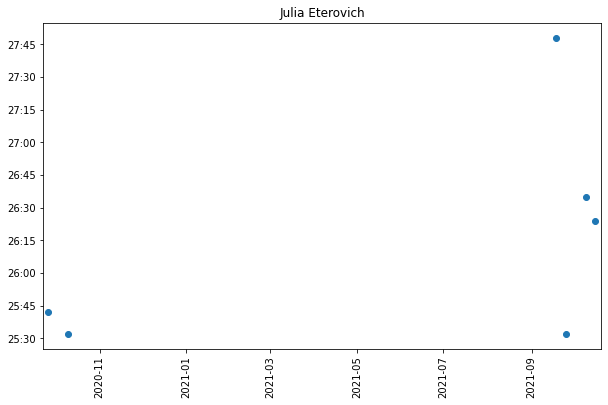

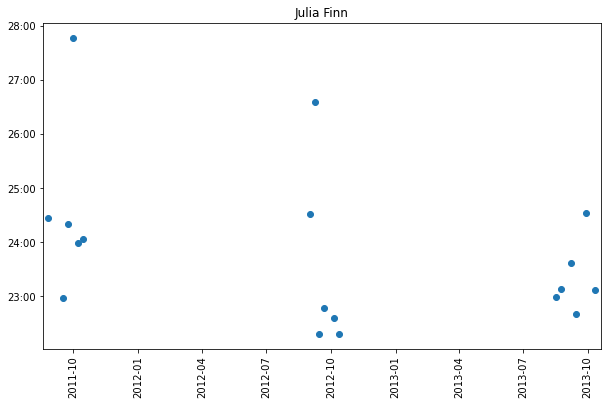

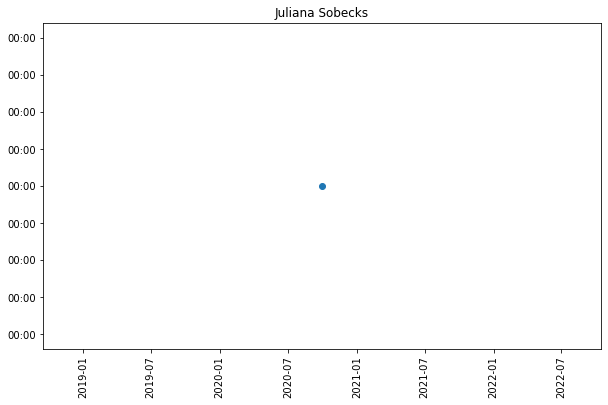

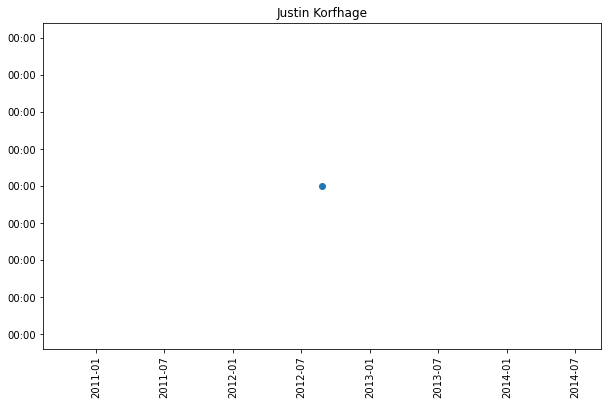

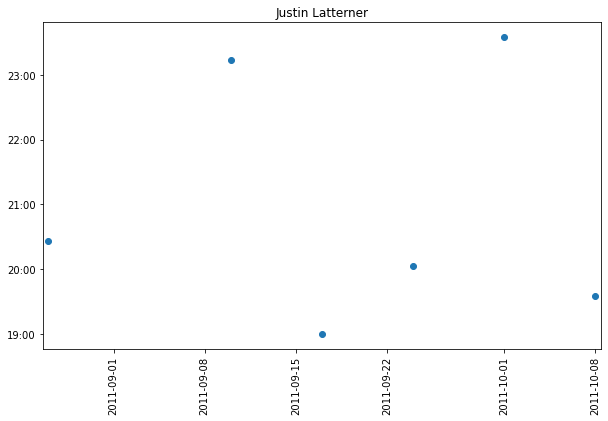

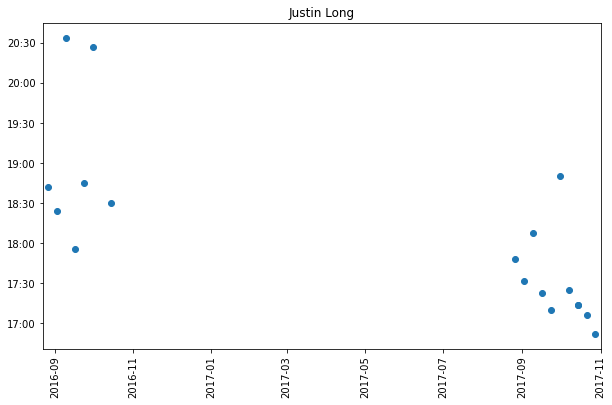

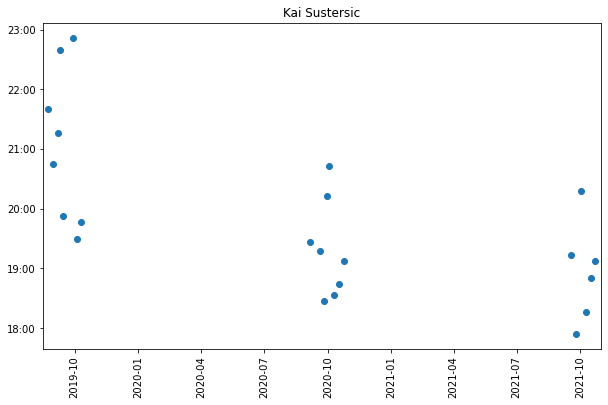

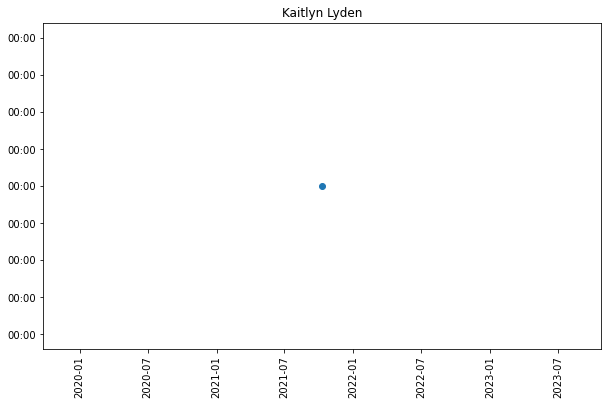

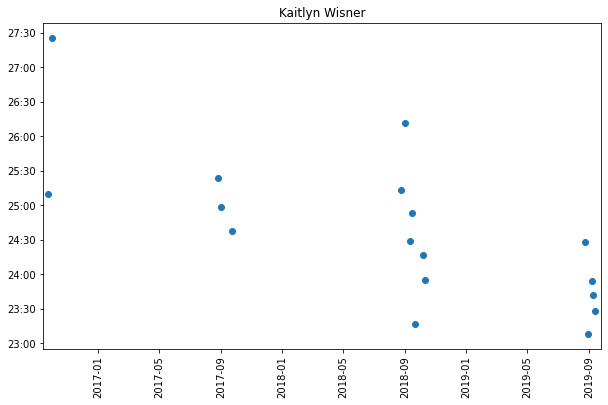

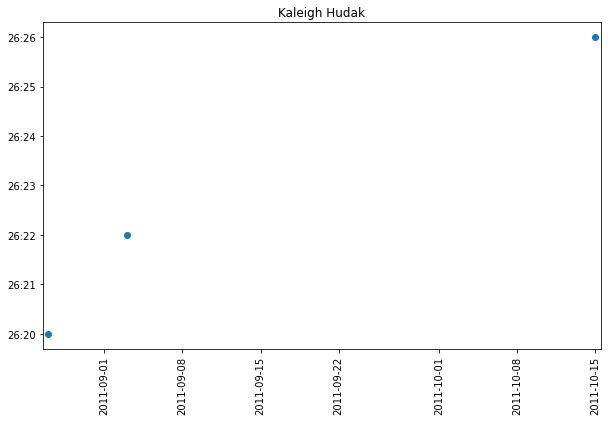

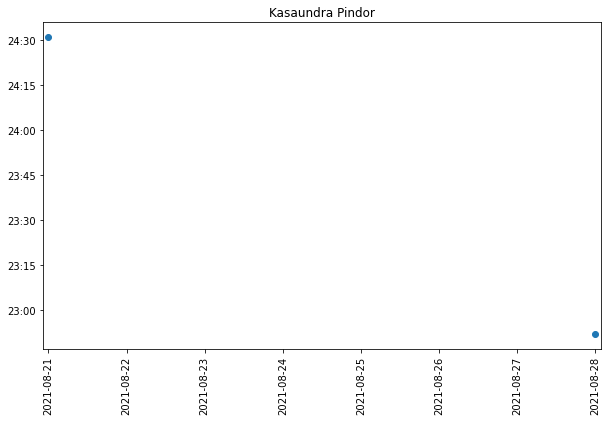

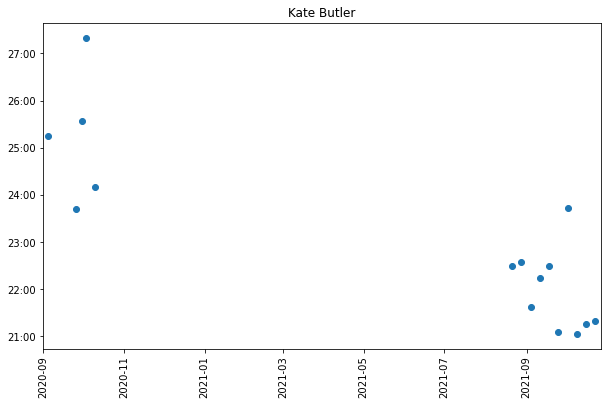

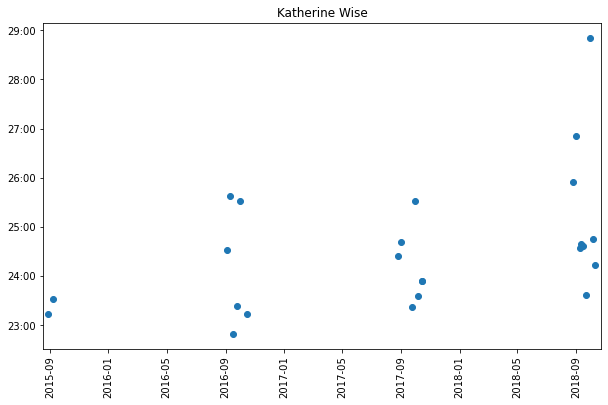

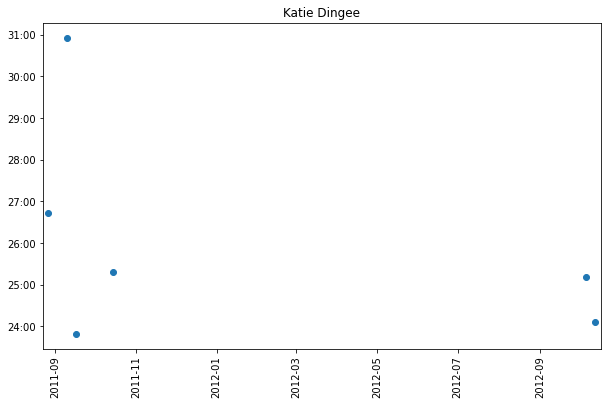

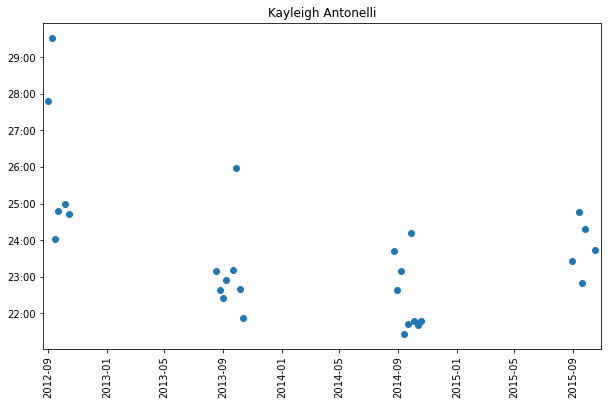

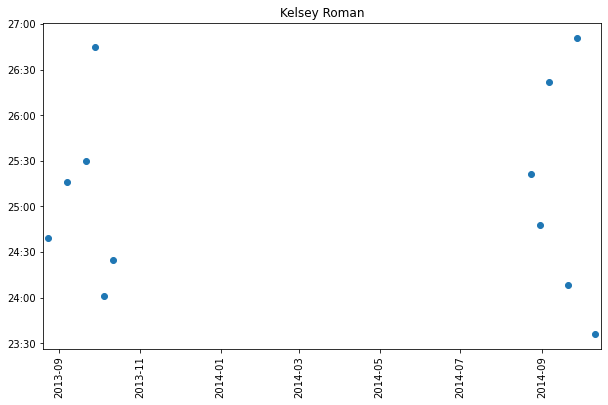

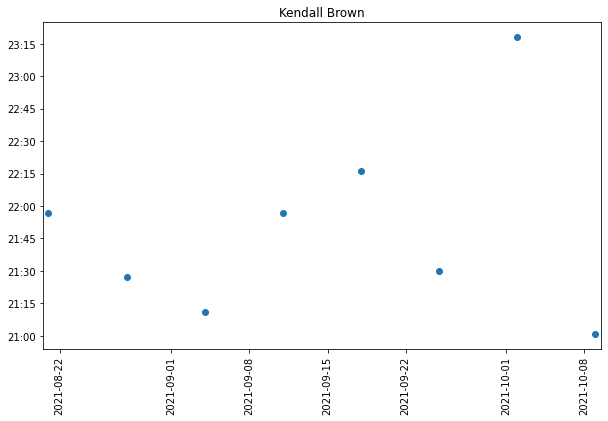

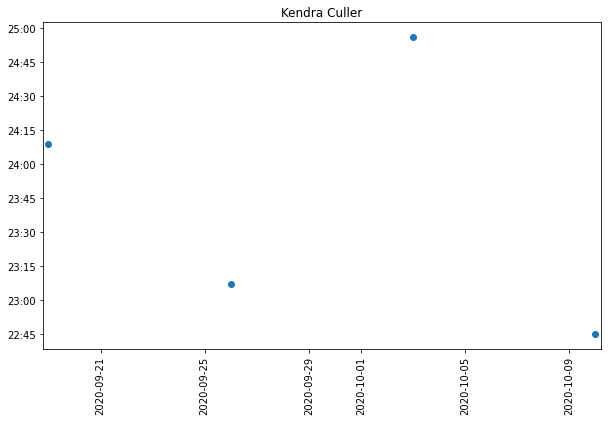

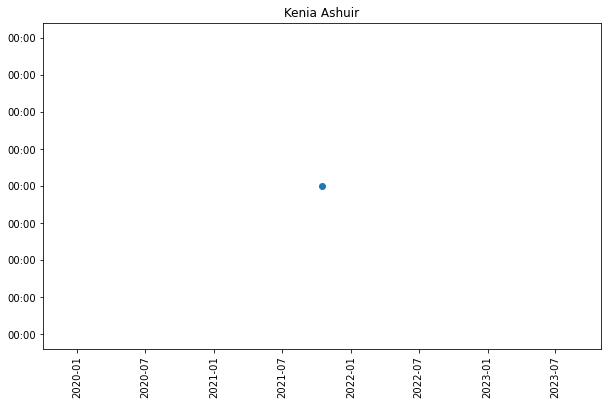

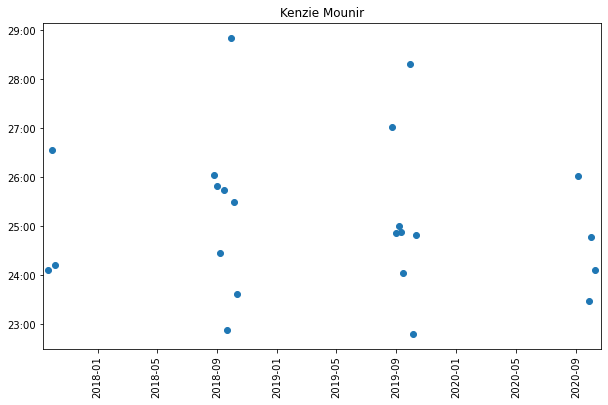

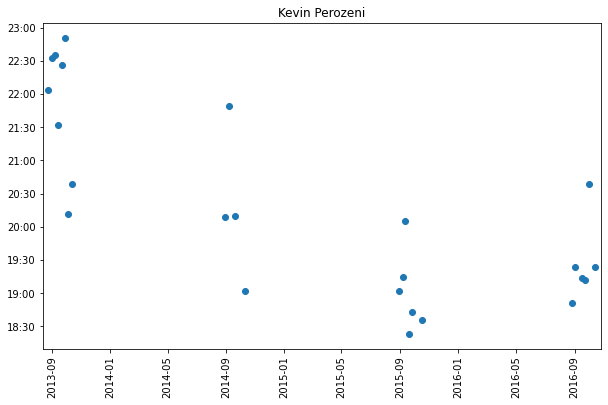

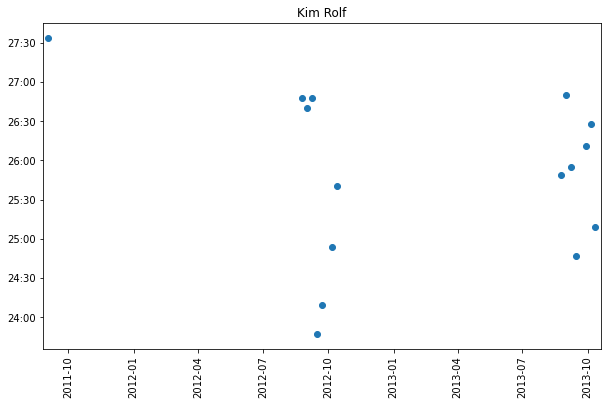

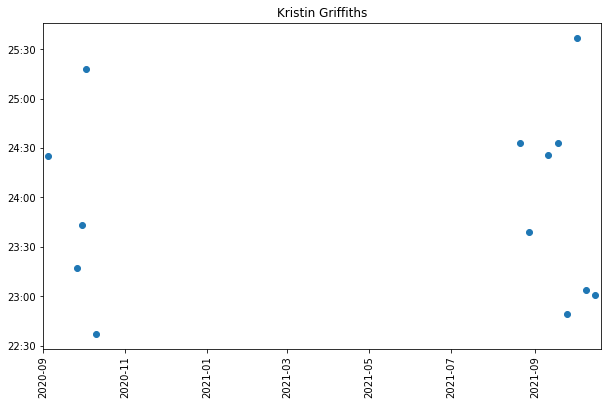

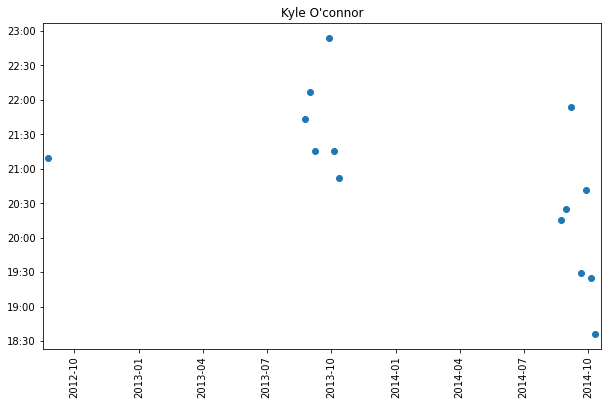

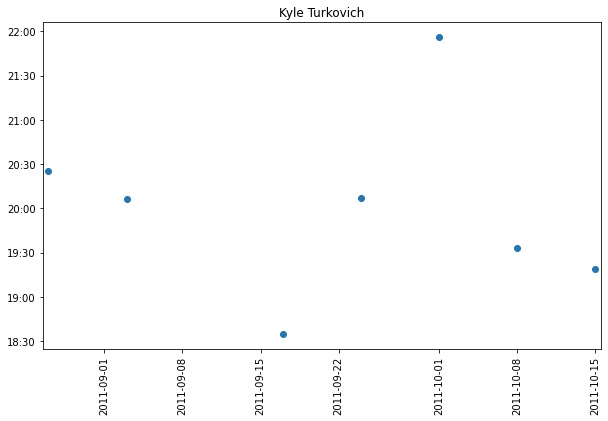

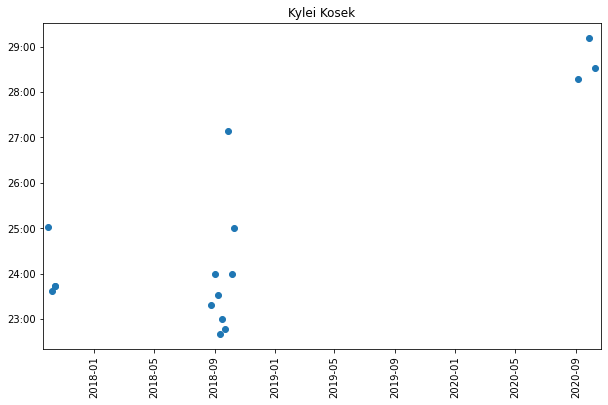

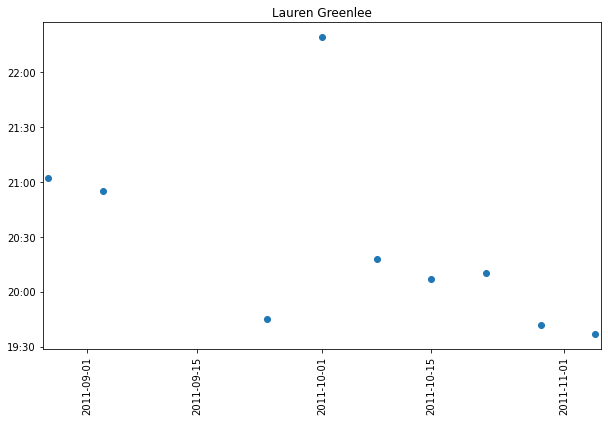

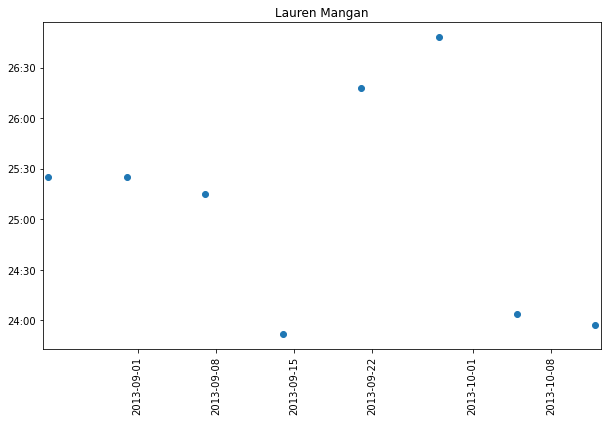

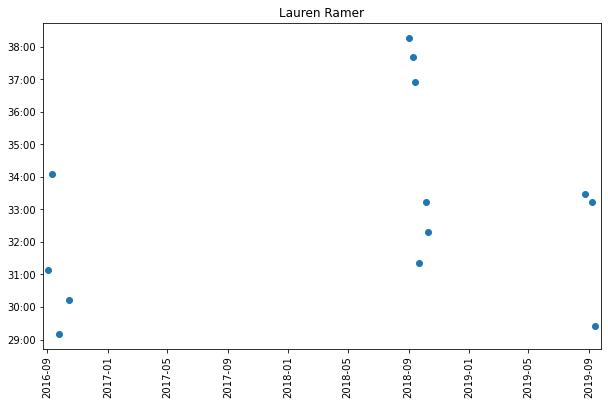

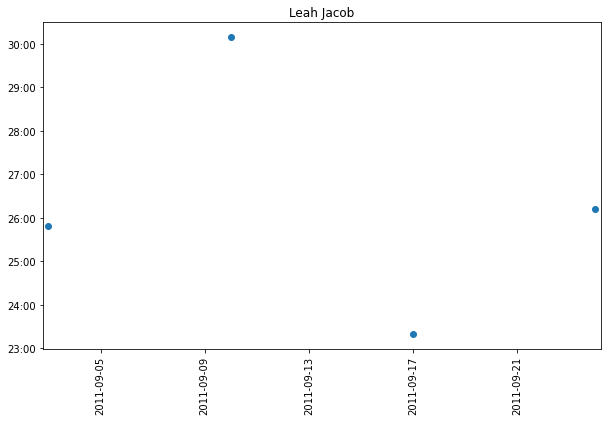

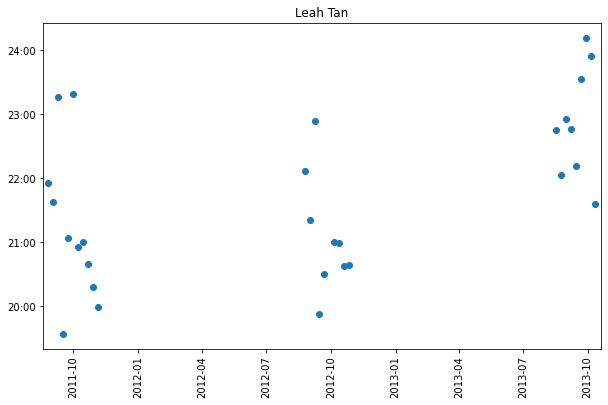

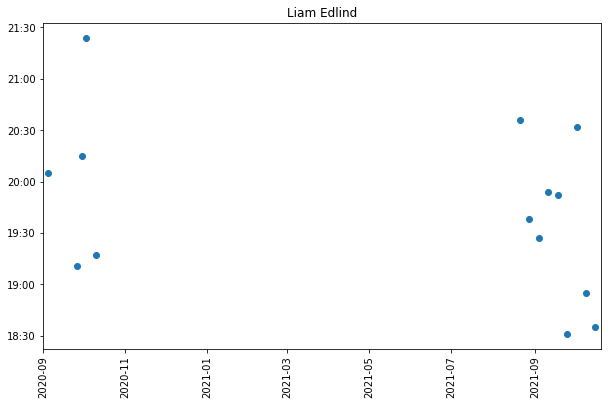

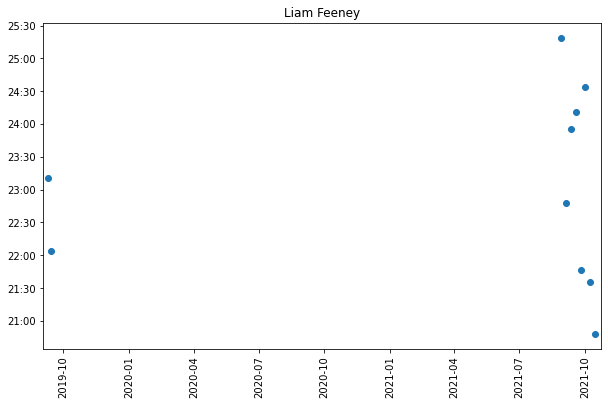

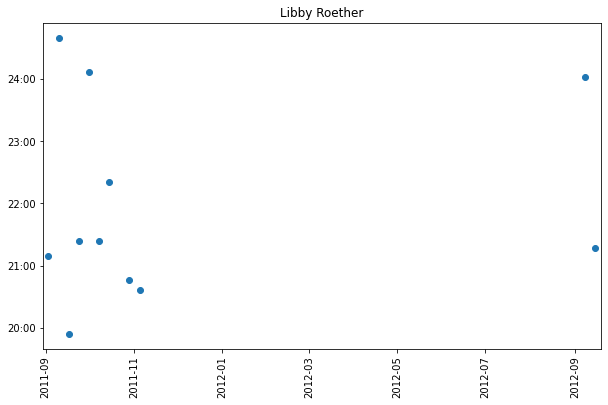

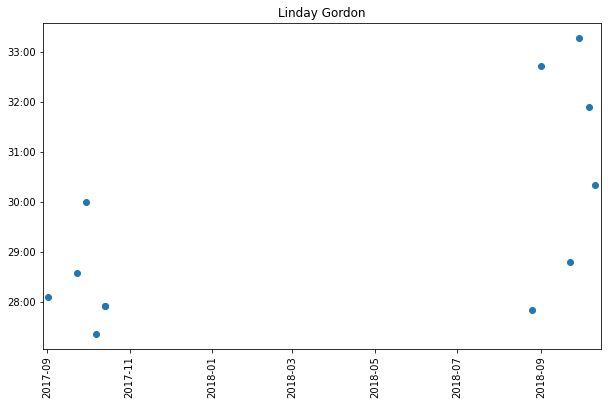

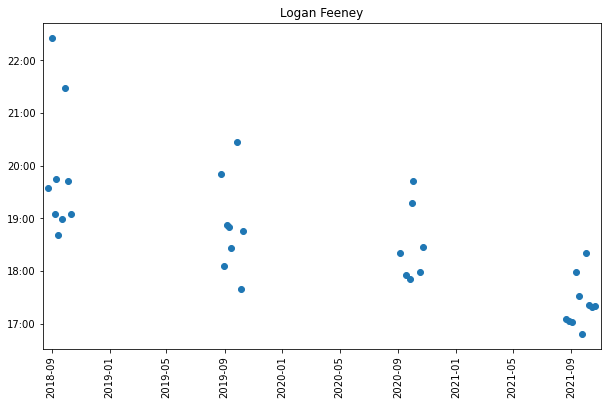

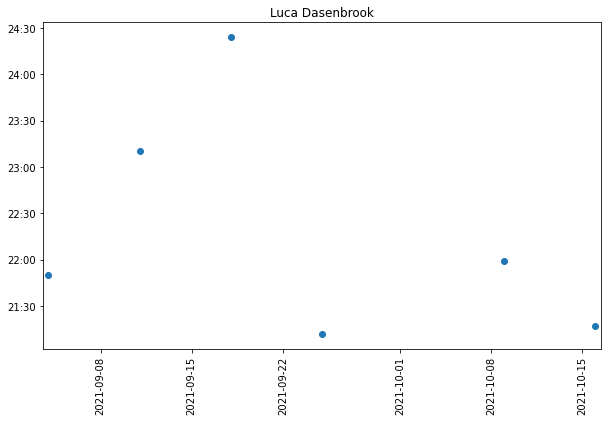

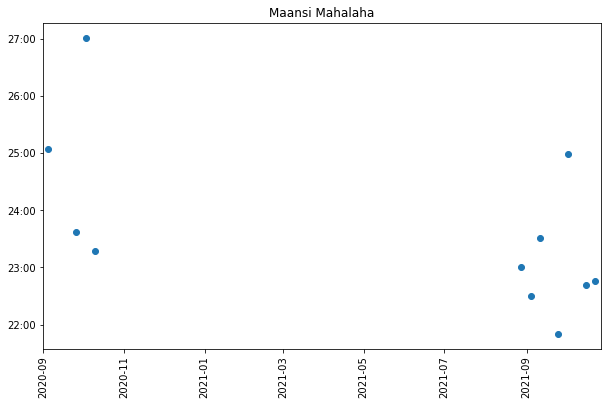

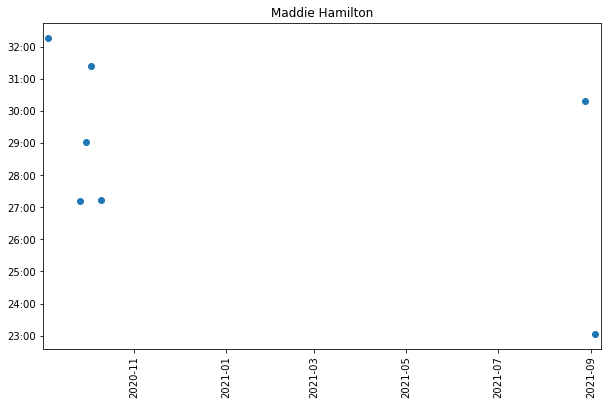

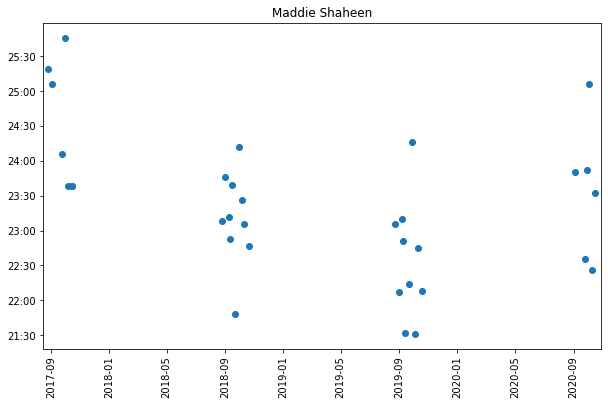

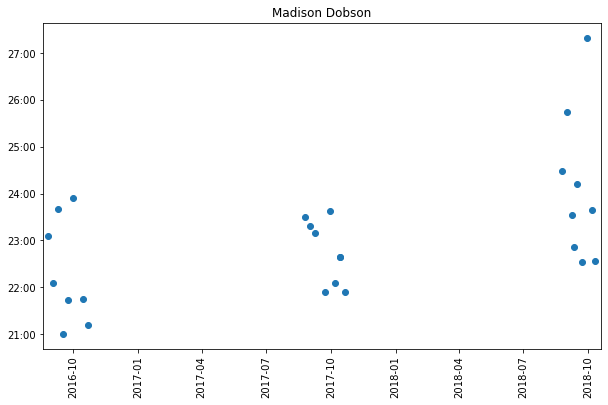

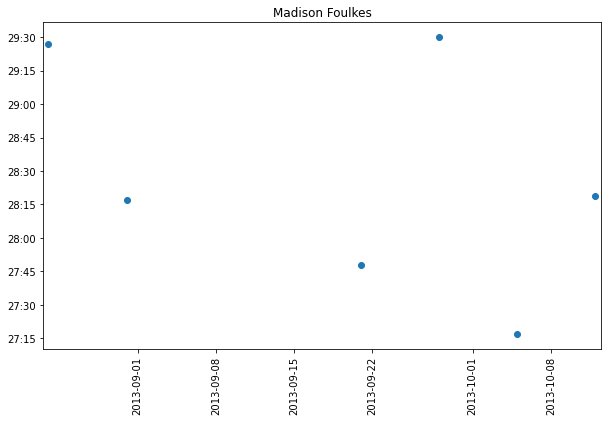

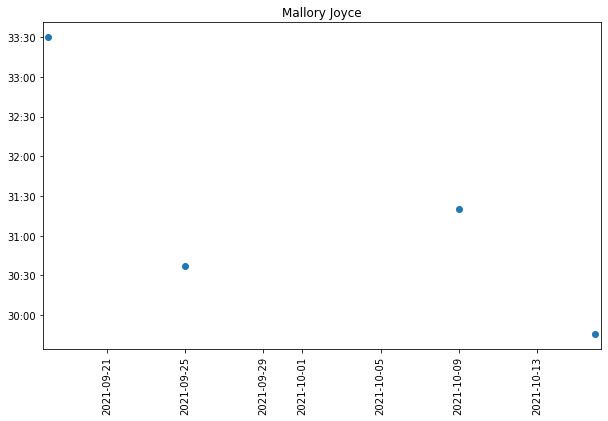

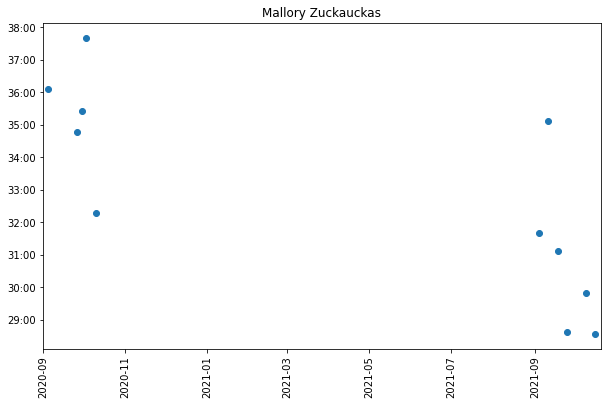

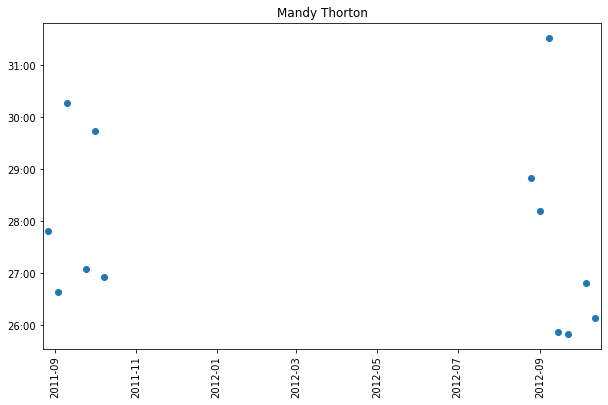

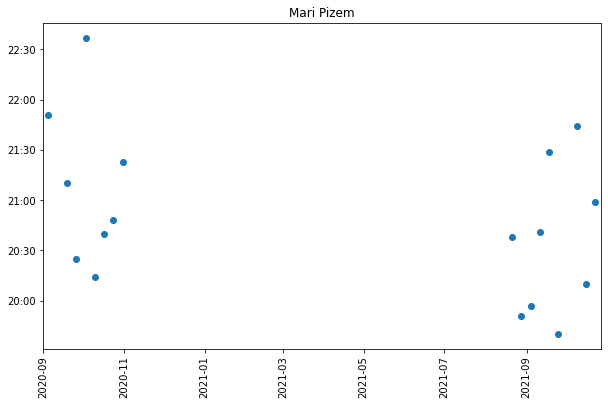

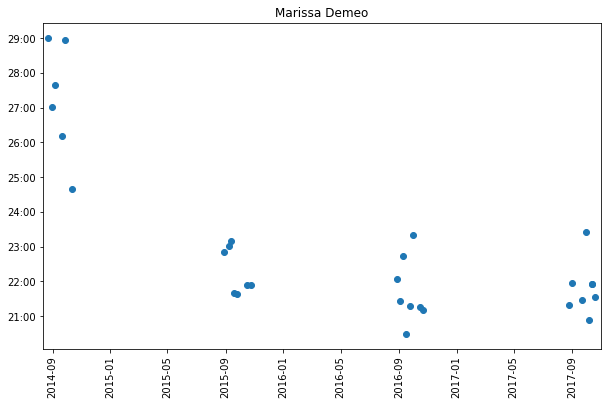

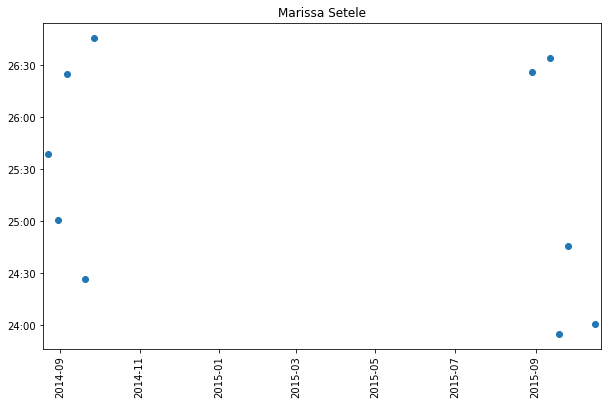

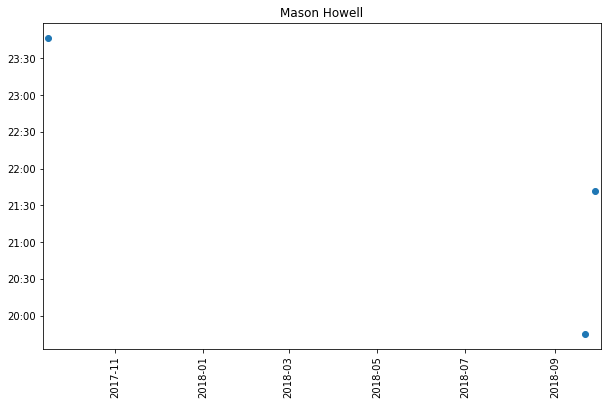

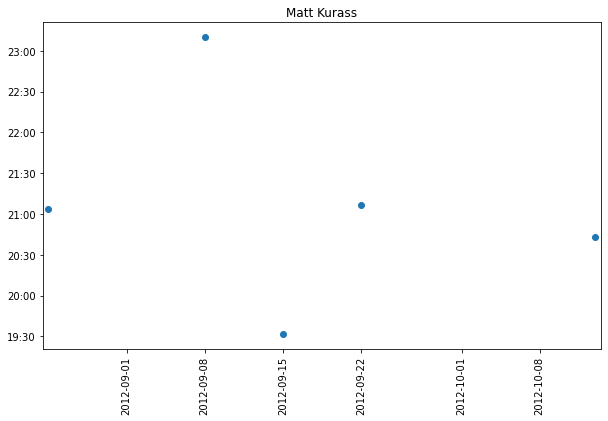

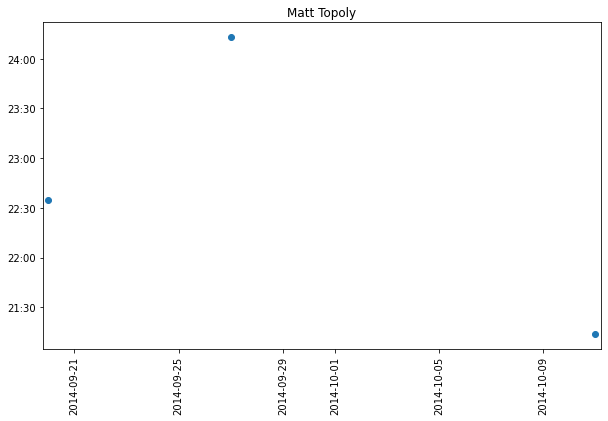

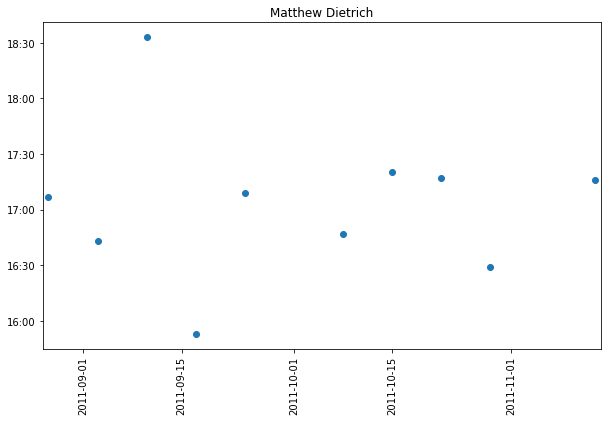

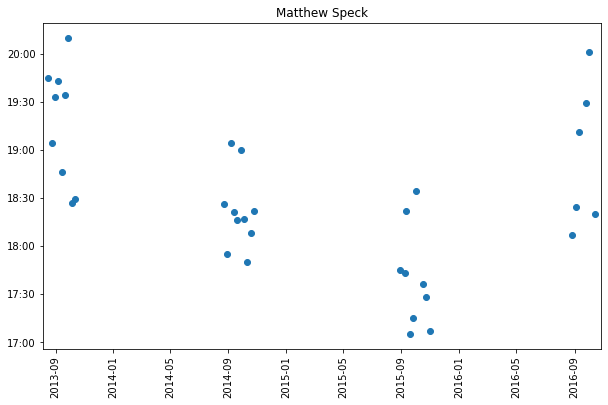

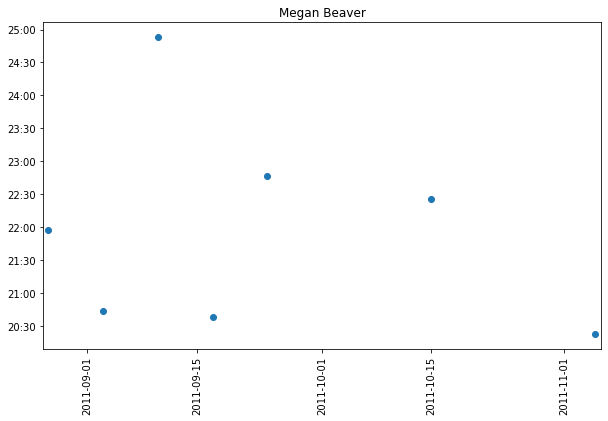

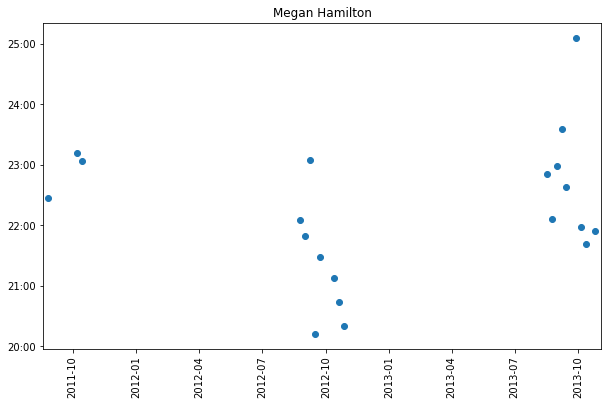

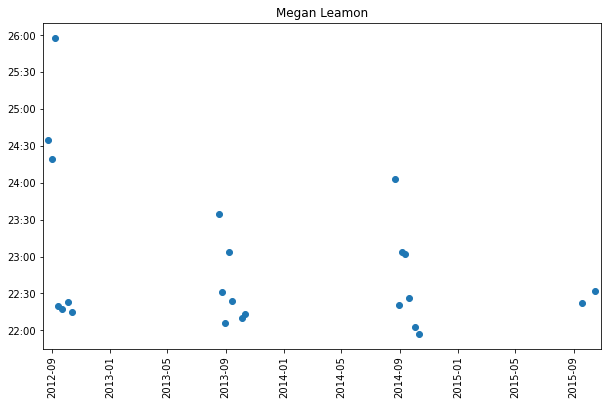

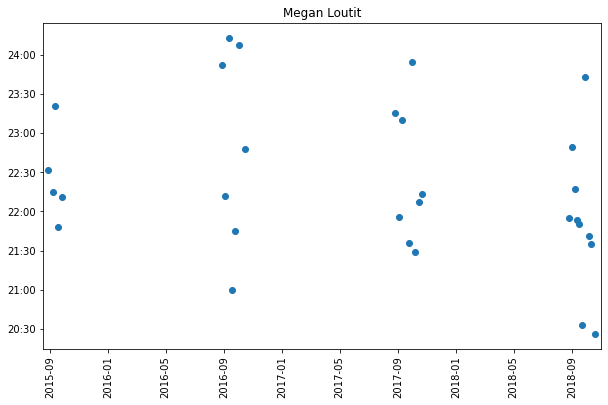

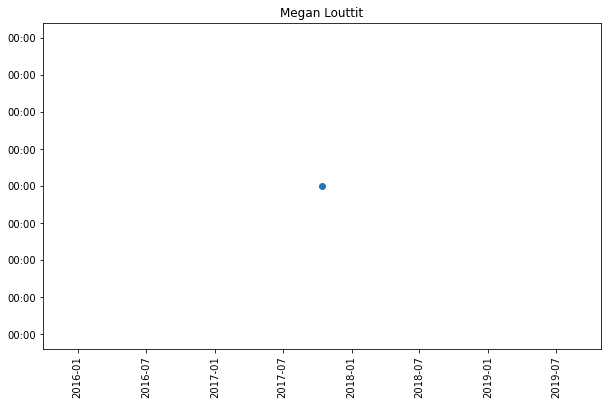

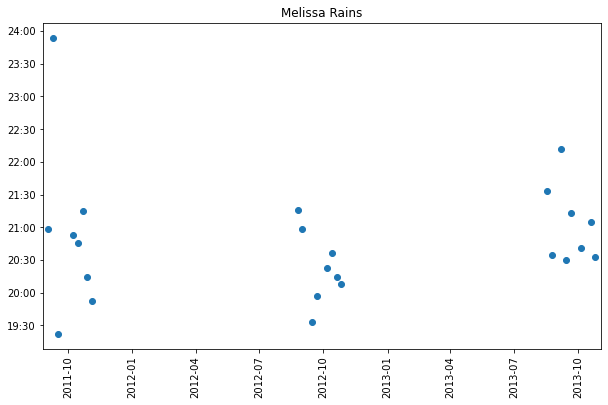

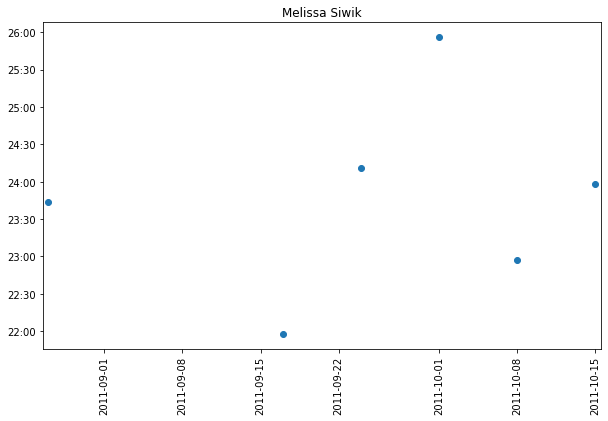

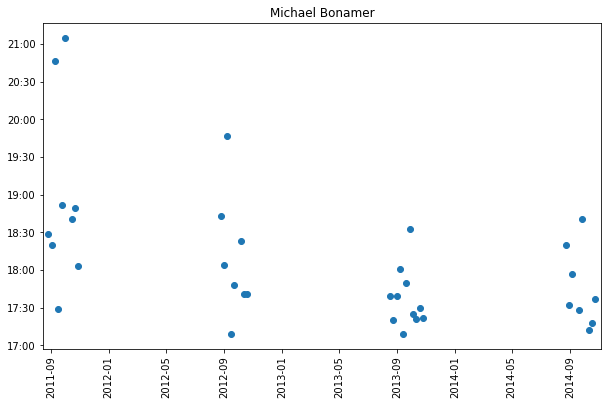

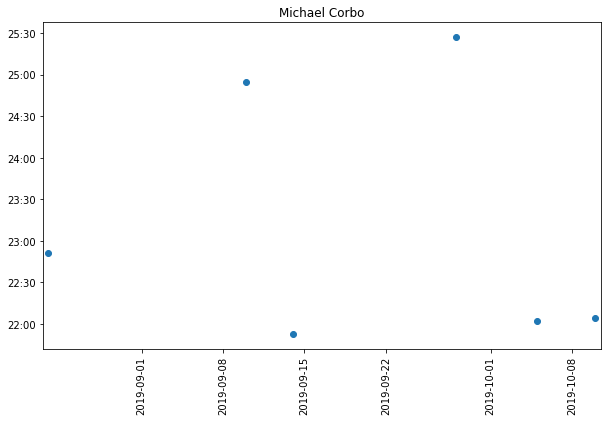

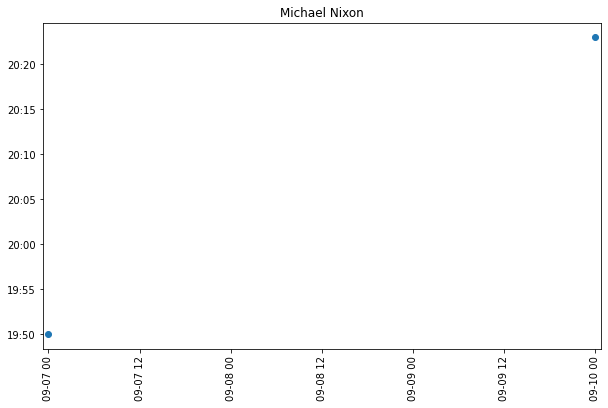

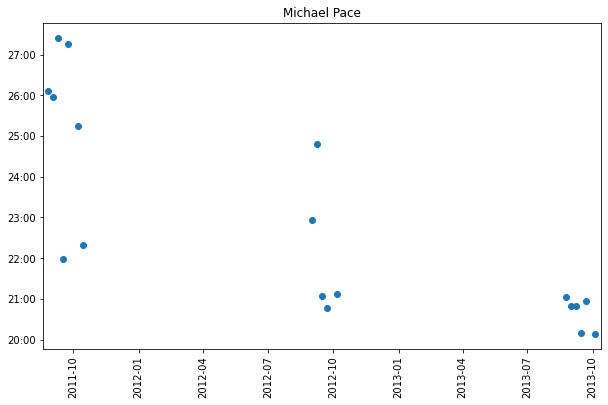

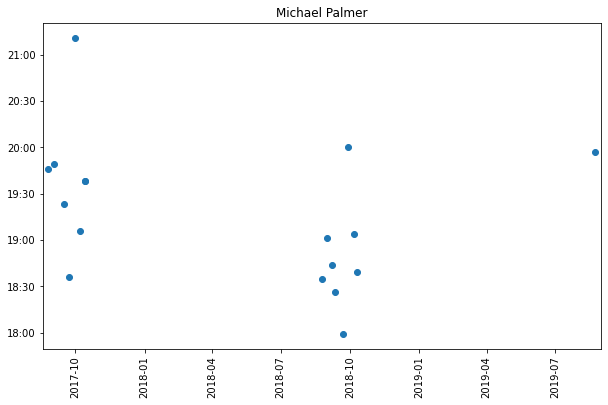

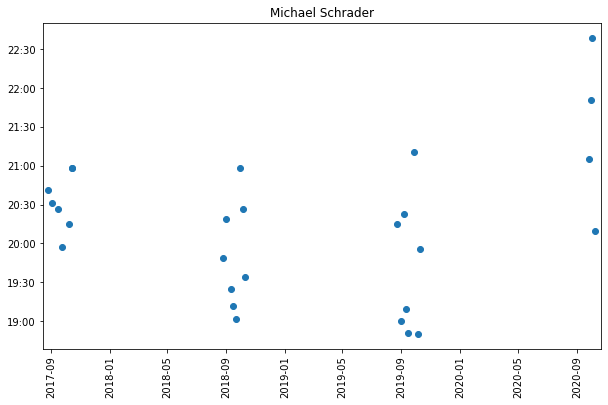

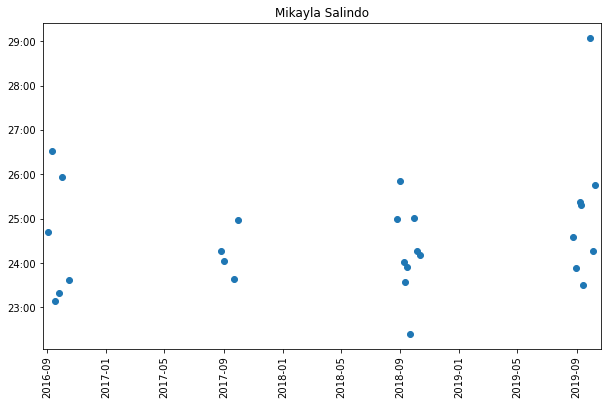

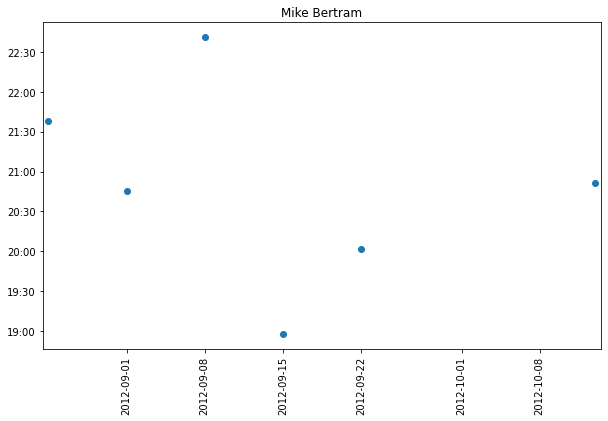

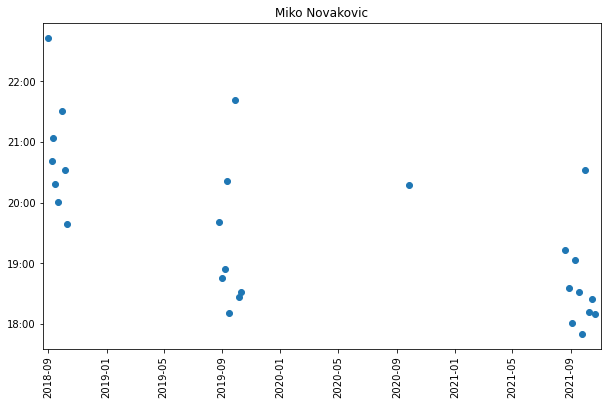

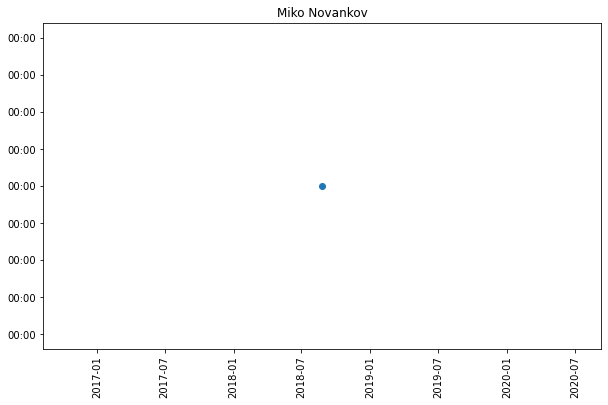

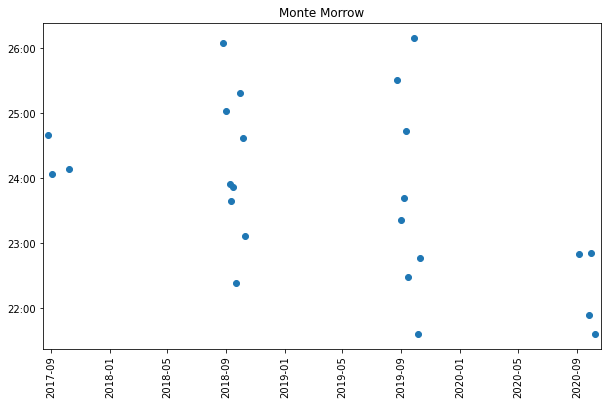

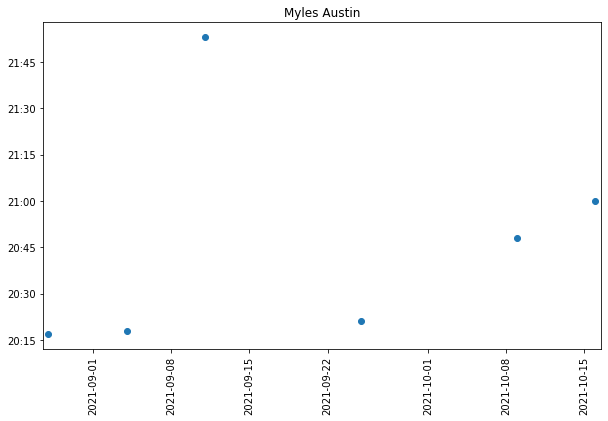

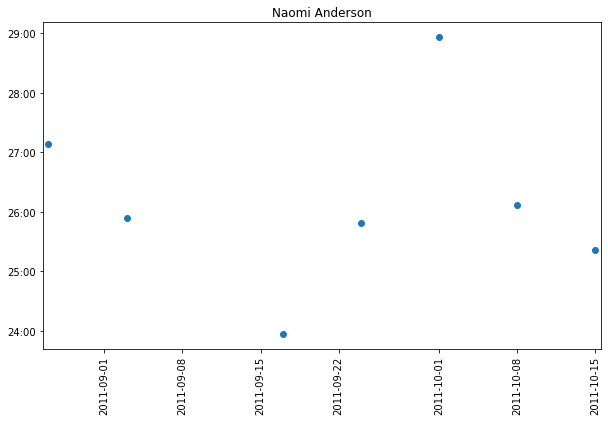

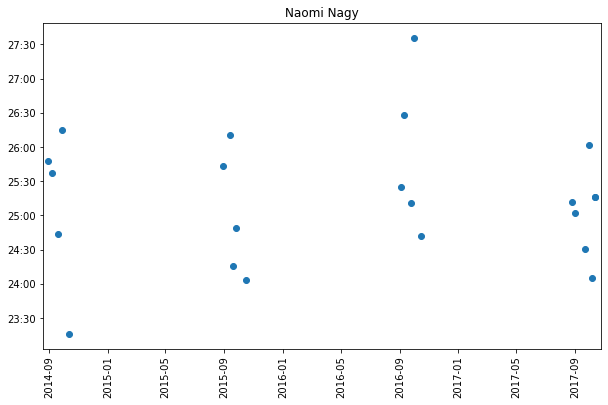

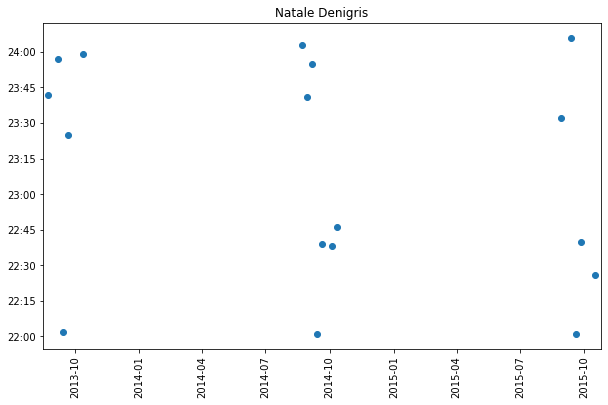

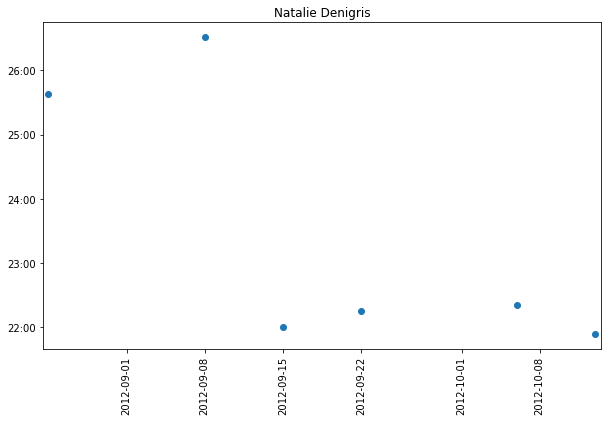

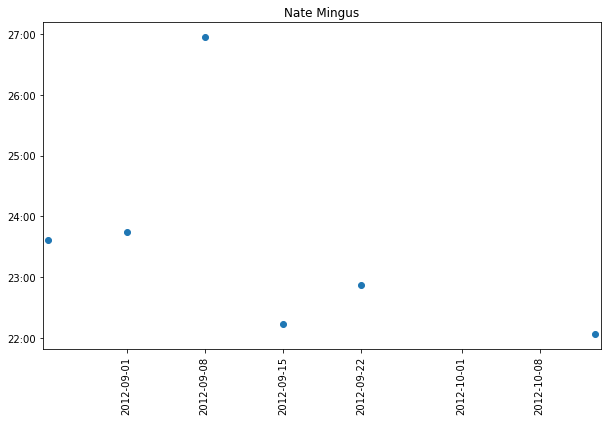

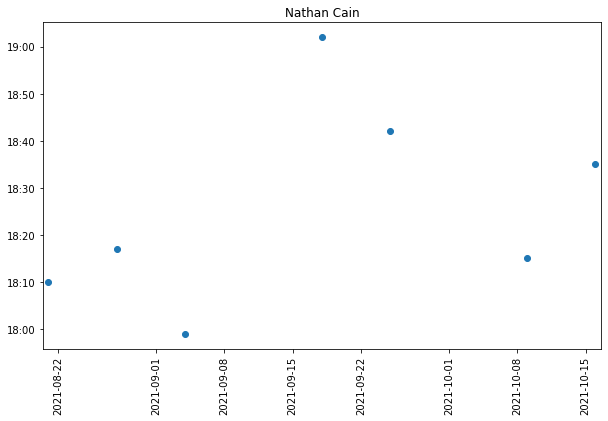

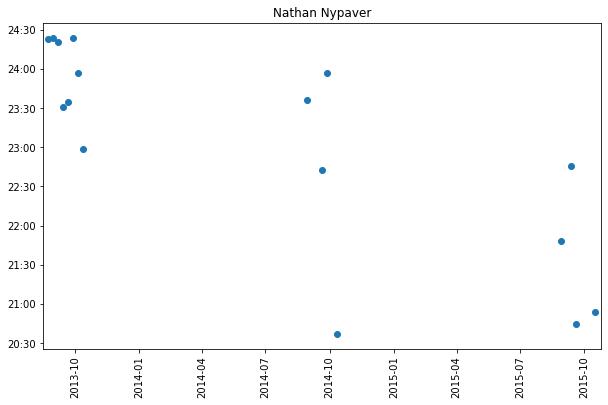

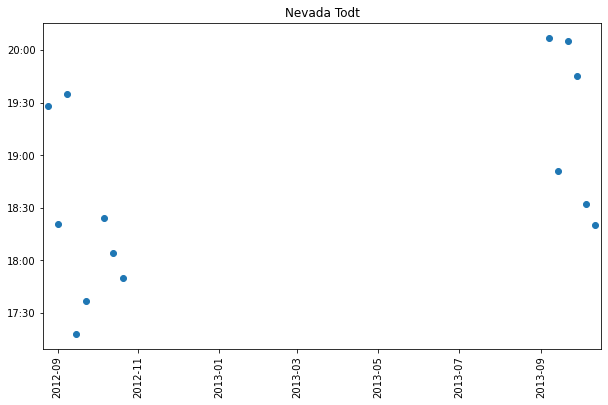

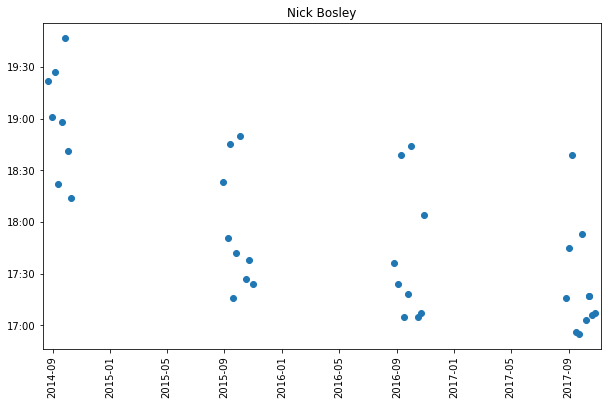

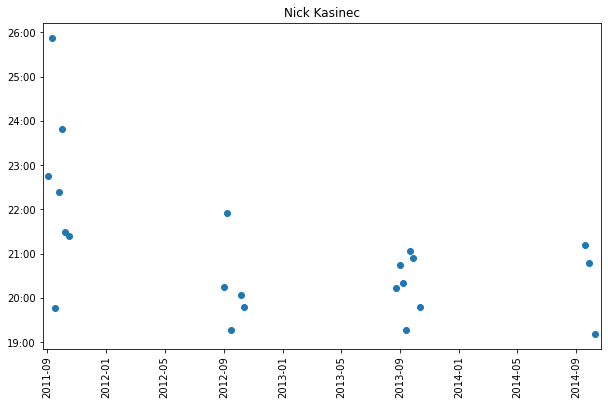

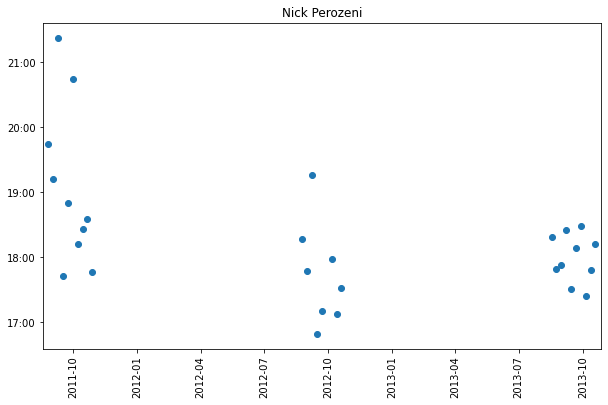

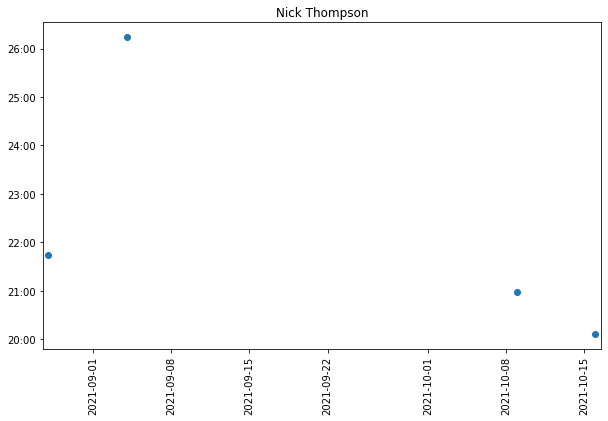

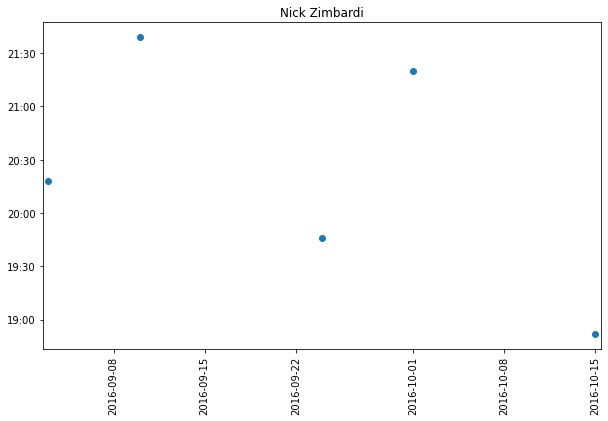

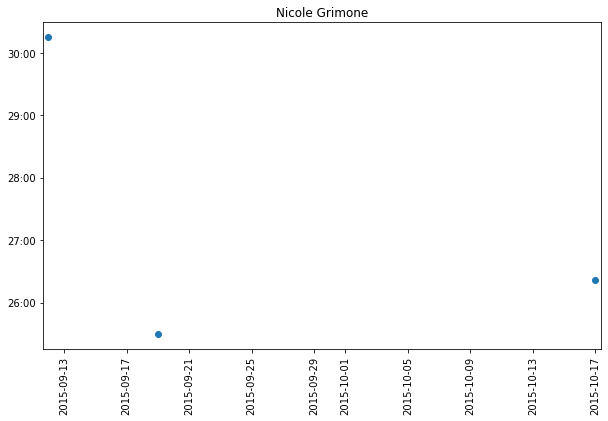

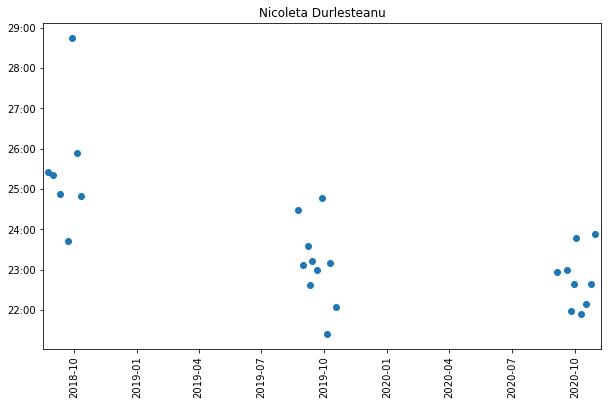

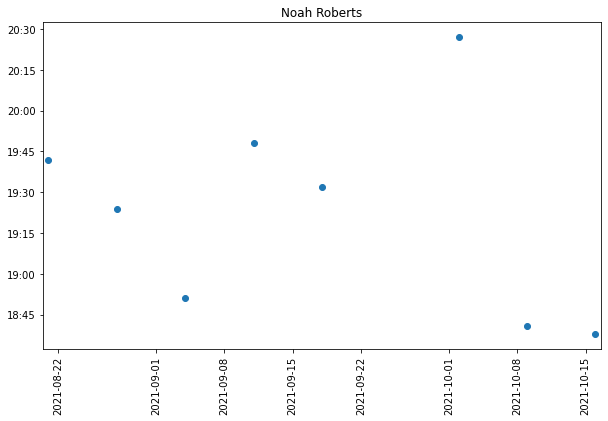

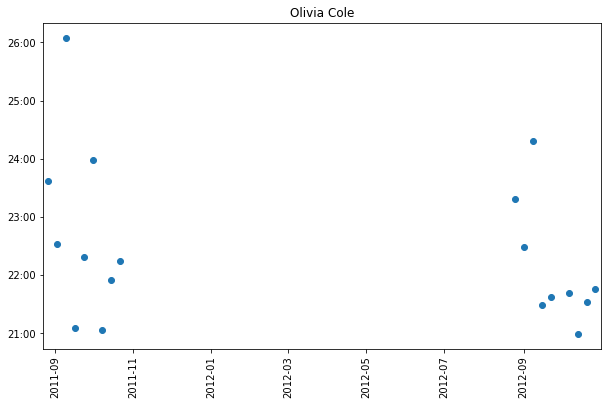

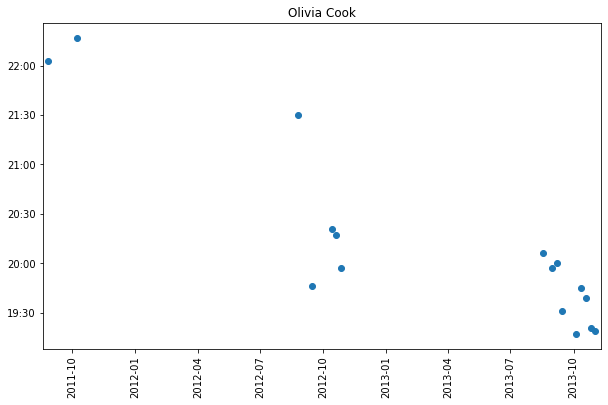

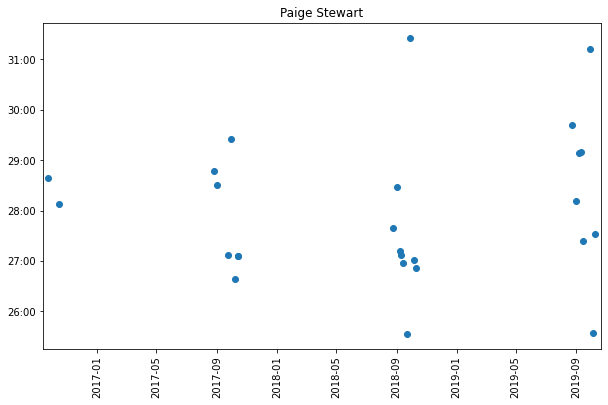

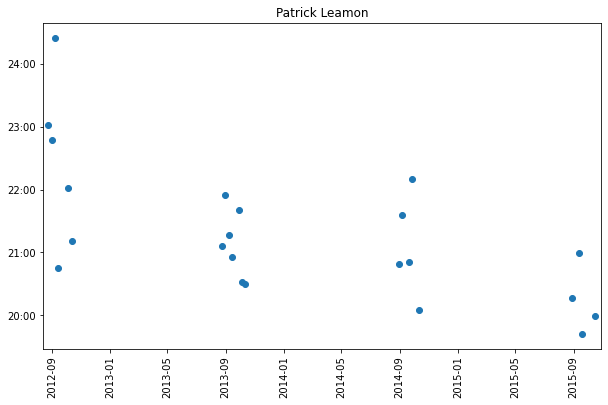

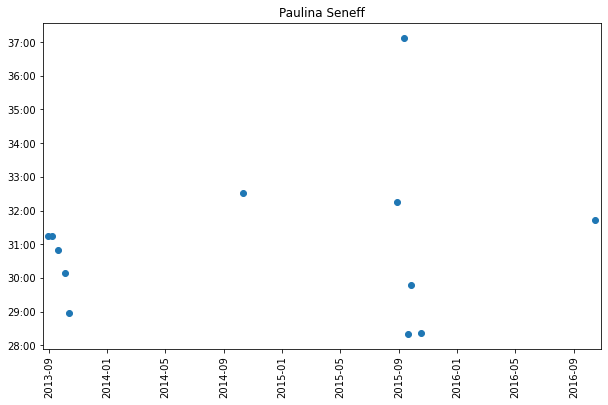

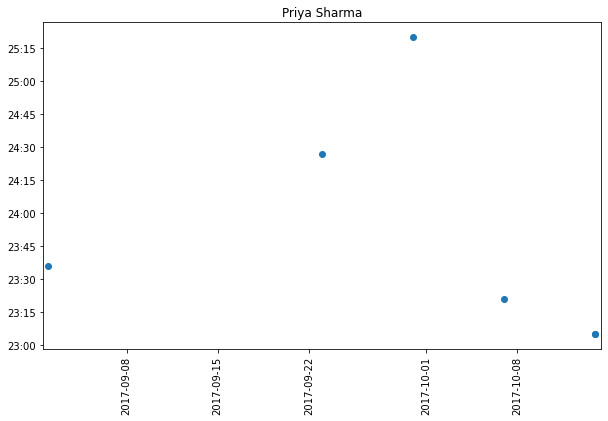

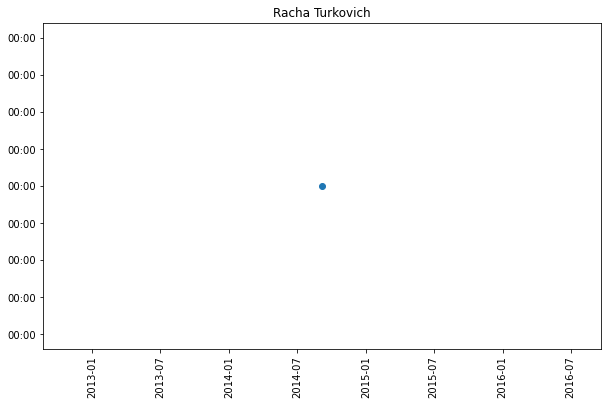

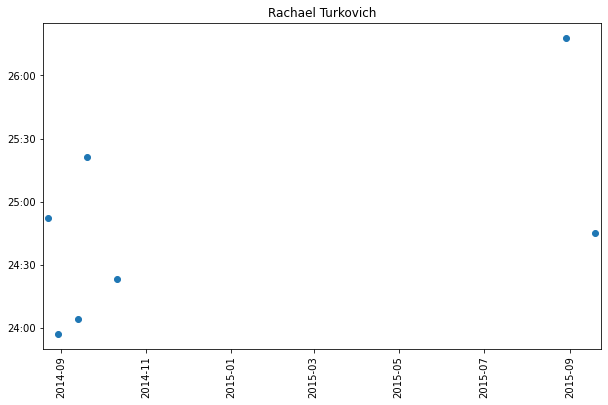

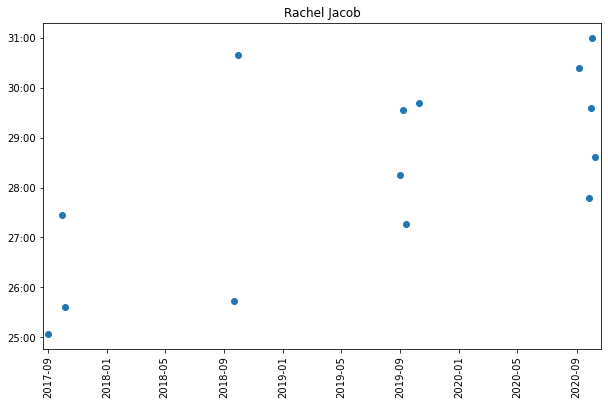

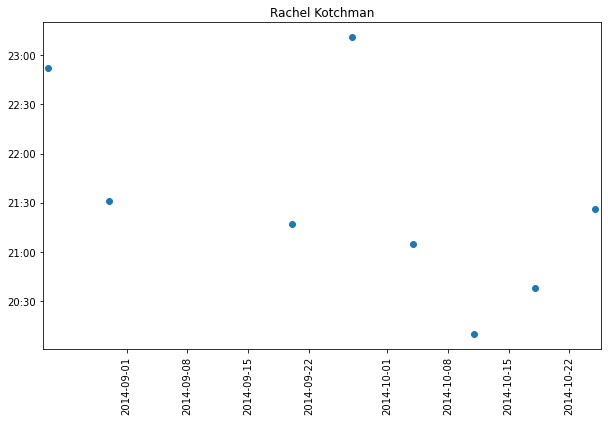

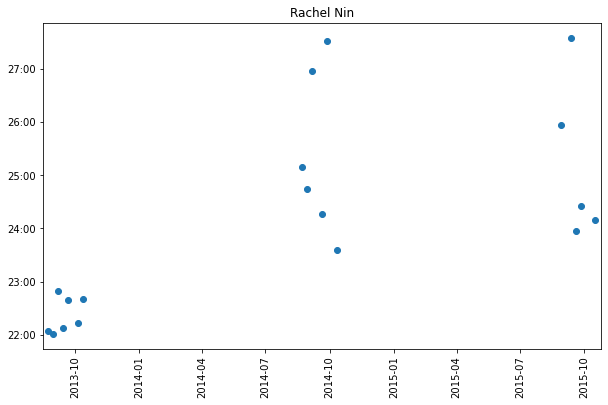

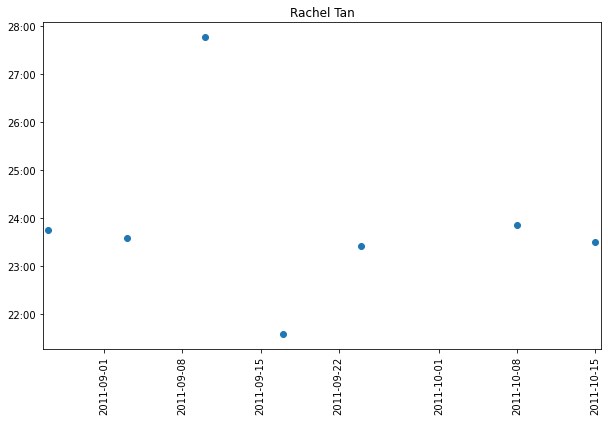

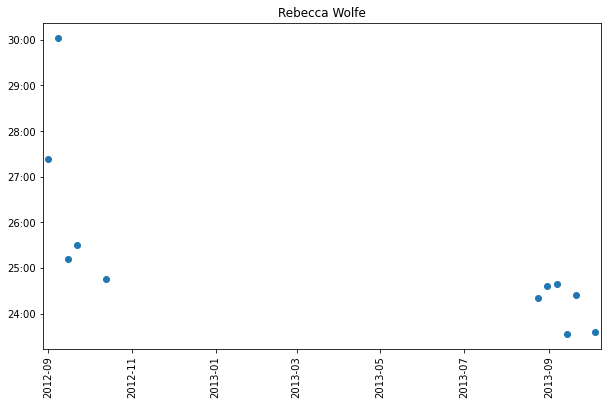

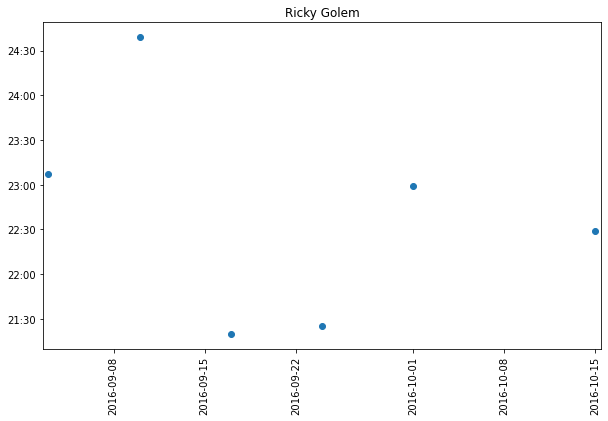

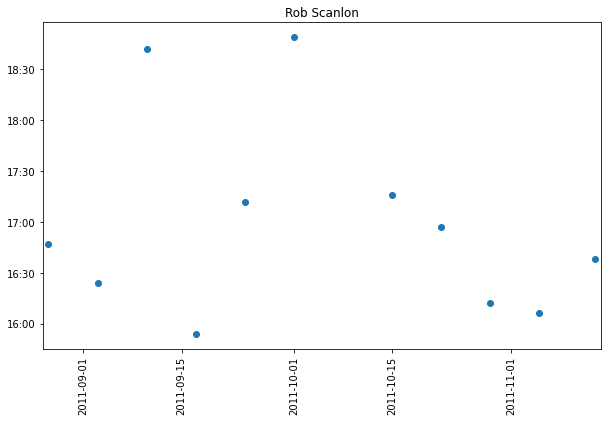

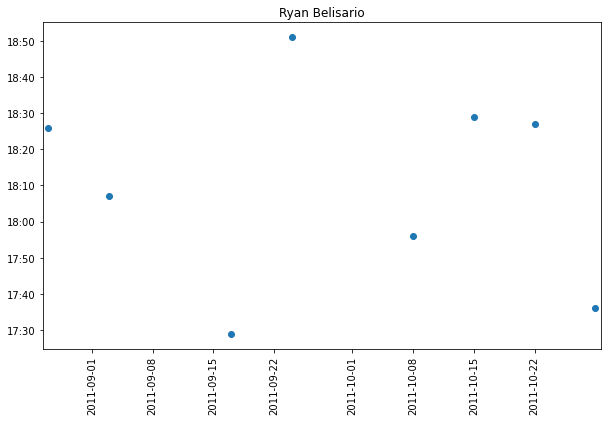

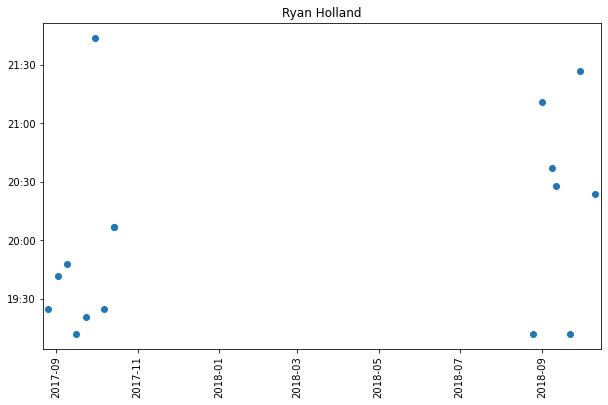

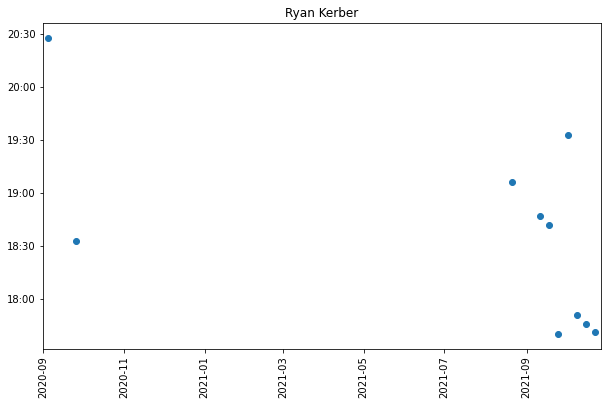

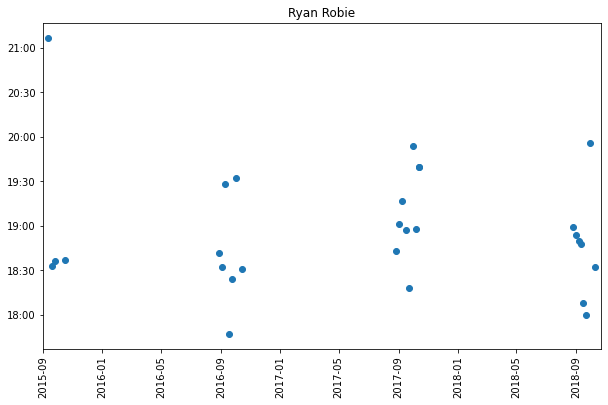

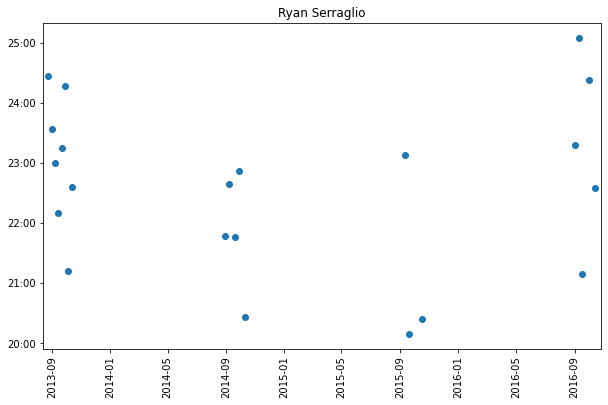

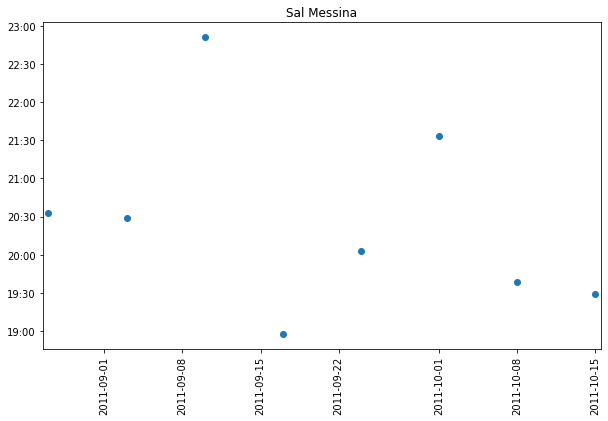

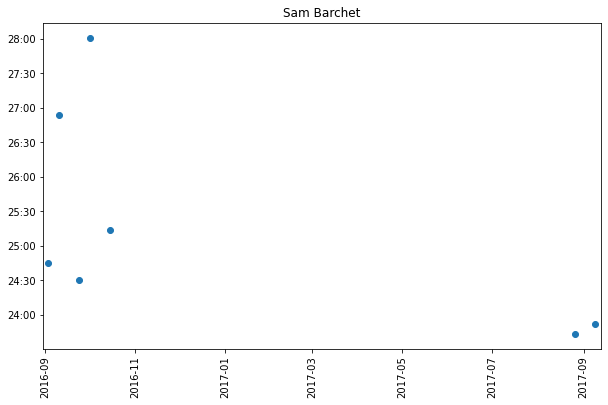

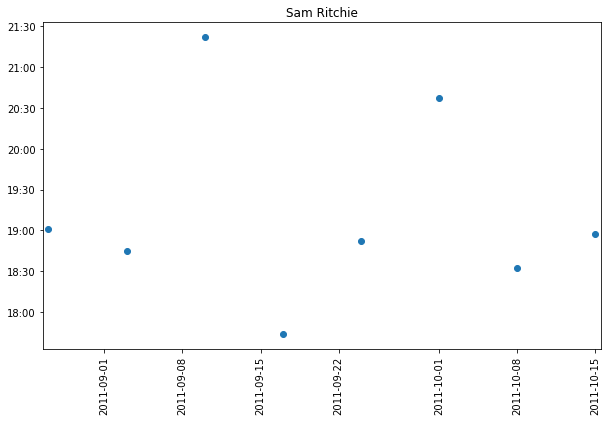

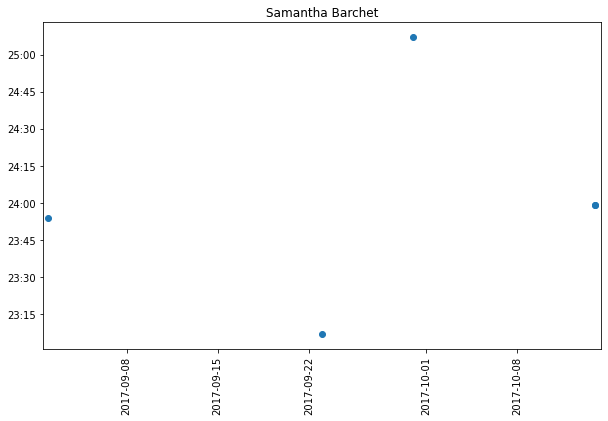

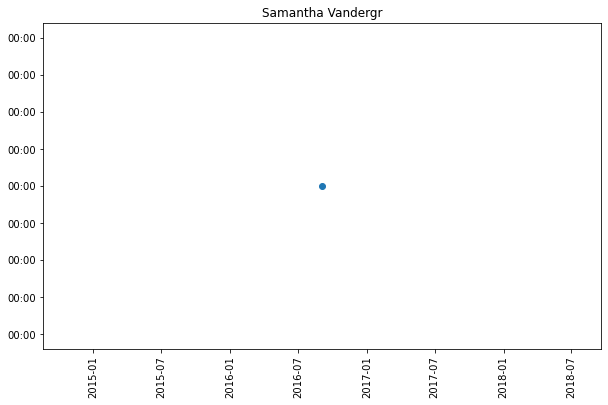

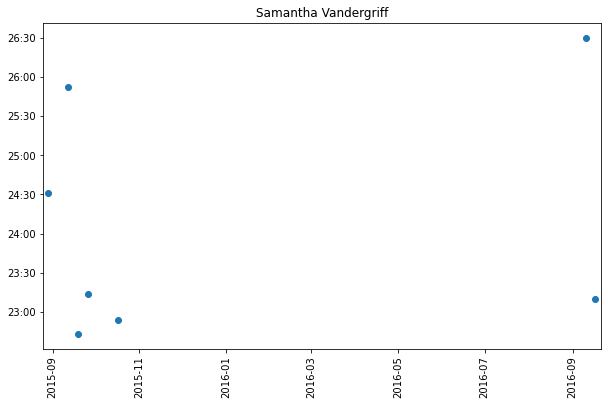

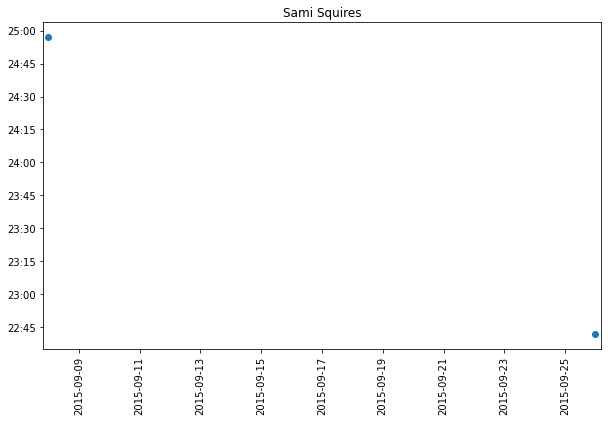

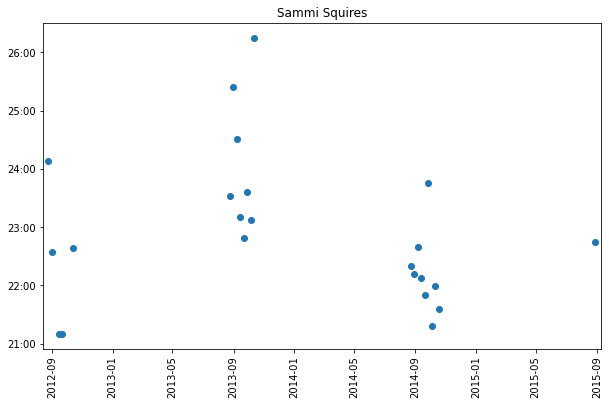

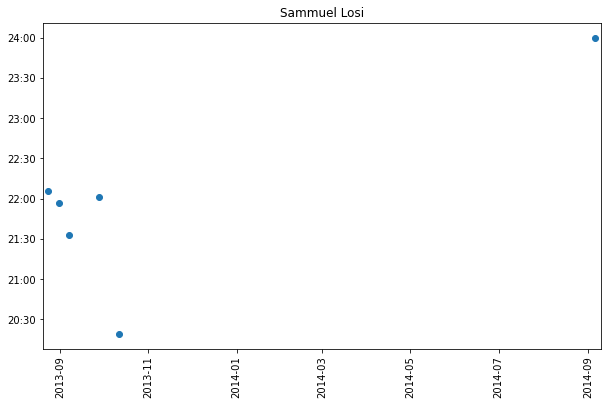

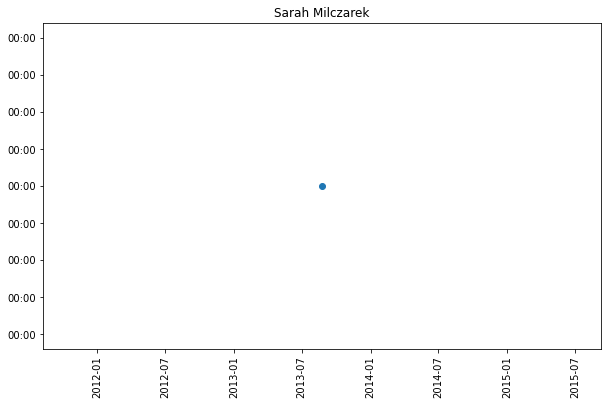

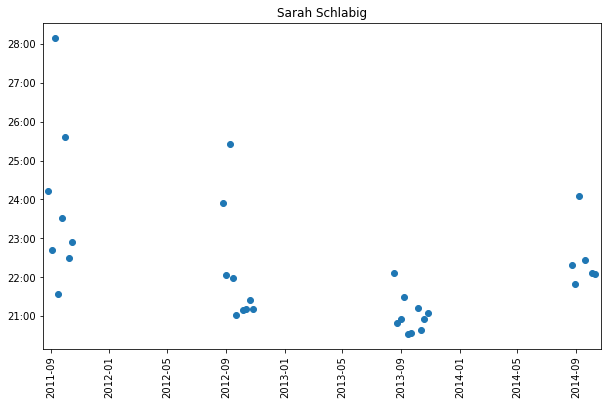

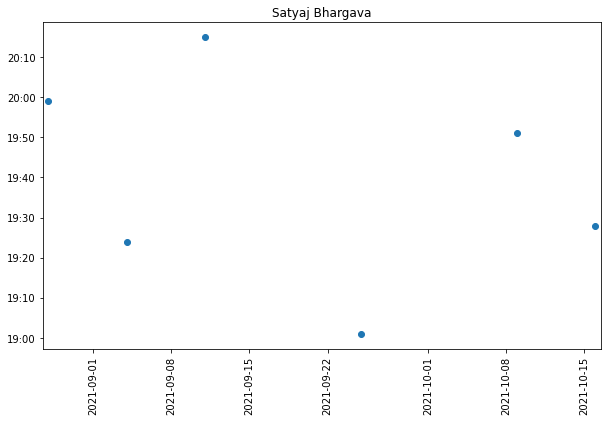

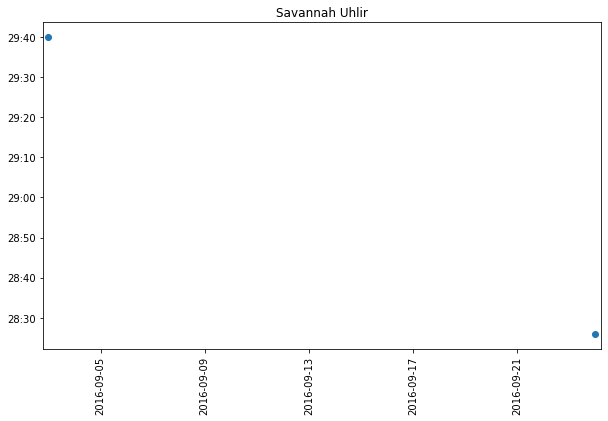

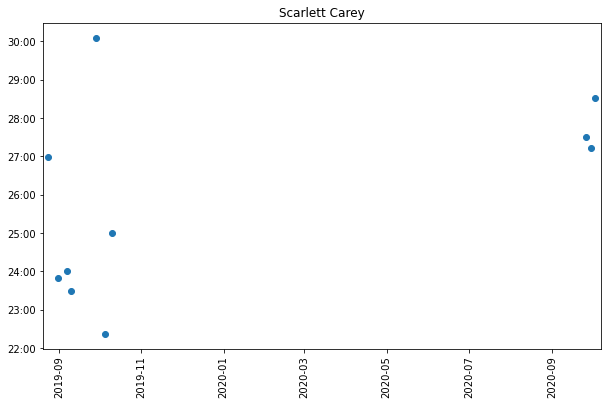

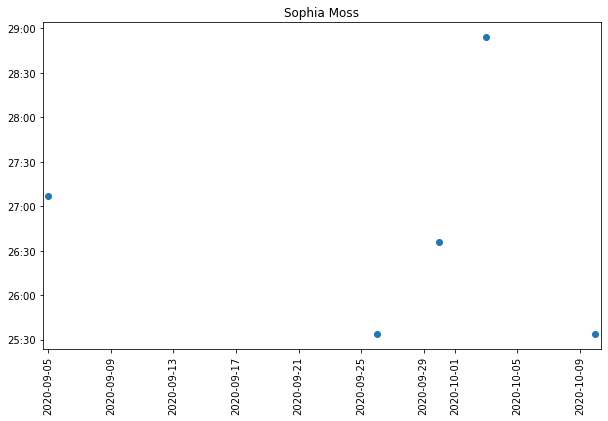

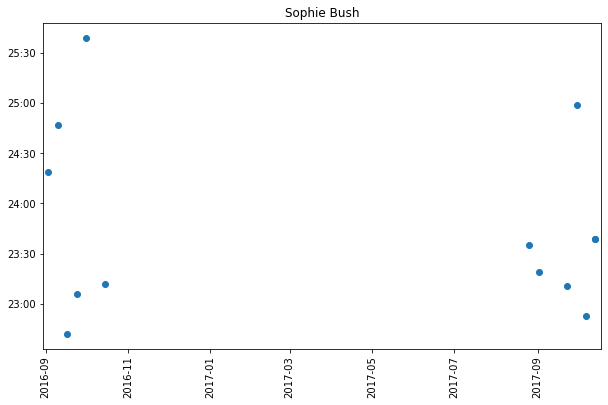

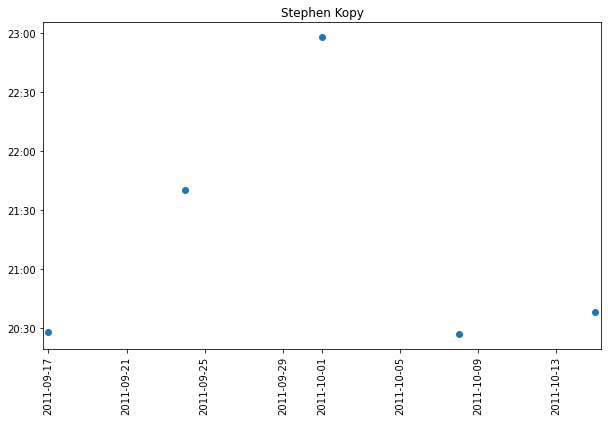

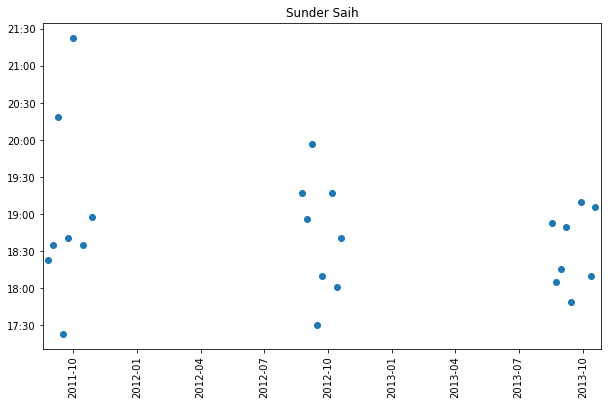

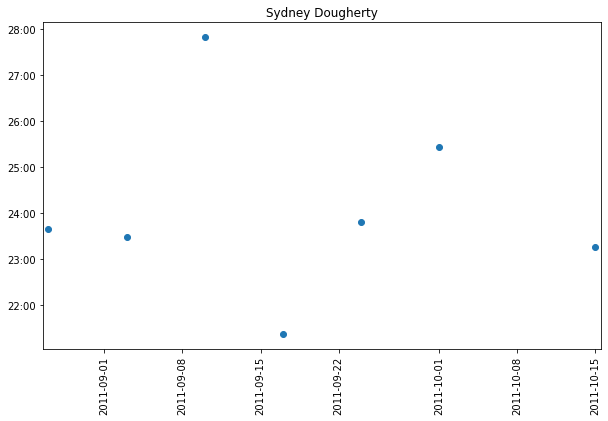

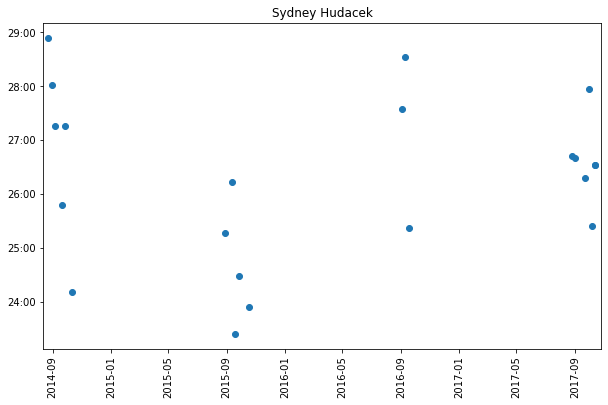

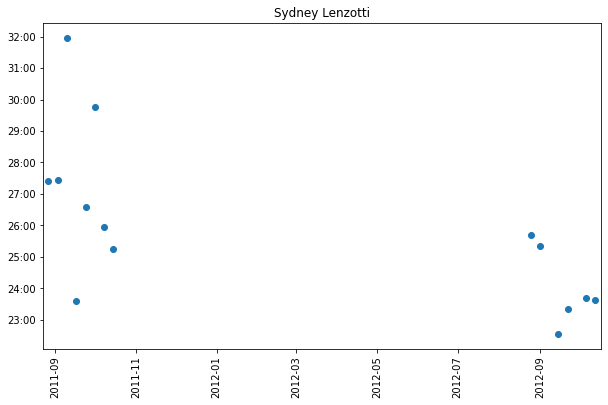

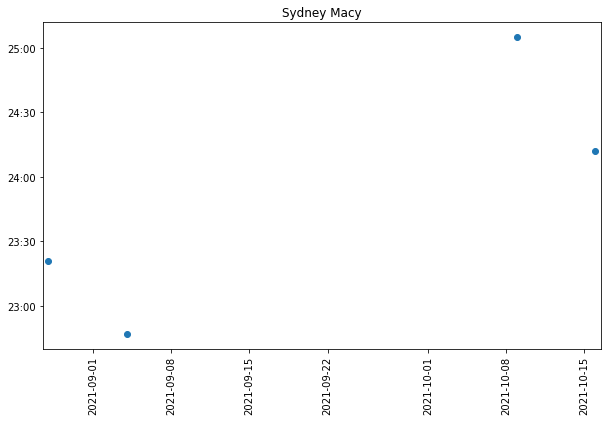

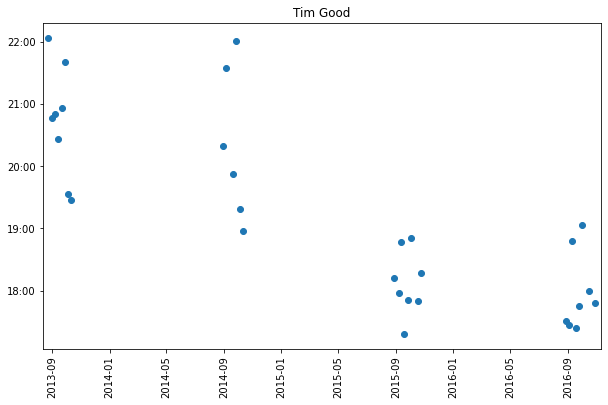

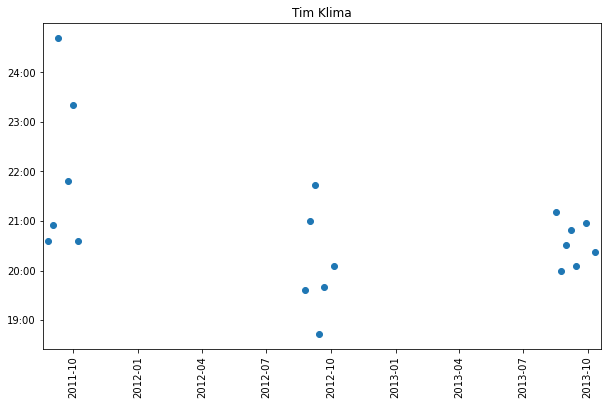

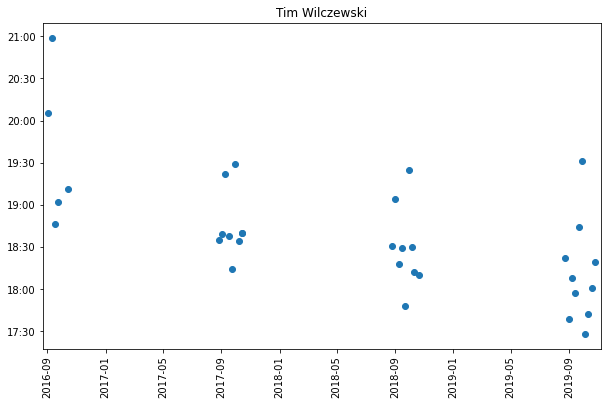

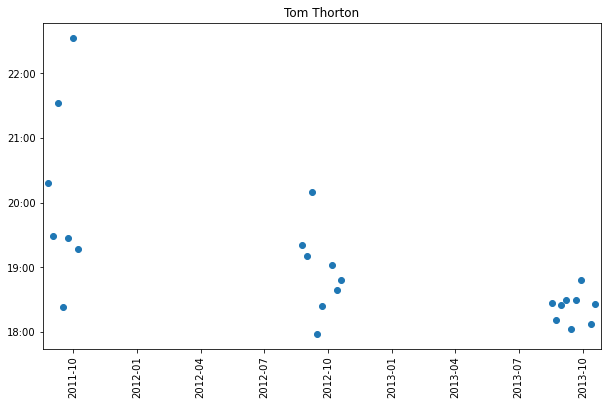

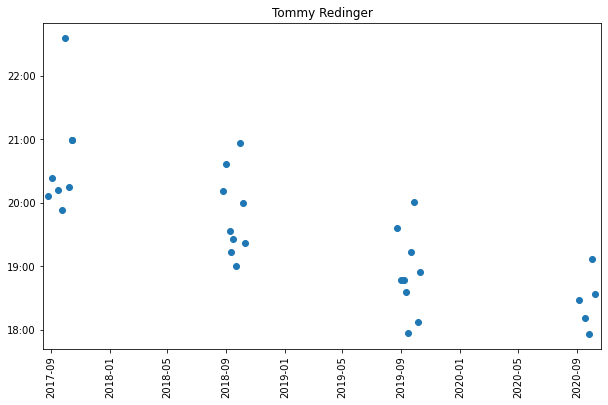

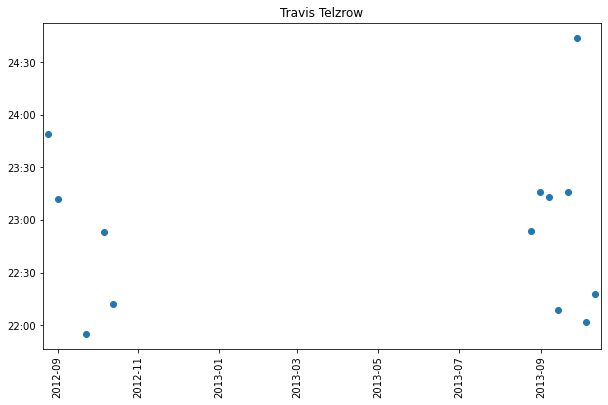

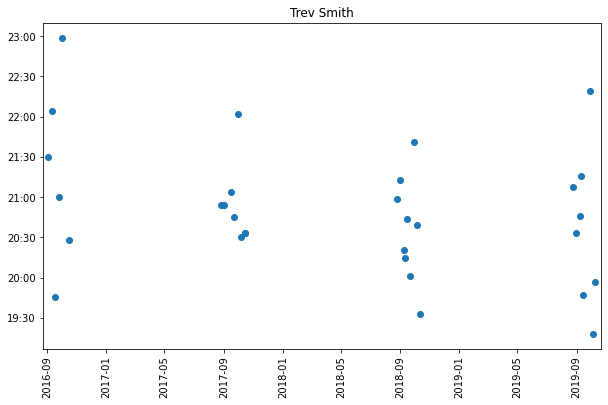

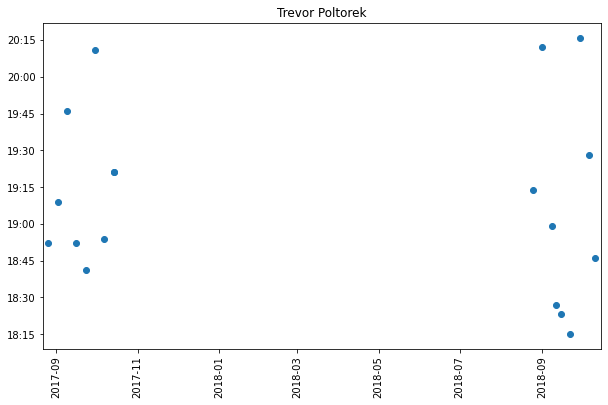

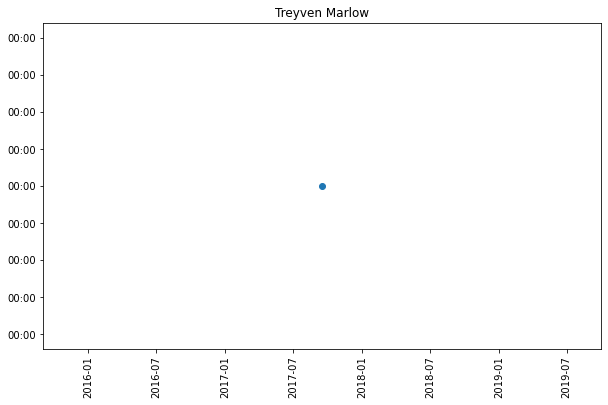

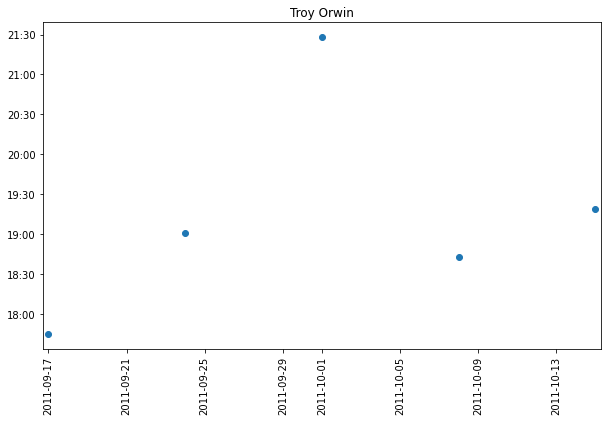

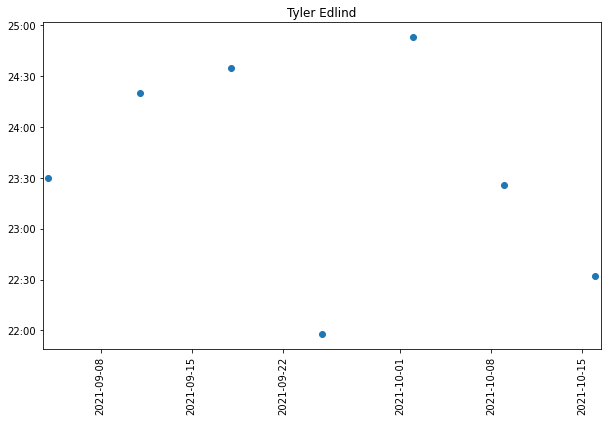

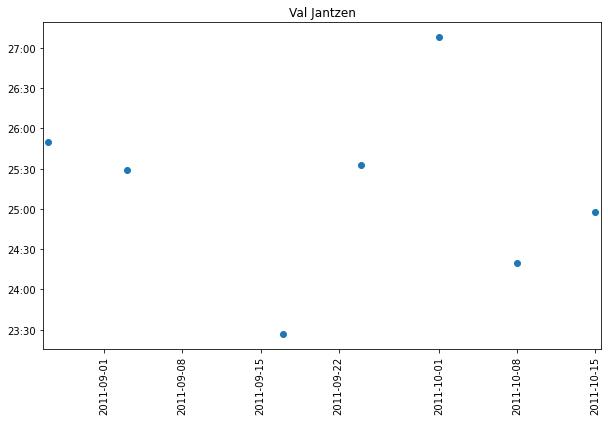

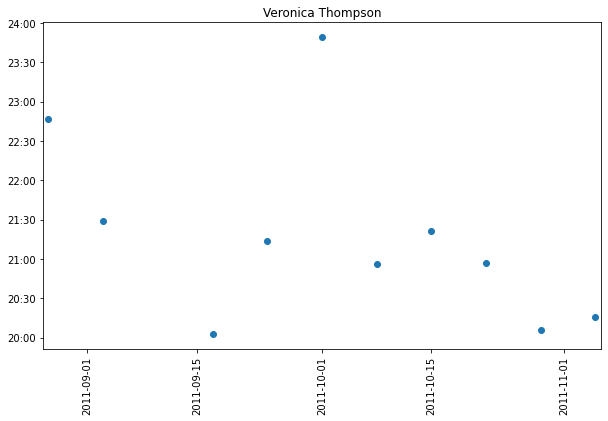

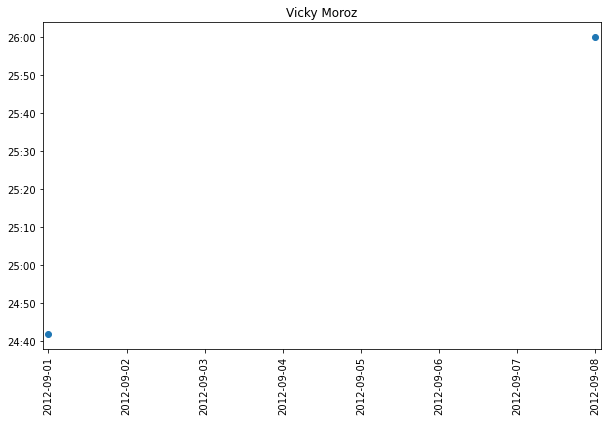

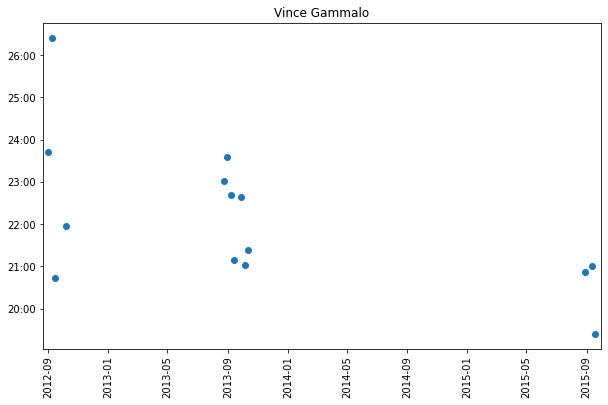

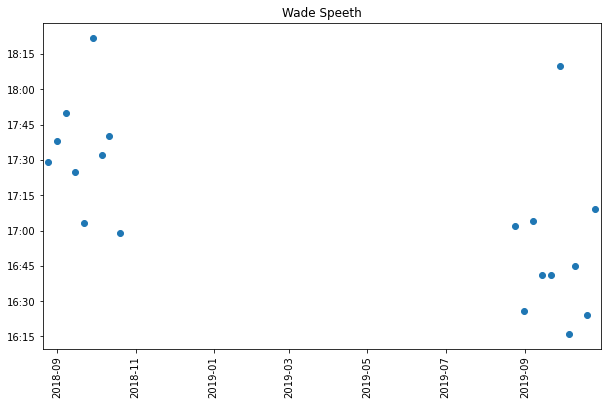

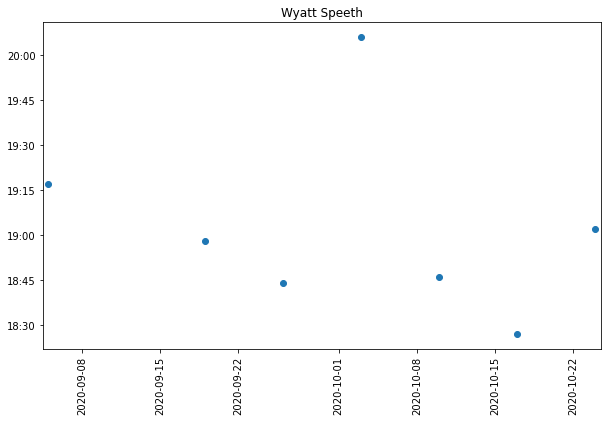

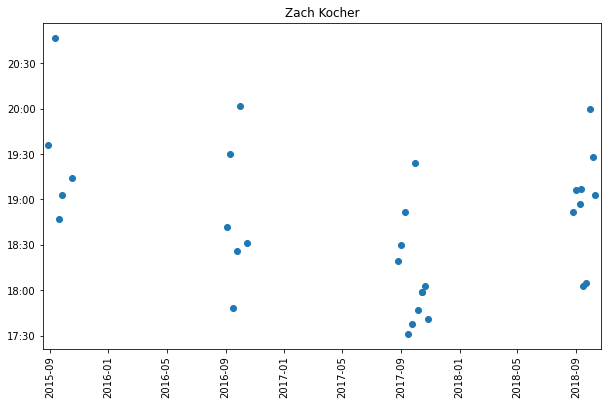

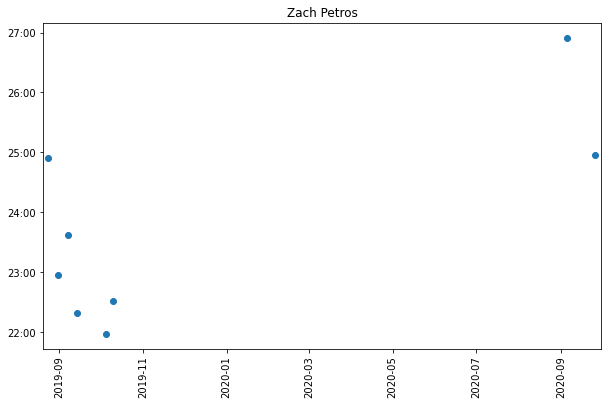

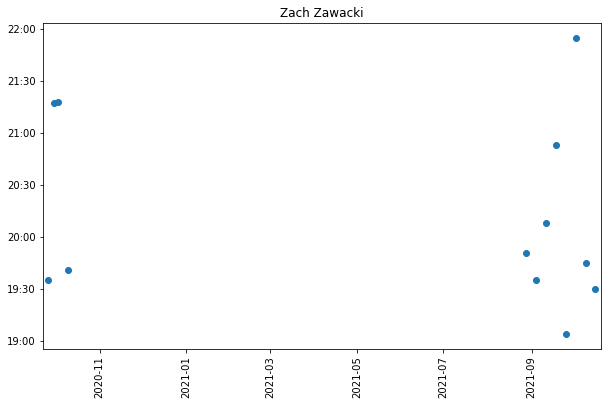

In [102]:
#make the graphs for each athlete
for i in unique_athletes:
    plt.rcParams["figure.figsize"] = (10,6)
    plt.figure()
    aDf = df[df["athlete"] == i]
    plt.title(i)
    plt.margins(x=0.01)
    plt.xticks(rotation='vertical')
    yformatter = mdates.DateFormatter('%M:%S')
    plt.gcf().axes[0].yaxis.set_major_formatter(yformatter)
    plt.scatter(aDf["date"], aDf["time"])
    

In [17]:
boysDf = df[df["gender"] == "boy"]
girlsDf = df[df["gender"] == "girl"]
unique_dates = []
for i in df["date"]:
    if i not in unique_dates:
        unique_dates.append(i)

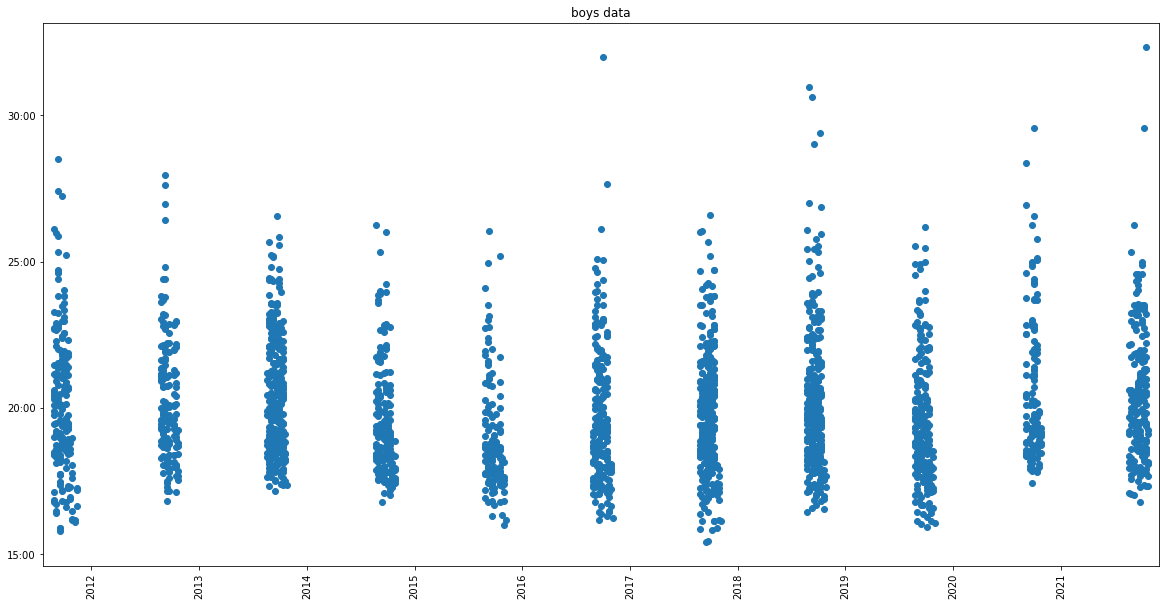

In [122]:
#all boys data graphed
plt.margins(x=0.01)
plt.title("boys data")
plt.xticks(rotation='vertical')

yformatter = mdates.DateFormatter('%M:%S')
plt.gcf().axes[0].yaxis.set_major_formatter(yformatter)
plt.scatter(boysDf["date"], boysDf["time"])
plt.rcParams["figure.figsize"] = (20,10)


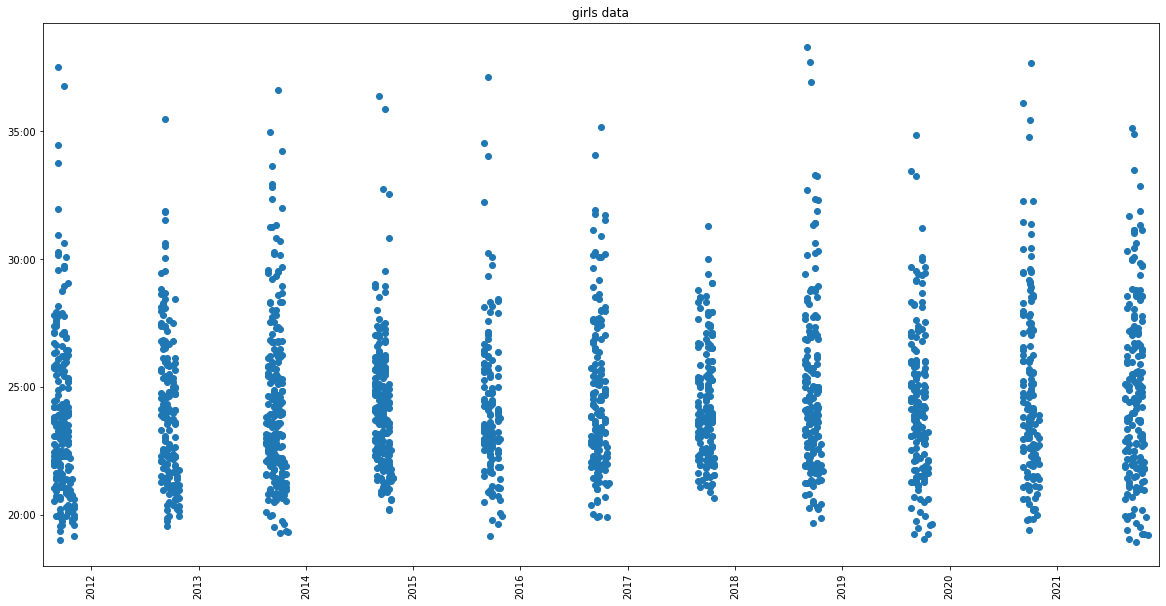

In [116]:
#all girls data graphed
plt.margins(x=0.01)
plt.title("girls data")
plt.xticks(rotation='vertical')
plt.rcParams["figure.figsize"] = (20,10)
yformatter = mdates.DateFormatter('%M:%S')
plt.gcf().axes[0].yaxis.set_major_formatter(yformatter)
plt.scatter(girlsDf["date"], girlsDf["time"])


In [31]:
#make dataframes for the top nine girls and boys for each race
boysNineDf = pd.DataFrame()
girlsNineDf = pd.DataFrame()

for i in unique_dates:
    newDf = boysDf[boysDf["date"] == i]
    newDf = newDf[:9]
    boysNineDf = boysNineDf.append(newDf)

for i in unique_dates:
    newDf = girlsDf[girlsDf["date"] == i]
    newDf = newDf[:9]
    girlsNineDf = girlsNineDf.append(newDf)

    

C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, 

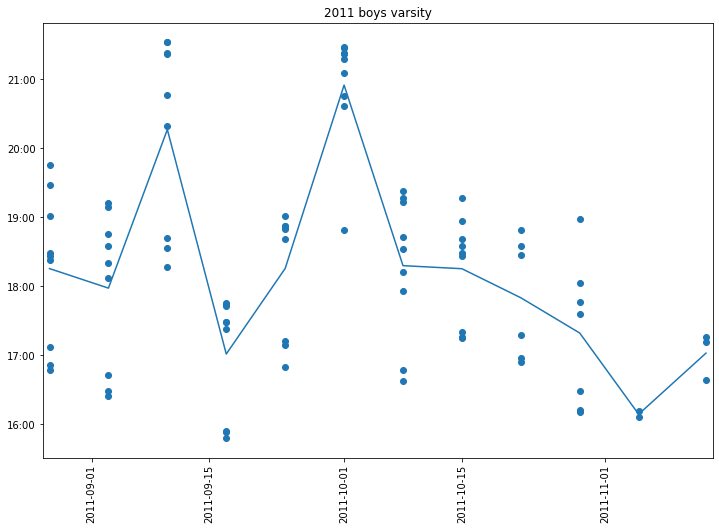

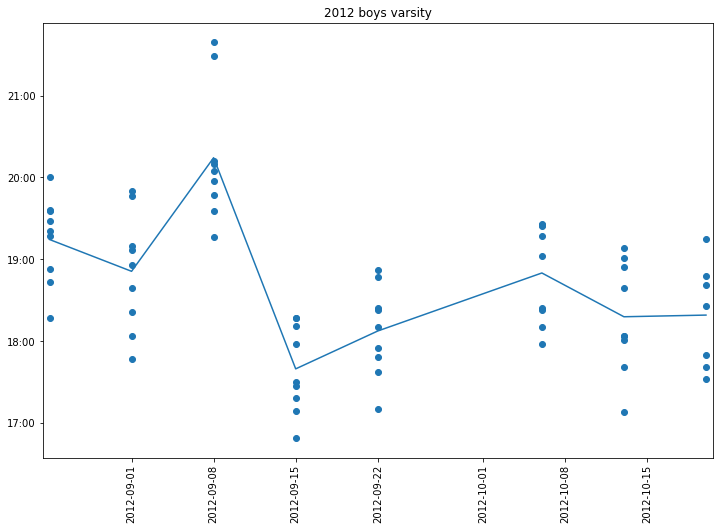

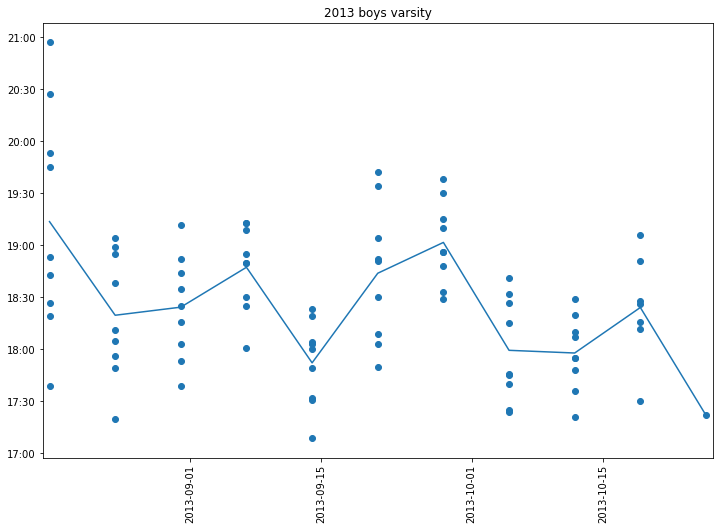

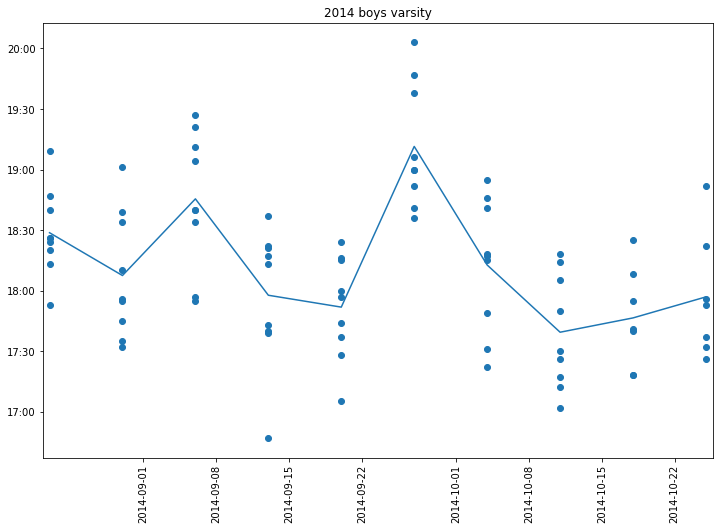

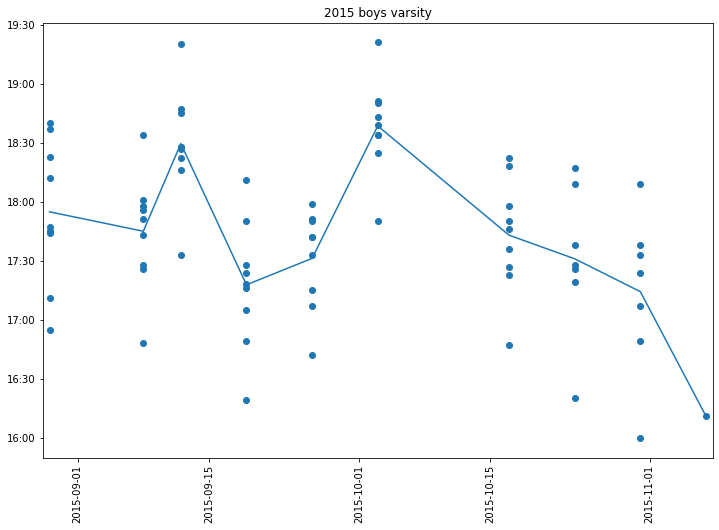

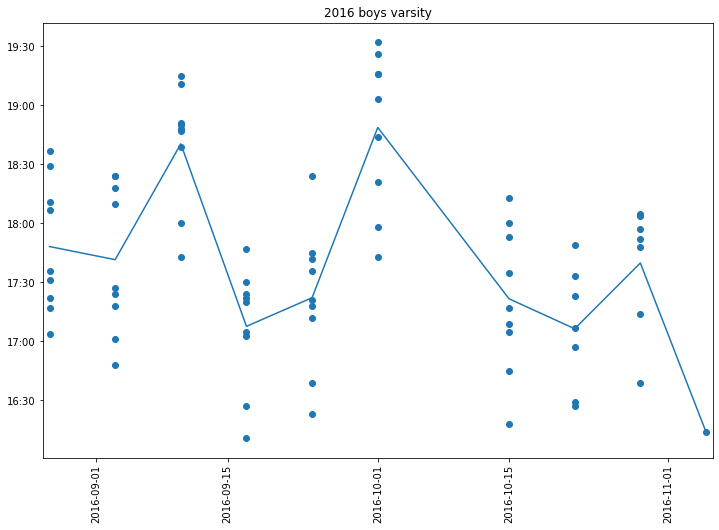

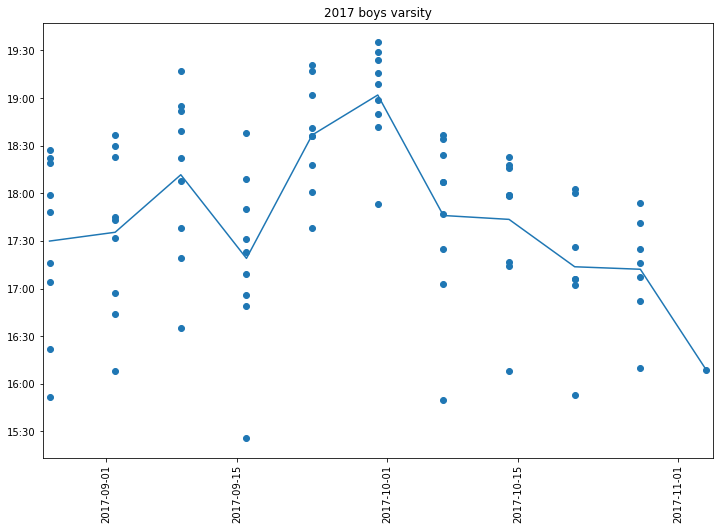

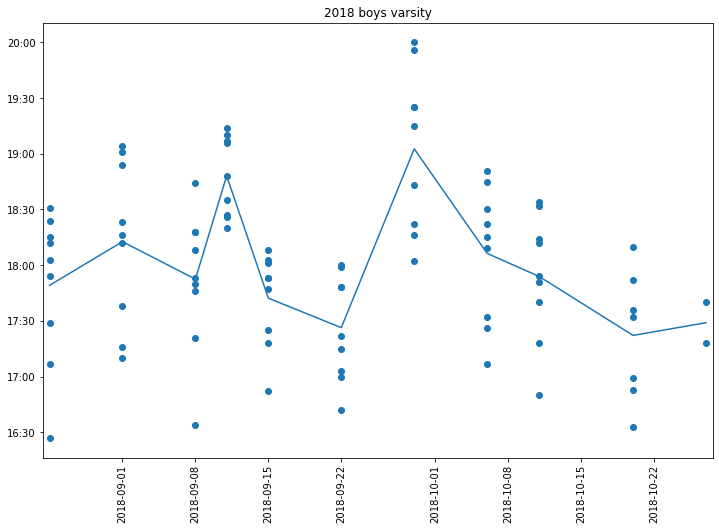

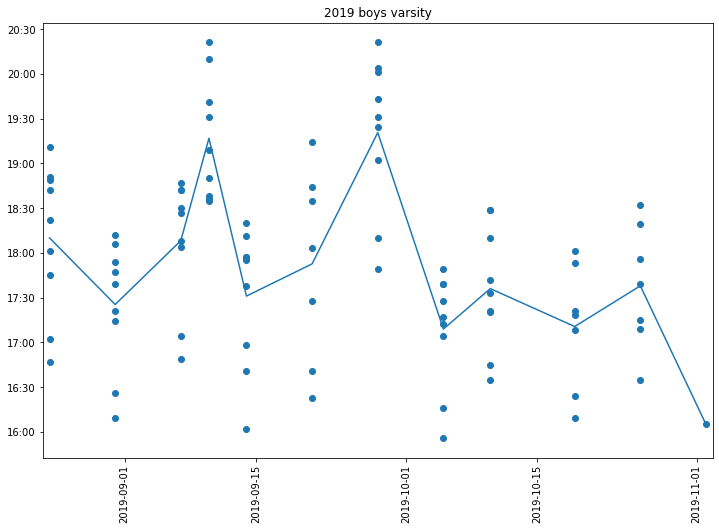

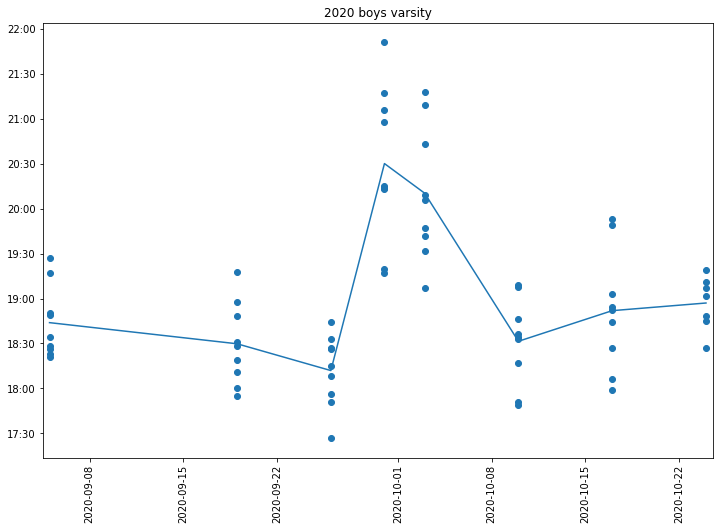

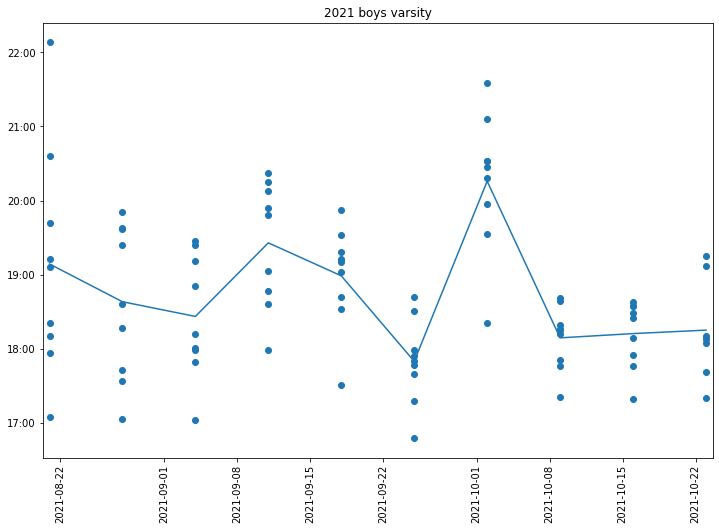

In [118]:
#creates a graph for each year of the top nine boys of each race
boysByYearDf = boysNineDf.groupby(boysNineDf['date'].map(lambda x: x.year))
averageListBoys = []
for i, x in boysByYearDf:
    plt.rcParams["figure.figsize"] = (12,8)
    plt.figure()
    plt.title(str(i) + " boys varsity")
    plt.margins(x=0.01)
    plt.xticks(rotation='vertical')
    xformatter = mdates.DateFormatter('%M:%S')
    plt.gcf().axes[0].yaxis.set_major_formatter(xformatter)
    plt.scatter(x["date"], x["time"])
    average = x.groupby(['date']).mean()
    averageListBoys.append(average)
    plt.plot(average)



C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\natha\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, 

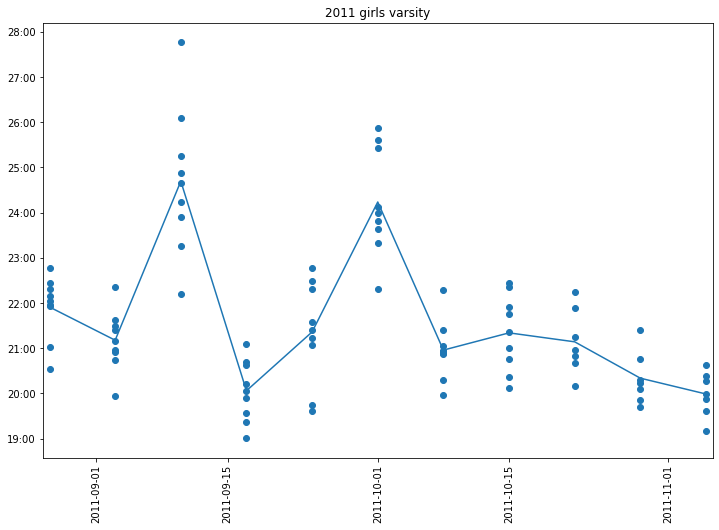

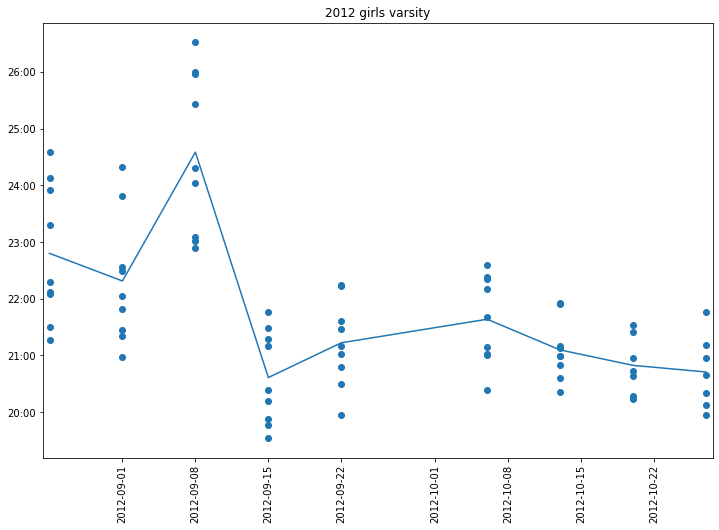

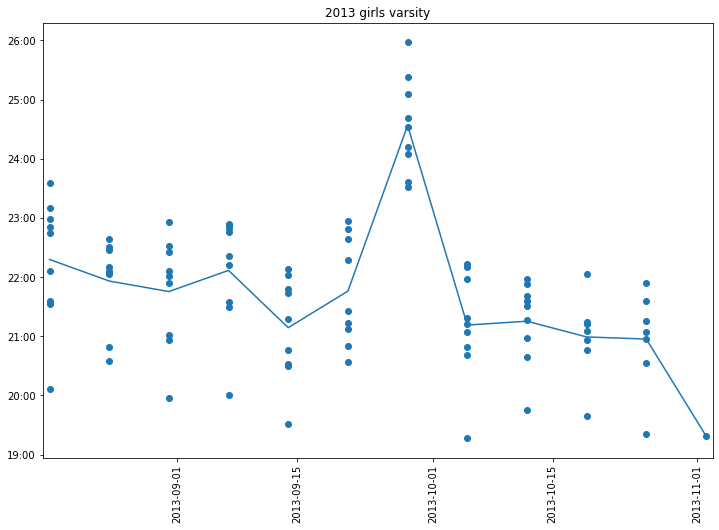

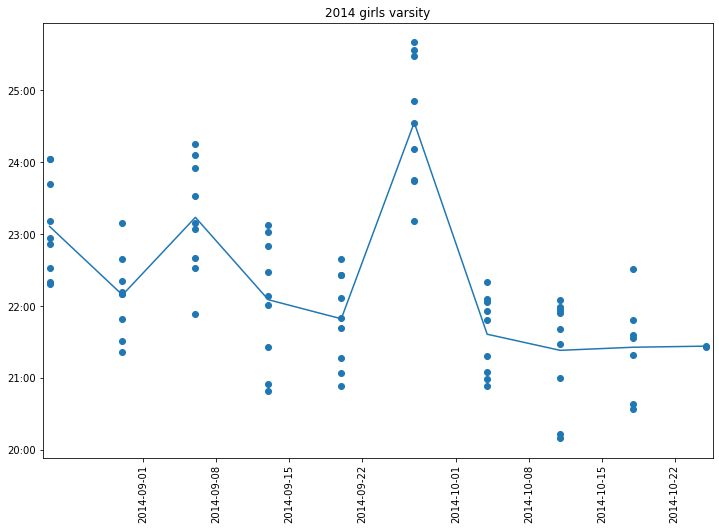

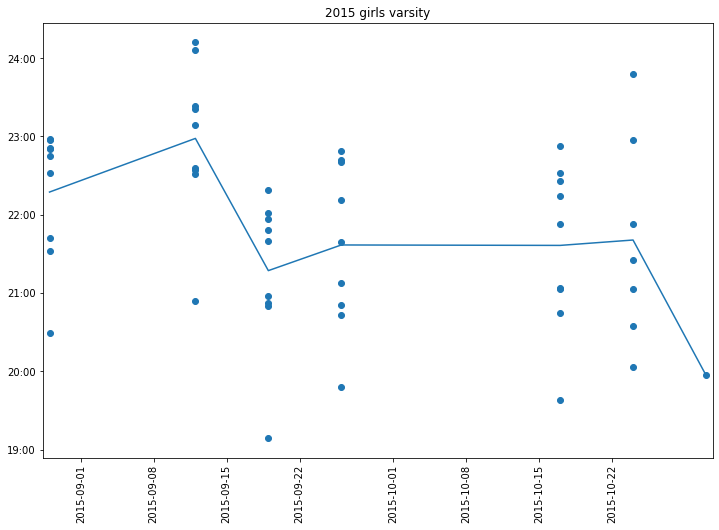

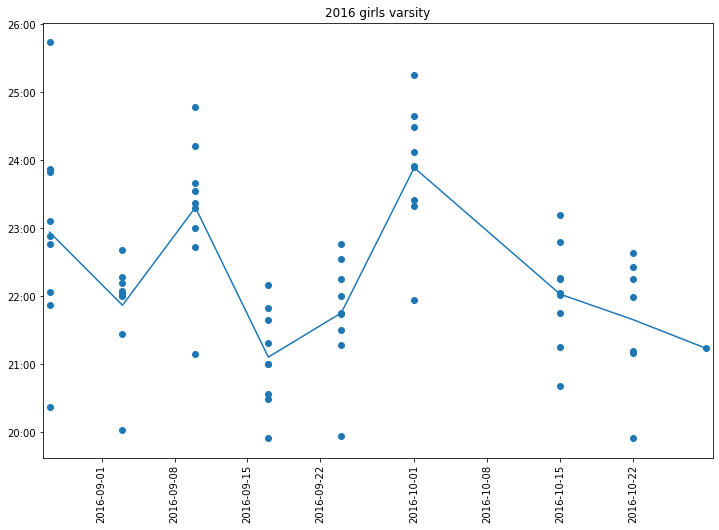

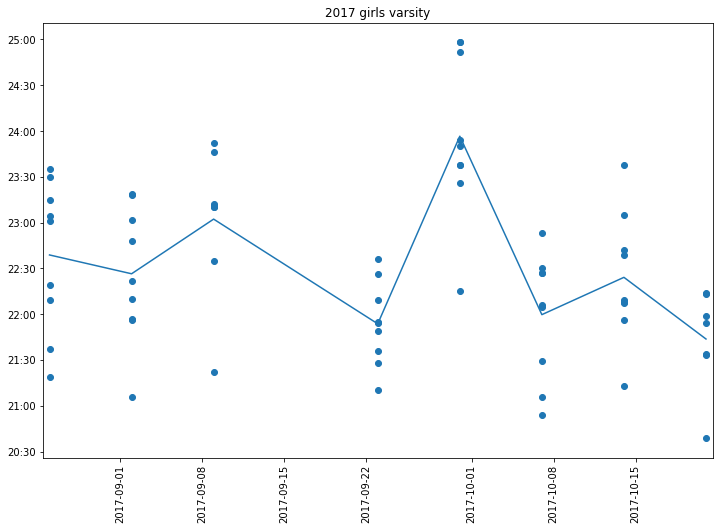

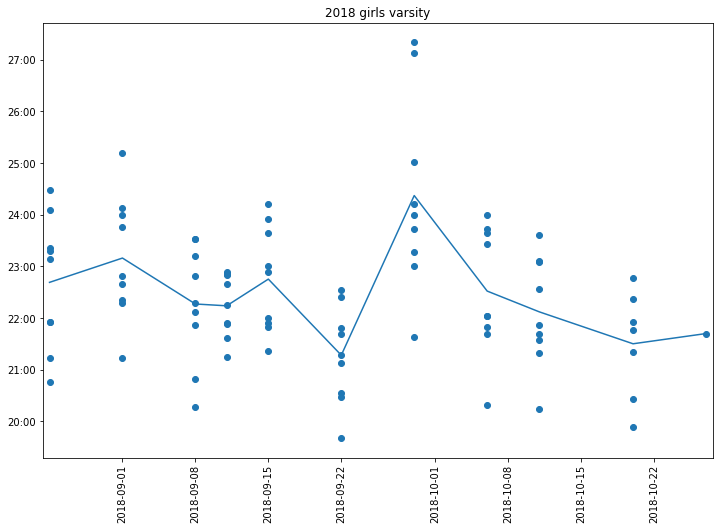

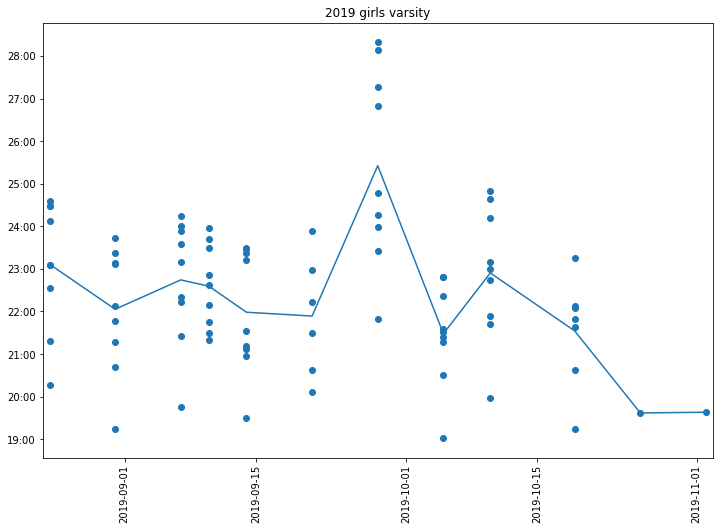

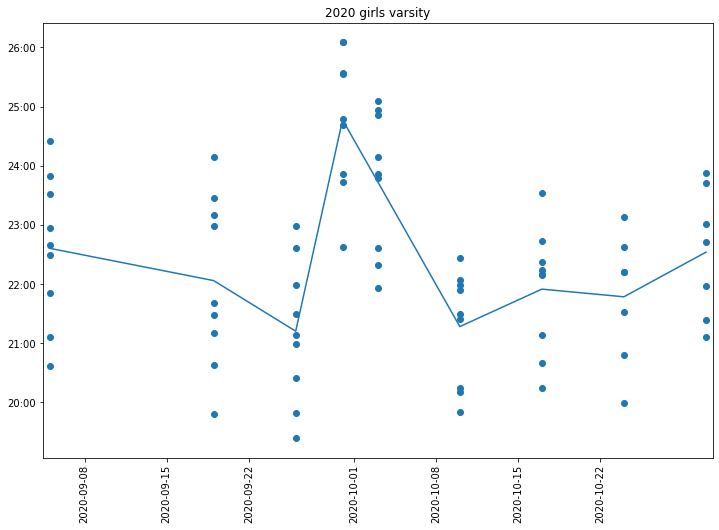

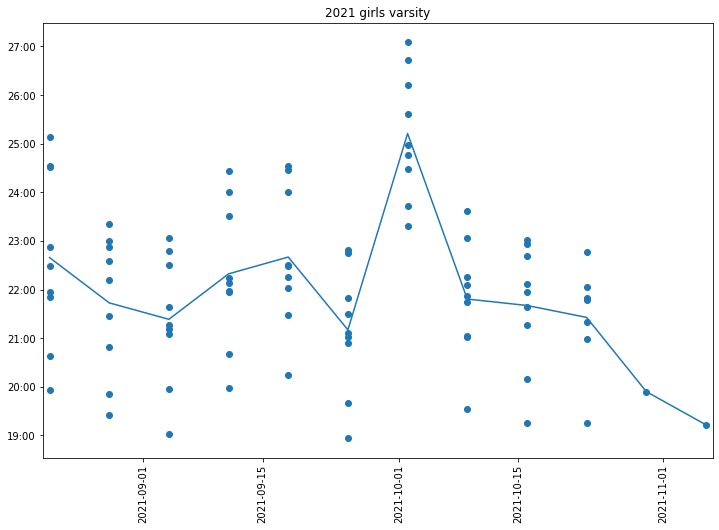

In [124]:
#creates a graph for each year of the top nine boys of each race
girlsByYearDf = girlsNineDf.groupby(girlsNineDf['date'].map(lambda x: x.year))

for i, x in girlsByYearDf:
    plt.rcParams["figure.figsize"] = (12,8)
    plt.figure()
    plt.title(str(i) + " girls varsity")
    plt.margins(x=0.01)
    plt.xticks(rotation='vertical')
    xformatter = mdates.DateFormatter('%M:%S')
    plt.gcf().axes[0].yaxis.set_major_formatter(xformatter)
    plt.scatter(x["date"], x["time"])
    average = x.groupby(['date']).mean()

    plt.plot(average)

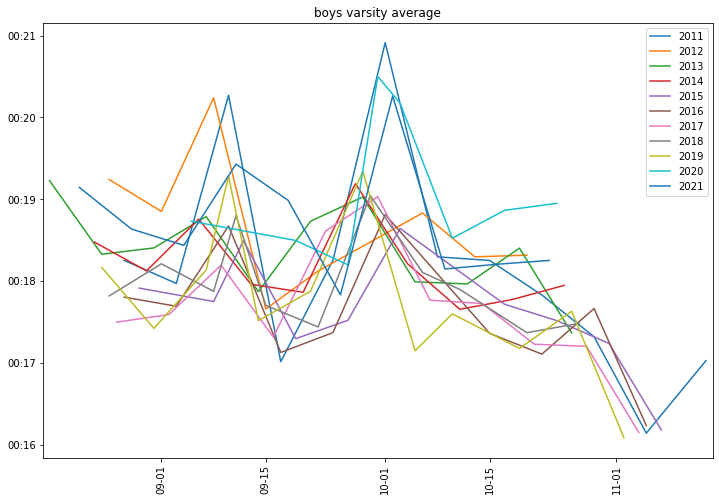

In [87]:
plt.rcParams["figure.figsize"] = (12,8)
plt.title("boys varsity average")
plt.margins(x=0.01)
plt.xticks(rotation='vertical')


yformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].yaxis.set_major_formatter(yformatter)
    
xformatter = mdates.DateFormatter('%m-%d')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
    
for name, group in boysByYearDf:    
    group['date'] = group['date'].dt.strftime('%m-%d')
    
    group['date'] = pd.to_datetime(group['date'],format= '%m-%d' )
    
    average = group.groupby(['date']).mean()
    plt.plot(average, label=name)
    plt.legend(boysByYearDf.groups)

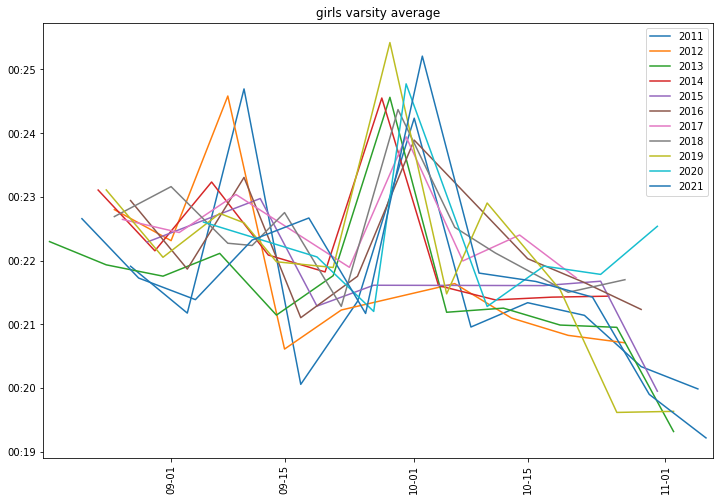

In [88]:
plt.rcParams["figure.figsize"] = (12,8)
plt.title("girls varsity average")
plt.margins(x=0.01)
plt.xticks(rotation='vertical')


yformatter = mdates.DateFormatter('%H:%M')
plt.gcf().axes[0].yaxis.set_major_formatter(yformatter)
    
xformatter = mdates.DateFormatter('%m-%d')
plt.gcf().axes[0].xaxis.set_major_formatter(xformatter)
    
for name, group in girlsByYearDf:    
    group['date'] = group['date'].dt.strftime('%m-%d')
    
    group['date'] = pd.to_datetime(group['date'],format= '%m-%d' )
    
    average = group.groupby(['date']).mean()
    plt.plot(average, label=name)
    plt.legend(girlsByYearDf.groups)